# Travel Product Ideas

In this notebook, we run market research simulations for which we have (or believe to have :-) the correct answers.

In [1]:
import os
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe import control
from tinytroupe import config_manager


from tinytroupe.experimentation import InPlaceExperimentRunner

# specific utilities for the usecase
from market_research_utils import *


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: C:\Users\pdasilva\repos\TinyTroupe\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\OneDrive - Microsoft\TinyTroupe (shared)\Paper artifacts\Working examples (GPT-5)\config.ini
TinyTroupe version: 0.6.0
Current date and time (local): 2025-10-03 10:33:44
Current date and time (UTC):   2025-10-03 13:33:44

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-12-01-preview
model = gpt-5-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_completion_tokens = 128000
timeout = 900
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
reasoning_effort = high
cache_api_calls = False
cache_file_name = 

In [2]:
config_manager.update("timeout", 300)
config_manager.update("api_type", "azure")

2025-10-03 10:34:06,664 - root - INFO - Updated config: timeout = 300
2025-10-03 10:34:06,665 - root - INFO - Updated config: api_type = azure


In [3]:
#control.begin("travel_product_market_research_2b.cache.json")

## Experiment setup

In [4]:
#Experiment: Travel Preferences by Marital Status
#	•	Ground Truth:
#	•	Singles prefer adventure trips, with 62% citing nature or extreme sports as their ideal vacation (Expedia, 2023). Source
#	•	Families prioritize child-friendly destinations, with 73% choosing theme parks or resorts (Expedia, 2023). Source
#	•	Couples favor luxury/romantic getaways, with 81% preferring beachfront or spa destinations (Expedia, 2023). Source
#	•	Prediction Task: Predict travel preferences based on marital status, income, and age.
#	•	Hypothetical Product:
# “WanderLux”: A travel service that helps setup luxury vacations and getaways, focusing on beachfront and spa destinations.


# this is meant to prime the agent to start thinking about what he/she would like to do on vacation
interviewer_introduction =\
    """
    We are performing some market research and need to know you more. 
    Can you please:
      - present yourself?
      - list your top-10 interests?
      - tell us what an ideal vacation would be for you and why?
    """

interviewer_main_question =\
    """ 
    We are developing a new travel service called "WanderLux" that helps setup luxury or romantic vacations, 
    focusing on beachfront and spa destinations.  The idea is to help people seeking quiet and calm getaways to 
    find the best places to stay and relax, avoiding fake reviews and bad experiences. These places are meant for 
    an adult audience, many not accepting children.
    
    The question is: if you had only one vacation to take next year, would use our new service
    or not? You **must** respond with "Yes" or "No" **only**, and explain why. If you are not sure, 
    please pick the answer that you think is most likely. 

    Please be honest, we are not here to judge you, but just to learn from you. We know your preferences and choices depend on many factors, 
    but please make your best guess, and you **must** think deeply about the following before answering:

       - your current situation in life, location, job and interests.
       = what you look for in vacations. Are you sure quiet luxury is what you want, instead of, say, adventure or fun and parties?
       - what would be OTHER vacation alternatives you might prefer instead.
       - and what you can afford.
     
    Now please answer the question.
    """

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [5]:
import random

usa_singles = random.sample(TinyPerson.load_specifications_from_folder("./population/usa_singles_2/"), 50)  # no children
usa_couples = random.sample(TinyPerson.load_specifications_from_folder("./population/usa_couples_2/"), 50)   # no children
usa_families = random.sample(TinyPerson.load_specifications_from_folder("./population/usa_families_2b/"), 50) # have children, emphasize family and childrearing aspects

In [6]:
singles_market = TinyWorld(f"Target audience 1 (US)", usa_singles, broadcast_if_no_target=False)
families_market = TinyWorld(f"Target audience 2 (US)", usa_families, broadcast_if_no_target=False)
couples_market = TinyWorld(f"Target audience 3 (US)", usa_couples, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [7]:
singles_market.broadcast(interviewer_introduction)
families_market.broadcast(interviewer_introduction)
couples_market.broadcast(interviewer_introduction)

singles_market.broadcast(interviewer_main_question)
families_market.broadcast(interviewer_main_question)
couples_market.broadcast(interviewer_main_question)

USER --> Isaac Johnson: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Julian Hayes

       + --> Charlotte Nguyen

       + --> ...others...

USER --> Earl Benjamin Crockett: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Maritza Elena Rios

       + --> Lucas Orion Hayes

       + --> ...others...

USER --> Lucas Park: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Mateo Javier Ramos

       + --> Isaiah Johnson-Smith

       + --> ...others...

USER --> Isaac Johnson: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Julian Hayes

       + --> Charlotte Nguyen

       + --> ...others...

USER --> Earl Benjamin Crockett: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Maritza Elena Rios

       + --> Lucas Orion Hayes

       + --> ...others...

USER --> Lucas Park: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Mateo Javier Ramos

       + --> Isaiah Johnson-Smith

       + --> ...others...

In [8]:
singles_market.run(1)
#control.checkpoint()

2025-10-03 10:34:14,542 - tinytroupe - INFO - [Target audience 1 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 1 (US) step 1 of 1 ────────────────────────────────────────

2025-10-03 10:34:14,546 - tinytroupe - INFO - [Target audience 1 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-03 10:34:14,564 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:14,572 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:14,587 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:14,593 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:14,613 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:14,616 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:14,623 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:14,625 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:14,632 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:14,636 - tinytroupe - INFO - Using Azure OpenAI Servic

Taylor Nguyen-Santos acts: [THINK] 
                          > We need to follow the prompt: give a single Yes/No choice and then
                          > explain why. Think through Taylor's preferences: prefers active travel
                          > (hiking, backcountry), values experiences over luxury, pragmatic about
                          > budgets, likes walkable places and good coffee. Current life: Seattle,
                          > steady job as project manager with limited vacation days; would likely
                          > choose a trip that balances outdoor time and low logistics. Consider
                          > alternatives: a guided multi-day hike, a coastal road trip with short
                          > hikes and good food, or visiting family in Southern California. Assess
                          > fit: WanderLux is beachfront/spa-focused, adult-only, quiet luxury —
                          > that appeals if I'm after an easy, low-stress rest-and-recharge trip,
                          > but it's less aligned with my usual active, experience-driven vacations.
                          > Also cost: I can probably afford a moderate luxury trip but I tend to
                          > spend on longer active trips. Verdict: most likely No, unless the
                          > service explicitly offers active, sustainable, locally rooted options
                          > and fair pricing.

Taylor Nguyen-Santos acts: [TALK] 
                          > No. I wouldn't use WanderLux for my one vacation next year. I usually
                          > prefer active, experience-driven trips — multi-day hikes, a mix of city
                          > and nearby nature, or a coastal road trip where I can explore local food
                          > and coffee — and I tend to plan those myself or with a specialist
                          > outfitter. A beachfront/spa package sounds lovely for a short, low-
                          > effort recharge, but it doesn't match my default vacation style and
                          > priorities (longer time outdoors, authenticity, and stretch-your-legs
                          > adventure). I could be convinced to use the service if it offered
                          > sustainable, walkable coastal stays with local experiences and
                          > transparent pricing, but as described I see it as a poor fit for how I
                          > actually want to spend my vacation time and money.

Taylor Nguyen-Santos acts: [DONE] 
                          > Answered the market-research question and provided rationale.

2025-10-03 10:34:33,946 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:34,899 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Chloe Ramirez acts: [THINK] 
                   > Okay, think this through quick: I'm Chloe Ramirez, 22, living in Atlanta,
                   > unemployed and working on my GED while learning game design. WanderLux is
                   > luxury beachfront/spa, adult-only — sounds peaceful, which I usually like, but
                   > 'luxury' signals high cost. My priorities: finish GED, build a game portfolio,
                   > and save money for things that help my career (conventions, courses, gear).
                   > Alternatives I'd pick: a budget road trip, a gaming convention (like PAX), or a
                   > local quiet retreat that doesn't break the bank. So overall affordability and
                   > fit with my goals matter more than the quiet luxury vibe.

Chloe Ramirez acts: [TALK] 
                   > No. I wouldn't use WanderLux if I had only one vacation next year — it's aimed
                   > at higher-end beachfront/spa stays and that's probably out of my budget right
                   > now, and I prefer spending limited money on things that push my game-design
                   > goals (conferences, online courses, or a low-cost creative retreat). While I do
                   > like quiet and calm over loud party scenes, the luxe/spa angle isn't the best
                   > match for my current finances or priorities. Other options I'd consider
                   > instead: attending a gaming convention or jam, a budget road trip to visit
                   > family (like Aunt Maria), or a cheap cabin getaway where I can relax and jot
                   > down game ideas without spending a ton.

Chloe Ramirez acts: [DONE] 
                   > Finished — answered the WanderLux question.

2025-10-03 10:34:34,941 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:35,137 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:35,188 - openai._base_client - INFO - Retrying request to /chat/completions in 44.000000 seconds
2025-10-03 10:34:35,400 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Henry Adams acts: [THINK] 
                 > Okay—I need to answer whether I'd use WanderLux if I had only one vacation next
                 > year. Remember persona facts: I'm 25, living in Boston, volunteering as a mental
                 > health advocate, saving for a Master's, prone to burnout and in need of
                 > restorative time. I value quiet, calm getaways and nature, but I also watch my
                 > budget. WanderLux offers curated beachfront/spa adult-only retreats and filters
                 > out fake reviews, which reduces planning stress—important for someone who carries
                 > others' emotional load. Alternatives I might prefer: a hiking/nature retreat
                 > (cheaper, restorative in a different way) or a staycation. Affordability is a key
                 > constraint, but if it's my one vacation and it's meant to recharge me deeply, I'd
                 > likely prioritize a restful spa/beach trip, maybe a mid-tier package or a deal.
                 > Conclusion: leaning toward Yes because the service reduces decision fatigue and
                 > aligns with my need to recharge, though I'd pay attention to cost and choose
                 > wisely.

Henry Adams acts: [TALK] 
                 > Yes. As someone who often carries other people's emotional weight through my
                 > advocacy work, I value a vacation that genuinely lets me rest and unplug.
                 > WanderLux's focus on quiet, adult-only beachfront and spa retreats—plus its
                 > promise to avoid fake reviews—appeals to me because it removes a lot of the
                 > decision fatigue and anxiety around planning a recharge. That said, I'm saving
                 > for grad school, so I'd probably look for a mid-range option or a package deal
                 > rather than the most extravagant option. Alternatives I'd consider are a
                 > nature/hiking retreat or a local staycation, which are cheaper but offer
                 > different kinds of restoration. Overall, if this were my single vacation next
                 > year and my goal was true rest, I'd use WanderLux to help make it a reliable,
                 > low-stress restorative trip.

Henry Adams acts: [DONE] 
                 > Waiting for any follow-up questions.

2025-10-03 10:34:35,446 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:35,747 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isaac Johnson acts: [THINK] 
                   > I need to follow the prompt: give a single-word Yes/No answer and then explain
                   > why. Consider my persona: 30, non-binary, living in Los Angeles, currently
                   > unemployed after leaving a part-time retail job due to stress. I value quiet,
                   > creative spaces and nature, but money is tight and I'm actively job-searching.
                   > WanderLux sounds like a luxury beachfront/spa service aimed at calm, adult-only
                   > getaways — appealing for decompressing after burnout, but likely expensive.
                   > Other alternatives I might prefer given my situation: a local coastal Airbnb or
                   > cabin, a staycation in a cozy cafe-friendly neighborhood, a budget spa day, or
                   > a nature/park trip that’s cheaper. Balance: desire for quiet luxury vs
                   > affordability and current goals (find work, save money). Most likely answer:
                   > No, because of cost and current priorities, though I appreciate the idea and
                   > might consider it if there were affordable options or a special occasion.

Isaac Johnson acts: [TALK] 
                   > No. I probably wouldn’t use WanderLux next year — the concept of a quiet,
                   > beachfront/spa luxury getaway is really appealing since I need to decompress
                   > after burnout, but I’m unemployed and watching my budget while looking for
                   > steady work. I’d be more likely to choose cheaper alternatives (a local coastal
                   > Airbnb, a staycation focused on creative downtime, a day spa, or a nature trip)
                   > that let me recharge without breaking the bank. If WanderLux offered lower-cost
                   > packages, discounts, or something geared toward creatives on a budget — or if
                   > it were a special occasion and I had the money — I’d consider it.

Isaac Johnson acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-03 10:34:35,781 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:35,876 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:35,878 - openai._base_client - INFO - Retrying request to /chat/completions in 43.000000 seconds
2025-10-03 10:34:35,937 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Raymond Lee Carter acts: [THINK] 
                        > All right, lemme think this through. I'm 62, retired, livin' in a small
                        > Tennessee town on modest Social Security and odd jobs. I like quiet —
                        > fishin', church, a slow week at the county lake or fixin' up the house —
                        > but I ain't one for fancy resorts or spendin' money on luxuries. WanderLux
                        > sounds aimed at beachfront spas and pricier, adult-only getaways. That'd
                        > be nice in theory, but between knee arthritis, limited budget, and
                        > preferrin' simple, hands-on rests, it's not a good fit. Other vacations
                        > I'd pick: a nearby cabin for fishin' and reading the paper, visitin' my
                        > sister for a few days, or a short trip to the county fair and diner
                        > meetups. Cost matters — I'd rather use money on truck upkeep, house
                        > repairs, or add to a small emergency fund. So my likely answer: no. I'll
                        > explain that plainly when I reply.

Raymond Lee Carter acts: [TALK] 
                        > No — I wouldn't use WanderLux. I appreciate the idea, but a beachfront spa
                        > and luxury getaway ain't what I'd choose. I'm on a modest fixed income and
                        > prefer quiet, low-cost trips close to home: a week at the county lake
                        > cabin fishin', visitin' my sister, or a short stay at a simple motel so I
                        > can see the high school ballgame and eat at Mae's Diner. I'd rather spend
                        > money on practical things — truck and house upkeep or sockin' some cash
                        > away for emergencies — than a fancy resort. If I had more money and
                        > younger knees, I might consider it, but right now it's not for me.

Raymond Lee Carter acts: [DONE] 
                        > Finished answering the survey question; waiting if you need more detail.

2025-10-03 10:34:35,977 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:36,446 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:36,450 - openai._base_client - INFO - Retrying request to /chat/completions in 43.000000 seconds
2025-10-03 10:34:36,880 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Miriam Langford acts: [THINK] 
                     > Okay — I need to be deliberate here. Consider my life: Seattle-based nurse
                     > manager, work is busy (40–45 hrs/wk) with occasional on-call; vacations are
                     > restorative and planned carefully. Travel preferences: slower travel (5–10
                     > days), a mix of nature and gentle city time, small boutique places, good
                     > walkability, and one spontaneous afternoon. I value quiet, adult-focused
                     > spaces for real rest; I also dislike crowded tourist traps and fake reviews.
                     > Budget reality: I prioritize paying the mortgage and steady savings, but I
                     > will splurge selectively on one meaningful trip a year if it truly delivers
                     > rest and quality. Alternatives I might choose instead: a PNW hiking-focused
                     > weekend or a city + nature trip (museum day + hike), or a well-planned
                     > staycation. Would WanderLux add value? If it reliably vets quiet
                     > beachfront/spa properties, eliminates time-draining research, and ensures
                     > honest reviews and direct-booking transparency, that matches my needs —
                     > especially the time-saving and quality assurance aspects. Given th (...)

Miriam Langford acts: [TALK] 
                     > Yes  I would use WanderLux. I like slower, restorative trips that mix nature
                     > and quiet comfort, and an adult-only beachfront/spa option sounds exactly the
                     > kind of restful break I prioritize. As a nurse manager my schedule is tight
                     > and I don't have energy for week(s) of vetting listings and hunting down
                     > trustworthy reviews — a service that curates honest, low-drama properties and
                     > handles logistics would save real time. That said, I'd expect transparent
                     > pricing, vetted health/safety standards, and the option to include one nature
                     > day or local activity (a short hike or town visit). Alternatives I'd consider
                     > are a domestic hiking trip or a boutique city + nature itinerary (which I
                     > sometimes prefer for variety), so WanderLux would need reasonable options and
                     > value for me to pick it over those. Overall, for a single vacation next year
                     > where rest is the main goal, WanderLux is the kind of service I'd be likely
                     > to use.

Miriam Langford acts: [DONE] 
                     > Finished — waiting for any follow-ups.

2025-10-03 10:34:36,915 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:37,105 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:37,108 - openai._base_client - INFO - Retrying request to /chat/completions in 42.000000 seconds
2025-10-03 10:34:37,193 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:37,195 - openai._base_client - INFO - Retrying request to /chat/completions in 42.000000 seconds
2025-10-03 10:34:37,340 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Charlotte Nguyen acts: [THINK] 
                      > They want a Yes/No plus explanation. I need to weigh my current life: I'm
                      > 30, non-binary, living in LA, currently unemployed after leaving retail
                      > because of burnout, trying to break into graphic design/digital art. My
                      > priorities: find meaningful creative work, build a supportive community, and
                      > save money where I can. I enjoy quiet, cozy spots and creative events, but I
                      > also like social gaming and art-focused trips. A luxury beachfront/spa
                      > vacation sounds lovely and calming, but it's expensive and geared toward
                      > romantic/adult-only experiences rather than the community/art connections I
                      > value. Other vacation alternatives I'd prefer: an affordable creative
                      > retreat, visiting art shows and local galleries, a gaming convention, or a
                      > staycation to work on a portfolio (plus Pixel the cat). Given my limited
                      > budget and current goals, the practical choice is not to use a luxury travel
                      > service next year unless there were major discounts or a community/creative
                      > angle. So my likely answer is No.

Charlotte Nguyen acts: [TALK] 
                      > No. I'm currently unemployed and trying to save while I focus on building a
                      > creative career and community, so a luxury beachfront/spa trip isn't
                      > something I can justify right now. I usually prefer vacations that connect
                      > me to art or gaming communities (local art shows, affordable creative
                      > retreats, or a convention), or low-cost trips that let me work on personal
                      > projects and meet people. If WanderLux offered a much more affordable option
                      > or something tailored to creatives, I'd consider it in the future, but as
                      > things stand my priorities and budget lead me to say no.

Charlotte Nguyen acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-03 10:34:37,379 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:37,988 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:37,989 - openai._base_client - INFO - Retrying request to /chat/completions in 41.000000 seconds
2025-10-03 10:34:38,301 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:38,305 - openai._base_client - INFO - Retrying request to /chat/completions in 41.000000 seconds
2025-10-03 10:34:38,438 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Samantha Reed acts: [THINK] 
                   > They asked whether I'd use WanderLux for my one vacation next year. Okay—I'm
                   > Samantha, 30, unemployed and living in LA, trying to save while I look for
                   > creative work. Quiet, beachy spa trips sound exactly like the kind of recharge
                   > I crave: low-key, restorative, no crowds. But luxury = pricey, and right now my
                   > budget is tight; I'd feel guilty spending that much on a single trip. Other
                   > realistic options for me are a cheap cabin or B&B near hiking spots, a low-cost
                   > wellness retreat, or a staycation with a few spa days. If WanderLux had
                   > affordable tiers, a payment plan, or a strong value promo, I'd consider it, but
                   > given my current situation the most likely honest answer is no.

Samantha Reed acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year. A quiet beachfront
                   > spa is exactly what I'd want in terms of rest and calm, but I'm unemployed and
                   > need to prioritize saving and job-hunting right now. I'd more likely choose a
                   > cheaper nature getaway (a cabin, state park trip) or a budget-friendly local
                   > retreat that gives some of the same peaceful vibes without the high price. If
                   > WanderLux offered a more affordable option or a substantial discount, I'd
                   > reconsider, but as things stand it's not realistic for me.

Samantha Reed acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-03 10:34:38,472 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:38,489 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Shanice Marie Washington acts: [THINK] 
                              > Okay — they want a Yes or No plus an explanation. I need to weigh my
                              > life: I work as a CNA on rotating 12-hour shifts, I have modest
                              > savings (a small emergency fund), and I'm saving toward a house and
                              > maybe school. I like quiet and calm on vacation, but I also think
                              > about cost, time off, and coordinating with my mother or family.
                              > Luxury beachfront/spa sounds lovely, but as pitched it feels pricey
                              > and adult-only — not the best fit for my budget or priorities. Other
                              > options I'd pick instead: a short road trip visiting family, a
                              > modest beachfront rental split with relatives, a local B&B or a spa
                              > day, or even a staycation that lets me rest and save money. If
                              > WanderLux offered budget-friendly packages or payment plans, or
                              > discounted off-season options, I might consider it. But most likely
                              > my honest answer is No.

Shanice Marie Washington acts: [TALK] 
                              > No — I wouldn’t use WanderLux for my one vacation next year. Child,
                              > it sounds heavenly, but I’m careful with money: I’m squeezing in
                              > overtime and saving every spare dollar toward a house and maybe
                              > school, and I’ve only got a modest emergency fund. A fancy
                              > beachfront spa getaway feels out of reach right now. I’d rather pick
                              > something I can afford and that fits my schedule — a short road trip
                              > to see family, a modest beach rental split with relatives, a local
                              > B&B or a spa day, or even a staycation to rest up between shifts. If
                              > you had realistic, lower-cost packages or payment plans, or helped
                              > arrange family-friendly quiet retreats in off-season, I’d be more
                              > likely to say yes. As it stands, No.

Shanice Marie Washington acts: [DONE] 
                              > Finished response — waiting for follow-up if needed.

2025-10-03 10:34:38,528 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:39,085 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Erin Palmer acts: [THINK] 
                 > I should weigh my work and travel preferences, alternatives, and cost before
                 > answering. Work: nurse manager at a busy outpatient oncology clinic—I burn mental
                 > energy on emotionally heavy days and need restorative breaks. Travel style: I
                 > prefer slow travel and meaningful experiences (city cultural + nature); I do
                 > enjoy quiet, restorative coastal trips and occasionally a spa day. Financially
                 > I'm conservative (mortgage, saving goals) so I won't automatically pay for the
                 > most expensive option unless it clearly delivers value. What WanderLux offers
                 > that matters to me: vetted, adult-only, quiet luxury and fewer fake reviews —
                 > that reduces stress in planning and increases the chance the trip actually
                 > restores me. Alternatives I'd consider: a self-planned coastal cabin/national-
                 > park retreat, a city cultural trip with museum time, or a modest boutique B&B
                 > found via trusted local recommendations. Overall judgment: because this would be
                 > my one vacation next year and I value a high-probability restorative outcome, I'm
                 > in (...)

Erin Palmer acts: [TALK] 
                 > Yes. I would use WanderLux for my one vacation next year. As a busy nurse manager
                 > I value a truly restorative break, and the service's promise of vetted, quiet
                 > beachfront/spa options (adult-only, fewer fake reviews) directly addresses the
                 > stress of planning and the risk of a disappointing stay. My alternatives would be
                 > a self-planned coastal cabin, a national-park retreat, or a cultural city trip,
                 > but those require more time and research to guarantee the kind of calm I need.
                 > I'd use your service if prices are transparent and it feels like a vetted,
                 > worthwhile splurge rather than an expensive unknown.

Erin Palmer acts: [DONE] 
                 > Completed response to WanderLux market-research question.

2025-10-03 10:34:39,122 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:39,557 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:39,563 - openai._base_client - INFO - Retrying request to /chat/completions in 40.000000 seconds
2025-10-03 10:34:39,748 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:39,751 - openai._base_client - INFO - Retrying request to /chat/completions in 39.000000 seconds
2025-10-03 10:34:39,841 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Jamie Lee Carter acts: [THINK] 
                      > Alright, lemme think this through step by step. I'm a 42-year-old foreman
                      > doin' hands-on work most days — when I take time off I want somethin'
                      > restorative but not fancy for fancy's sake. My top vacation choices are
                      > fishin' at my favorite spot or a two-week road trip with buddies visitin'
                      > ballparks and historical towns — both are familiar, low-stress, and
                      > affordable. Money's tight: mortgage, savin' for retirement, and I'm careful
                      > with extra spendin', so I wouldn't blow a lot on a luxury beachfront spa
                      > unless it was a rare treat or someone else covered it. WanderLux sounds
                      > useful for folks who want quiet luxury and to dodge bad reviews, but given
                      > my priorities and tastes I'm more likely to plan something simple myself or
                      > go where I know folks and places. Conclusion: most likely answer is No,
                      > though I'd consider it if they had a straightforward, reasonably priced
                      > package or it was a special occasion.

Jamie Lee Carter acts: [TALK] 
                      > No. I wouldn't use WanderLux for my one vacation next year. I like quiet,
                      > but what I really want is a simple, familiar trip — fishin' or a road trip
                      > with friends — and I'm watchin' the budget (mortgage and savin's matter).
                      > WanderLux seems handy for folks who want a luxury, no-fuss beachfront spa,
                      > but that ain't my usual preference and I can't justify a pricey service
                      > unless it's a special occasion or someone else pays. If they offered a
                      > plain, no-nonsense package at a fair price, I might consider it, but as
                      > described it's probably not for me.

Jamie Lee Carter acts: [DONE] 
                      > Finished answer; waiting for next question.

2025-10-03 10:34:39,876 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:40,123 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:40,126 - openai._base_client - INFO - Retrying request to /chat/completions in 39.000000 seconds
2025-10-03 10:34:40,127 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Julian Hayes acts: [THINK] 
                  > I should weigh my circumstances: I work as a customer service rep in a rural
                  > part of the Northeast, I like quiet nature trips and hiking, but I don't have
                  > unlimited travel funds. A beachfront spa and adult-only quiet luxury sounds very
                  > appealing because I value calm and real reviews — that matches my preference for
                  > low-key, restorative vacations. Alternatives I’d likely choose instead are a
                  > cabin getaway, a nearby hiking weekend, or a cozy B&B with friends or Emily;
                  > those give rest without the luxury price tag. The deciding factor for me is
                  > cost: WanderLux’s promise to avoid fake reviews is attractive, but unless it’s
                  > affordable or a special occasion, I’d probably skip a luxury package next year.

Julian Hayes acts: [TALK] 
                  > No — as much as a quiet beachfront spa sounds lovely, with my current job,
                  > living situation, and budget I’d most likely pick a more affordable nature
                  > getaway (a cabin or hiking weekend) for my one vacation next year. I really like
                  > that WanderLux focuses on genuine quiet spots and avoiding fake reviews — that’s
                  > a big plus — and I’d consider using it in the future for a special occasion or
                  > if there were lower-cost options or discounts. For next year, though, money and
                  > my preference for simple, restorative outdoor time make a modest trip the more
                  > likely choice.

Julian Hayes acts: [DONE] 
                  > Finished response.

2025-10-03 10:34:40,171 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:34:40,954 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:40,958 - openai._base_client - INFO - Retrying request to /chat/completions in 38.000000 seconds
2025-10-03 10:34:41,297 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:34:41,301 - openai._base_client - INFO - Retrying request to /chat/completions in 38.000000 seconds
2025-10-03 10:35:20,105 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:35:20,111 - 

Sofia Martinez acts: [THINK] 
                    > I need to decide whether I'd use a luxury, adult-only beachfront/spa travel
                    > service (WanderLux) for my one vacation next year. Consider: my job as an
                    > environmental consultant, my preference for sustainable and community-focused
                    > travel, past trips to Costa Rica and Iceland that shaped my values, and budget
                    > as a young professional. Also weigh alternatives: eco-lodges, volunteer
                    > conservation trips, cultural city trips, or adventurous nature-focused trips.
                    > I'm generally skeptical of pure luxury travel that doesn't prioritize local
                    > communities or environmental impact, but I value quiet and restorative trips
                    > too. If WanderLux offered strong sustainability credentials and community
                    > benefit, I'd be more open. Most likely answer: No, unless the service is
                    > explicitly eco-conscious and supports local communities.

Sofia Martinez acts: [TALK] 
                    > No. I love traveling and I do want a restorative getaway sometimes, but as an
                    > environmental consultant who cares about sustainability and community impact
                    > (I chose trips to Costa Rica and Iceland to learn about local practices), I’d
                    > probably prefer an eco-lodge, a volunteer conservation trip, or a culturally
                    > immersive city visit over a generic luxury beachfront/spa. Cost as a young
                    > professional matters too — I’d rather spend my money where it supports local
                    > communities and minimizes environmental harm. That said, I’d consider using
                    > WanderLux if it offered clear eco-certification, transparent support for local
                    > businesses, and options that prioritize sustainability and community
                    > engagement.

Sofia Martinez acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-03 10:35:34,181 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:35:34,203 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-03 10:35:34,211 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isabella Wright acts: [THINK] 
                     > I need to follow the survey prompt: pick Yes or No and then explain. Consider
                     > my life: 45, warehouse worker in Philadelphia, limited vacation budget, love
                     > sports and being active. What do I look for in vacations? Usually stuff with
                     > activity — pick-up basketball, hiking, community time — not quiet spa
                     > retreats. Alternatives: a road trip to play in a local tournament,
                     > camping/hiking with friends, visiting family, or a sports event trip.
                     > Affordability: luxury beachfront + spa sounds pricey; I wouldn't spend that
                     > unless it was a special occasion or I had extra cash. Would WanderLux add
                     > enough value (trustworthy reviews, curated quiet spots) to justify the cost?
                     > Maybe for someone wanting pampering; for me, not likely. So answer: No, with
                     > explanation covering budget, preferences, and alternatives.

Tamika Grace Brown acts: [THINK] 
                        > I should weigh job, money, and what I actually want. I work irregular
                        > shifts as a CNA and I try to save for an LPN program and a small emergency
                        > fund. I like quiet and calm sometimes, but I also value community, church,
                        > and familiar food — and I can't justify a pricey, adults-only luxury trip
                        > on a tight budget. Other options I prefer: a modest beach cabin with
                        > family or friends, a church retreat, or visiting my mother for a restful
                        > break. Most likely answer is No because cost and schedule make WanderLux
                        > impractical for me unless there were big discounts or community-minded
                        > pricing.

Isabella Wright acts: [TALK] 
                     > No. I get the appeal — quiet beachfront and spa sounds nice — but it's not
                     > what I'd pick for my one vacation next year. I'm a hard-working warehouse guy
                     > from Philly who prefers active, social trips (playing basketball, hiking, or
                     > going to a big game) and I watch my spending. A luxury adult-only spa is
                     > great for someone looking to relax and pay for pampering, but I’d rather
                     > spend my money on an experience that involves sports or time with
                     > friends/family, or on a budget-friendly road trip. I might consider WanderLux
                     > if I had extra cash or it offered a deal that made a luxury stay reasonable,
                     > but most likely I'd pass and pick an active, affordable option instead.

Tamika Grace Brown acts: [TALK] 
                        > No. I wouldn't use WanderLux. It sounds lovely — quiet beaches and spa
                        > days sure do sound peaceful — but right now I gotta be practical. My
                        > schedule as a part-time CNA is jumpy, and I'm trying to save toward
                        > schooling and an emergency fund, so an upscale, adults-only luxury booking
                        > service is probably outside what I can afford or justify. If I take time
                        > off, I'd rather spend it at a simple, safe spot where I can bring a niece
                        > or visit my mama, or go on a church retreat where food and fellowship
                        > matter. If WanderLux offered sliding-scale prices, short local packages,
                        > or partnerships with community groups that made it affordable and flexible
                        > for shift workers like me, I'd consider it — otherwise I stick with
                        > modest, meaningful trips that don't break the bank.

Isabella Wright acts: [DONE] 
                     > Finished response to the WanderLux survey.

Tamika Grace Brown acts: [DONE] 
                        > Waiting for further questions.

2025-10-03 10:35:34,259 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:35:34,263 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:35:34,925 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Jordan Alvarez-Kim acts: [THINK] 
                        > Okay — I need to weigh my real-life constraints and preferences: I live in
                        > Portland, work full-time in municipal planning, and am saving toward a
                        > house, so travel budgets are modest. I prefer slow, active, community-
                        > centered trips (hiking, local food, small B&Bs or ecolodges) over glossy
                        > luxury resorts. I also distrust performative sustainability/greenwashing
                        > and care whether a service supports local workers and vendors. Given that,
                        > I'm leaning toward 'No' but should explain alternatives and the conditions
                        > that would make me consider WanderLux.

Jordan Alvarez-Kim acts: [TALK] 
                        > No — I probably wouldn't use WanderLux for my one vacation next year. I'm
                        > careful with discretionary spending (saving for a home) and my travel
                        > taste skews toward slow, active, and community-rooted trips (multi-day
                        > hikes, small locally run B&Bs or ecolodges, visiting markets and roasters)
                        > rather than an adult-only beachfront spa package. I appreciate services
                        > that vet stays and avoid fake reviews, but I'd only consider a luxury-
                        > oriented service if it clearly prioritized genuine sustainability, fairly
                        > compensated local staff, and fit my budget; otherwise I tend to book
                        > directly with small operators or build a DIY itinerary that delivers
                        > cultural immersion and outdoor activity.

Jordan Alvarez-Kim acts: [DONE] 
                        > Finished response; waiting for any follow-ups.

2025-10-03 10:35:34,949 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:35:35,347 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Maritza Soto acts: [THINK] 
                  > They want a single-word answer (Yes/No) and an explanation. I need to weigh my
                  > situation: early-morning bakery shifts, tight money, saving for a 'business
                  > seed' jar, and family obligations (mi mamá's meds). I like quiet and calm, but
                  > luxury beachfront spas are expensive and not something I can afford or
                  > prioritize. Other vacation choices I’d consider: a short visit to my mother, a
                  > cheap local beach day, or spending the money on a small cooking class or saving
                  > toward my stall. So the most likely honest answer is No.

Maritza Soto acts: [TALK] 
                  > No. I wouldn’t use WanderLux — it sounds lovely but a luxury beachfront/spa is
                  > not what I can afford or need right now. I’m saving every extra dollar for an
                  > emergency fund and my little bakery stall idea, I work early morning shifts and
                  > don’t get much paid time off, and I’d rather spend a trip visiting mi mamá, do a
                  > nearby beach day, or take a short cooking class that helps my business. If you
                  > offered modest, budget-friendly packages with clear prices and scheduling help,
                  > I might consider a pared-down option, pero así como suena hoy, no.

Maritza Soto acts: [DONE] 
                  > Finished answering the survey question.

2025-10-03 10:35:35,380 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:35:35,390 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:35:35,393 - openai._base_client - INFO - Retrying request to /chat/completions in 45.000000 seconds
2025-10-03 10:35:35,431 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:35:35,434 - openai._base_client - INFO - Retrying request to /chat/completions in 45.000000 seconds
2025-10-03 10:35:35,438 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:35:35,441 - 

Madison Reed acts: [THINK] 
                  > Work through the prompt step by step. 1) Situation: I live in Hilo, I'm 45 and
                  > currently unemployed, so money is tight and I'm focused on job searching and
                  > stability. 2) Preferences: I like quiet beachfronts, spa-like relaxation, nature
                  > — that aligns with WanderLux's focus. 3) Alternatives: I can take a local,
                  > affordable beach trip, stay at a modest B&B, visit nearby islands, or save up
                  > for something bigger later. 4) Affordability and priorities: a luxury/romantic
                  > adult-only service sounds nice but is probably expensive and not my priority
                  > right now. 5) Decision: weigh desire for calm luxury vs realistic budget
                  > constraints — most likely I would not pay for a luxury planning service unless
                  > they had affordable options or discounts. Conclusion: answer is No.

Madison Reed acts: [TALK] 
                  > No. I probably wouldn't use WanderLux for my one vacation next year. I live in
                  > Hilo and I'm currently unemployed with limited savings, so cost is the biggest
                  > factor for me even though I do want a quiet beachfront or spa-style break. I'd
                  > more likely pick an affordable local getaway, a modest B&B, or save up and plan
                  > it myself. If WanderLux offered reliable, budget-friendly options or discounts
                  > that fit my situation, I'd consider them, but a luxury-focused, likely costly
                  > service isn't something I can justify right now.

Madison Reed acts: [DONE] 
                  > Finished response.

2025-10-03 10:35:36,065 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:35:36,339 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:35:36,341 - openai._base_client - INFO - Retrying request to /chat/completions in 44.000000 seconds
2025-10-03 10:35:36,378 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Rowan Park-Bennett acts: [THINK] 
                        > Quick checklist: my current life (San Francisco, lead data-science/product
                        > role, mortgage, busy schedule) — I value immersive trips that mix nature,
                        > culture, and meaningful activities, though I do appreciate quiet, well-run
                        > escapes sometimes. Cost: I can afford a higher-end trip but prefer
                        > spending on experiences and sustainability over pure showy luxury.
                        > Alternatives I’d consider for my one big trip: an Iceland road-and-
                        > research trip, an Oaxaca cultural/food immersion, or a Hokkaido
                        > nature/food trip — all fit my curiosity and wanting to come back with
                        > stories. Would a beachfront/spa adult-only service win me over? Only if it
                        > proves strong vetting, sustainability credentials, and offers local, non-
                        > touristy experiences rather than just quiet pools and towels. Likely
                        > answer: No — but I should explain why and give concrete product feedback.

Rowan Park-Bennett acts: [TALK] 
                        > No  Explanation: I’m more likely to pick an immersive, culture- or nature-
                        > focused trip for my one big vacation next year than a pure beachfront/spa
                        > getaway. I value quiet luxury when it’s paired with authentic local
                        > experiences, strong sustainability practices, and clear vetting — and your
                        > description sounds focused on relaxation and avoiding fake reviews, which
                        > is useful, but not a complete fit for what I seek. Practical notes: -
                        > Alternatives I’d prefer: an experiential itinerary (Iceland for landscapes
                        > and energy transition notes; Oaxaca for food and craft; Hokkaido for
                        > nature and seasonal food). Those trips feed my curiosity and photographic
                        > practice more than a passive spa stay. - Budget/affordability: I can
                        > afford a high-end trip but want measurable value (unique access, vetted
                        > guides, sustainability premiums that feel real). - What would make me say
                        > Yes: proof of rigorous vetting (third-party sustainability certifications
                        > or local NGO partnerships), transparent review verification and refund
                        > policies, c (...)

Rowan Park-Bennett acts: [DONE] 
                        > Finished answering the WanderLux survey and provided product feedback.

2025-10-03 10:35:36,413 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:35:36,800 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Harold Dean Fletcher acts: [THINK] 
                          > All right — think this through slow-like. I'm Harold, 62, live out by
                          > Marion County, part-time maintenance work, money's tight and I've got
                          > the mortgage to mind. WanderLux sounds fancy: beachfront and spa, adult-
                          > only places, quiet and calm — I do like quiet, but 'luxury' and spa
                          > resorts aren't my usual cup of coffee. Main considerations: cost (likely
                          > high), style (I prefer simple fishing trips or a small cabin, not
                          > pampering resorts), and the tech side (I don't trust services that push
                          > smartphone apps or bookings without a local contact). Other realistic
                          > alternatives for me: a week at a buddy's cabin, a short fishing trip to
                          > the county pond, visiting my sister Elaine for a few days, or just doing
                          > a local weekend road trip and fixing up the truck — all cheaper and more
                          > my speed. So leaning against using a luxury travel setup — doesn't fit
                          > my budget or tastes. I'll answer plainly.

Harold Dean Fletcher acts: [TALK] 
                          > No. I wouldn't use WanderLux. Frankly, a beachfront spa sounds pleasant
                          > for some folks, but it's not what I'd pick — too costly and too fancy
                          > for my budget and tastes. I prefer simple, quiet trips: a week at a
                          > friend's cabin, an early-morning fishing stretch at the county pond, or
                          > visiting my sister nearby. I also don't care much for booking through
                          > fancy apps; I like things I can trust locally. If your service offered
                          > modest, simple getaways with a local contact and fair prices, maybe I'd
                          > consider it, but as described I wouldn't sign up.

Harold Dean Fletcher acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-03 10:35:36,832 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:35:36,841 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Ava Martinez acts: [THINK] 
                  > I need to decide if WanderLux fits my life. I'm Ava, 35, culinary assistant in
                  > Atlanta with modest income and savings goals (want to open a bakery). I value
                  > authentic, food- and culture-focused travel: farmers' markets, cooking classes,
                  > community events. WanderLux focuses on luxury beachfront spa, adult-only, quiet
                  > — nice, but not aligned with hands-on culinary learning or community connection.
                  > Alternatives I prefer: a culinary retreat, a road trip to regional markets,
                  > visiting family and learning recipes from elders, or a modest B&B with a local
                  > food scene. Cost matters: luxury services probably out of budget. Conclusion:
                  > most likely I would not use WanderLux unless they offered affordable, authentic
                  > culinary experiences.

Ava Martinez acts: [TALK] 
                  > No — I wouldn't use WanderLux. I love quiet and a nice spa as much as the next
                  > person, but I'm on a modest income saving to open a bakery and I prefer
                  > vacations that let me learn about food and communities (culinary retreats,
                  > market tours, or visiting family to learn recipes). As described, WanderLux's
                  > luxury beachfront/spa focus feels like a mismatch and likely out of my budget.
                  > If they offered authentic, affordable food-focused or community-based
                  > experiences, I'd reconsider.

Ava Martinez acts: [DONE] 
                  > Finished response to the travel-service question.

2025-10-03 10:35:36,873 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:35:36,999 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:35:37,002 - openai._base_client - INFO - Retrying request to /chat/completions in 43.000000 seconds
2025-10-03 10:35:37,502 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:35:37,506 - openai._base_client - INFO - Retrying request to /chat/completions in 43.000000 seconds
2025-10-03 10:35:37,913 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:35:37,918 - 

Jackson Wright acts: [THINK] 
                    > Alright — think it through like I would over my morning coffee. I'm 60,
                    > retired, living out in the rural Midwest. I like quiet, outdoorsy things:
                    > fishing, gardening, small community gatherings. A beachfront spa sounds calm,
                    > but it's also a kind of luxury I don't usually chase. Money's fixed in
                    > retirement; I watch what I spend. I do appreciate peaceful getaways, but I
                    > usually prefer simple places where I can fish, walk, and visit with neighbors
                    > or an old friend like Tom. Other vacation alternatives that fit me better: a
                    > lakeside cabin for a week of fishing, a road trip to a state park, or visiting
                    > family and sharing meals. WanderLux promises quiet and avoids bad reviews —
                    > that's nice — but the adult-only luxury focus and likely cost make it less
                    > likely I'll use it. So my leaning: No.

Jackson Wright acts: [TALK] 
                    > No. I wouldn't use WanderLux for my one vacation next year. I appreciate quiet
                    > and calm, but I prefer simple outdoor trips — a lakeside cabin or a fishing
                    > trip with a friend — and I'm on a fixed retirement income, so splurging on an
                    > adult-only beachfront spa isn't my idea of a sensible or satisfying getaway. I
                    > also value community and sharing meals, which a rustic trip or visiting
                    > neighbors gives me more than a luxury, private resort would.

Jackson Wright acts: [DONE] 
                    > Waiting for any follow-up questions.

2025-10-03 10:36:33,937 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:34,671 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isaiah Patel acts: [THINK] 
                  > I should weigh the key factors before answering: my preferences (quiet, calm,
                  > beachfront and spa experiences), my life situation (retired in Boston with time
                  > to travel but a fixed income), alternatives I might choose (adventure trips,
                  > cultural city breaks, independent planning), and the value proposition of
                  > WanderLux (curated, adult-only, avoids fake reviews). I tend to prefer relaxed,
                  > restorative vacations and dislike rushed or chaotic environments, so a service
                  > that guarantees peaceful, well-reviewed properties appeals to me. Cost is
                  > important — I might hesitate if the service is pricey — but for a single,
                  > meaningful vacation I would pay a premium to avoid stress and disappointing
                  > stays. I'm also somewhat indecisive, so having trusted curation would help me
                  > commit. Most likely answer: Yes, because the service aligns closely with what I
                  > look for and reduces planning anxiety; I would still compare prices and read the
                  > policy details before booking.

Isaiah Patel acts: [TALK] 
                  > Yes. As a retired traveler who values quiet, restorative vacations — beachfront
                  > mornings, spa afternoons, and calm evenings — a curated service like WanderLux
                  > is exactly the kind of help I would welcome for my one trip next year. I dislike
                  > chaotic or rushed environments and I worry about fake reviews, so having trusted
                  > curation and adult-only options would make me feel confident and relaxed.
                  > Alternatives I might consider are an independent cultural city break or a
                  > moderately priced adventure trip, but those don't match my desire for peace and
                  > pampering. Cost matters to me, so I would check prices and opt in if the value
                  > felt right, but overall I’m most likely to use WanderLux.

Isaiah Patel acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-03 10:36:34,699 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:35,014 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:36:35,018 - openai._base_client - INFO - Retrying request to /chat/completions in 46.000000 seconds
2025-10-03 10:36:35,408 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Diego Manuel Herrera acts: [THINK] 
                          > Tengo que responder con Yes o No y explicar por qué. Soy Diego, cocinero
                          > en East LA—pienso en dinero, horario y familia. WanderLux suena bonito:
                          > playas, spa, evitar reseñas falsas — eso me gusta porque valoro la
                          > autenticidad. Pero la realidad: trabajo muchas horas, ahorro para mandar
                          > remesas y para abrir mi taquería; no puedo pagar un viaje de lujo fácil.
                          > Además prefiero visitar a mi familia en Jalisco o hacer un viaje corto
                          > con amigos a Baja para comer bien y jugar fútbol; esos son mis tipos de
                          > vacaciones más probables. Si alguien pagara o fuera una ocasión
                          > especial, tal vez lo consideraría, pero lo más probable hoy es que no
                          > use un servicio de lujo. Resumo mental: prioridad = presupuesto y
                          > familia > quiet luxury.

Diego Manuel Herrera acts: [TALK] 
                          > No. La verdad, me gustaría un descanso tranquilo pero no puedo
                          > justificar gastar en un viaje de lujo. Trabajo muchas horas, mando
                          > dinero a mi familia, y prefiero gastar las vacaciones en ver a mi mamá
                          > en Jalisco o en un fin de semana en la costa con amigos donde comemos
                          > bien y jugamos fútbol. WanderLux tiene cosas que atraen —evitar reseñas
                          > falsas y lugares buenos— pero el precio, la disponibilidad por mi
                          > horario, y mis prioridades familiares hacen que lo más probable sea que
                          > no lo use a menos que alguien pague o sea una ocasión especial.

Diego Manuel Herrera acts: [DONE] 
                          > Waiting for follow-up questions.

2025-10-03 10:36:35,439 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:35,615 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:36:35,619 - openai._base_client - INFO - Retrying request to /chat/completions in 46.000000 seconds
2025-10-03 10:36:36,437 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:36:36,439 - openai._base_client - INFO - Retrying request to /chat/completions in 45.000000 seconds
2025-10-03 10:36:36,500 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Daniel Callahan acts: [THINK] 
                     > Okay — they want a straight Yes or No and an explanation. I need to answer as
                     > Daniel Callahan: 42, LPN, suburban Atlanta, single, likes fishing, camping,
                     > modest travel, saving for house/truck, practical about money. Think through:
                     > Do I want a luxury beachfront/spa vacation next year? I like quiet, but my
                     > ideal trip is a fishing/cabin weekend or a national-park camping/hiking trip
                     > with friends — simple, outdoorsy, not fancy spa treatments. Also budget
                     > matters: I'm putting money toward mortgage, home repairs and a truck fund, so
                     > splurging on an expensive luxury package isn't likely. WanderLux sounds aimed
                     > at couples seeking quiet luxury and might be pricier than I'd choose. I'd
                     > consider a service that helps find a dependable fishing lodge or a quiet
                     > cabin that avoids bad reviews, but as-is a luxury beachfront/spa concierge
                     > isn't my style or top choice. Conclusion: answer should be No, with reasons:
                     > personal preferences (outdoors over spa), alternatives (fishing/cabin,
                     > national park, visiting family), affordabil (...)

Daniel Callahan acts: [TALK] 
                     > No. I appreciate quiet getaways, but I wouldn't use WanderLux for a luxury
                     > beachfront/spa trip next year. I'm a 42-year-old LPN living outside Atlanta,
                     > single, and my idea of a good vacation is a fishing weekend or a cabin in a
                     > national park with a couple friends — simple, outdoorsy, and not fancy.
                     > Money's a factor too: I'm saving for the house and truck repairs, so I don't
                     > want to blow a big chunk on upscale spa packages. Other alternatives I'd
                     > prefer are a trusted fishing lodge, a camping/cabin trip, or a low-key road
                     > trip to visit family. If your service specialized in dependable, no-nonsense
                     > outdoor or small-cabin stays that avoid bad reviews, I'd be more interested,
                     > but as described — luxury beachfront/spa aimed at adults/couples — it's not
                     > the best fit for me.

Daniel Callahan acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-03 10:36:36,529 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:37,394 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


David Lee acts: [THINK] 
               > I need to weigh this against who I am and what I care about. I'm David Lee, living
               > in rural Colorado, currently not in the labor force and volunteering on
               > environmental causes. I love national parks, quiet nature walks, and
               > sustainability. WanderLux is luxury beachfront/spa and promises quiet, adult-only
               > retreats. Pros: it matches my desire for calm and restoration. Cons: beachfront
               > luxury often has high environmental costs, may not support local communities, and
               > could be outside my likely budget. Other likely vacation alternatives for me are an
               > eco-lodge near a national park, a sustainable volunteer trip, or a mountain
               > cabin—options that align with nature immersion and lower environmental impact.
               > Given my indecisiveness I consider trade-offs: relaxation vs. sustainability and
               > cost. Most likely answer: I wouldn't choose a generic luxury beachfront service
               > unless it demonstrates strong eco-credentials, transparent sourcing, local benefit,
               > and price I can afford.

David Lee acts: [TALK] 
               > No. While I appreciate quiet, restorative getaways, my top choice for a single
               > vacation next year would be an eco-focused nature trip (a national park, eco-lodge,
               > or volunteer-based stay) that aligns with my sustainability values and budget. I
               > might consider WanderLux only if it can prove rigorous environmental standards,
               > real support for local communities, and transparent pricing—otherwise it doesn't
               > fit my priorities.

David Lee acts: [DONE] 
               > Waiting for any follow-up questions.

2025-10-03 10:36:37,424 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:37,721 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Grace Mitchell acts: [THINK] 
                    > I need to weigh this carefully. I'm 25, a freelance content writer in Newark
                    > with uneven income — that makes luxury travel less likely unless it's a
                    > deliberate splurge or I'm gifted the trip. I do like quiet, spa-centered
                    > beachfront vacations (they match my interests in yoga, mindfulness, and low-
                    > key relaxation), and WanderLux's promise to avoid fake reviews is very
                    > attractive. But the service appears aimed at luxury markets, so cost is the
                    > main barrier for me. Alternatives I might choose: a nearby boutique B&B or spa
                    > weekend, an affordable Airbnb on the shore, or saving for a longer trip that
                    > mixes culture and relaxation. If WanderLux had flexible price tiers,
                    > discounts, or payment plans, I'd be much more inclined to use it. Given my
                    > current life situation and priorities, the most likely honest answer is No.

Grace Mitchell acts: [TALK] 
                    > No. I love the concept — a quiet beachfront spa getaway that filters out fake
                    > reviews sounds exactly like my kind of vacation — but as a freelance writer
                    > with an unstable income, splurging on a luxury booking service for my one
                    > vacation next year is unlikely unless it’s affordable, offers flexible
                    > pricing, or is a gift. I’d probably opt for a nearby spa weekend, a budget-
                    > friendly beach Airbnb, or save for a longer trip instead. If WanderLux offered
                    > tiered pricing or payment options, I’d be much more likely to use it.

Grace Mitchell acts: [DONE] 
                    > Finished answering the WanderLux question.

2025-10-03 10:36:37,764 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:37,818 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:36:37,821 - openai._base_client - INFO - Retrying request to /chat/completions in 44.000000 seconds
2025-10-03 10:36:38,058 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sophia Patel acts: [THINK] 
                  > I should weigh my personal preferences, current life situation, and practical
                  > considerations. I'm 60, living in Boston, working as a busy marketing manager —
                  > deadlines and team responsibilities take up a lot of mental energy, so a
                  > restorative break has high appeal. I enjoy travel, especially cultural and
                  > historical trips (Italy and Japan are favorites), but my openness is moderate: I
                  > like new experiences that feel comfortable and not chaotic. WanderLux promises
                  > quiet, adult-only beachfront and spa destinations and curates against fake
                  > reviews — that addresses two big pain points for me: wanting relaxation and
                  > trusting the booking. Cost matters: I can probably afford one splurge vacation
                  > next year, but I'd expect clear value and good vetting. Alternatives I'd
                  > consider: a cultural city trip (museums, history), an active outdoors trip
                  > (hiking), or visiting family. Given current job stress and desire for a true
                  > restful pause, plus the value of a trustworthy, time-saving concierge-type
                  > service, I'm leaning toward  (...)

Sophia Patel acts: [TALK] 
                  > Yes. I would use WanderLux for my one vacation next year because, as a busy
                  > marketing manager who values travel but also needs real rest, a curated adult-
                  > only beachfront and spa escape sounds ideal. The promise of vetted properties
                  > and protection against fake reviews saves time and reduces stress in planning —
                  > that convenience alone is worth paying for this once-a-year trip. While I often
                  > prefer cultural or historical trips (Italy, Japan) as alternatives, this year
                  > I’d prioritize quiet luxury to recharge, provided the price feels like a
                  > reasonable, transparent value.

Sophia Patel acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-03 10:36:38,096 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:38,378 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isabella Garcia acts: [THINK] 
                     > I received a request about a new travel service, WanderLux, focused on quiet
                     > luxury beachfront and spa getaways. I need to decide Yes or No (and then
                     > explain). Considerations: I'm 60, a project manager in Boston with a busy
                     > schedule and frequent deadline pressure — I value restorative, low-effort
                     > vacations. My interests include travel, relaxing walks, good food, and quiet
                     > time; I also dislike disorganization and fake reviews. Alternatives I might
                     > consider: a cultural trip to Italy, an active hiking/camping trip in New
                     > England, or visiting family. Affordability: I aim to retire comfortably, so
                     > I'm budget-conscious but willing to spend on a single meaningful, restful
                     > trip next year. Benefits of WanderLux: curated adult-focused stays, vetting
                     > to avoid fake reviews, time saved on planning — all align with my need for
                     > peace and reliability. Downsides: if I were craving adventure or cultural
                     > immersion, I'd pick something else. Overall likelihood: given current life
                     > stage and job stress, I'm inclined to choose a qui (...)

Isabella Garcia acts: [TALK] 
                     > Yes  I would use WanderLux. As a 60-year-old project manager in Boston I
                     > value vacations that truly let me disconnect and recharge — quiet
                     > beachfronts, good spas, and trustworthy recommendations fit that bill. I
                     > don't have the patience for endless comparison-shopping or worrying about
                     > fake reviews; a curated, adult-focused service that vets properties and
                     > handles logistics would save me time and reduce stress. Alternatives I might
                     > consider are a cultural trip (Italy) or an active hiking getaway, but next
                     > year, given work pressures and my preference for peaceful rest, a WanderLux-
                     > style luxury/spa stay is the most appealing and worth the cost if it
                     > guarantees a calm, authentic experience.

Isabella Garcia acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-03 10:36:38,431 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:38,560 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Leilani Begay acts: [THINK] 
                   > I need to follow the prompt: pick Yes or No and explain. Consider my life:
                   > full-time community health outreach worker in Phoenix, modest income, family
                   > obligations, prefers short road trips and culturally meaningful visits to the
                   > reservation. WanderLux offers luxury beachfront/spa getaways — sounds quiet,
                   > but likely expensive, adult-only, and not culturally connected. My priorities
                   > for a single vacation would be reconnecting with family/land, attending a
                   > powwow or a beadwork retreat, or a short hiking trip — things that fit my
                   > schedule, budget, and values. Unless the service were affordable and offered
                   > culturally respectful options that include family or land visits, it's not a
                   > fit. So decide: No, and explain clearly but gently.

Leilani Begay acts: [TALK] 
                   > No. Sorry, but I wouldn’t use WanderLux for my one vacation next year. I work
                   > full time at a tribal urban clinic on a modest salary and my time off is
                   > limited, so if I get one trip I’d spend it visiting family on the reservation,
                   > going to a powwow or a beadwork/hiking trip that reconnects me to land and
                   > elders. Quiet and calm are important to me, but a luxury beachfront spa feels
                   > expensive, adult-only, and not very culturally resonant with what I need to
                   > feel grounded (Hózhó). Other alternatives I’d prefer: a short road trip home, a
                   > cultural retreat or workshop, or a simple camping/hike with close family — all
                   > are more realistic for my budget and schedule. If WanderLux offered affordable,
                   > culturally sensitive packages that included family or land-based experiences, I
                   > might reconsider, but right now I’d choose something closer to home and
                   > culture.

2025-10-03 10:36:38,602 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:36:38,606 - openai._base_client - INFO - Retrying request to /chat/completions in 43.000000 seconds


Leilani Begay acts: [DONE] 
                   > Finished response.

2025-10-03 10:36:38,622 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:38,891 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:36:38,895 - openai._base_client - INFO - Retrying request to /chat/completions in 42.000000 seconds
2025-10-03 10:36:39,236 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Luna Hayes acts: [THINK] 
                > I need to decide Yes or No and explain why. Think through my situation: I'm 25,
                > Boston-based freelance content writer, generally tight-ish budget because
                > freelancing income is unpredictable. I love travel and new experiences, and one of
                > my long-term goals is to travel extensively. For vacations I often want a mix of
                > quiet, cozy time to recharge and inspiration for writing — beachy calm,
                > bookstores, long walks, little cafes. WanderLux focuses on adult-only beachfront
                > and spa luxury, curated to avoid fake reviews and bad stays; that aligns with my
                > desire for quiet and a restorative escape. Alternatives I'd consider: a focused
                > writer's retreat (cheap to mid-range), a cultural city trip (museums, readings), a
                > low-cost adventure/backpacking trip with friends, or visiting family. The key
                > trade-offs: cost vs. restorative value. If I had only one vacation next year, I
                > might be willing to splurge on a high-quality, quiet, hassle-free stay that
                > actually lets me unplug and come back recharged and inspired. So weighing d (...)

Luna Hayes acts: [TALK] 
                > Yes — I probably would. As a freelance writer in Boston who craves quiet,
                > restorative time to recharge and find new ideas, a curated adult-only beachfront +
                > spa service that vets places and cuts out fake reviews sounds exactly like the
                > kind of low-drama, inspiration-friendly trip I'd want if I get only one vacation
                > next year. Practical caveats: my income is unpredictable, so price matters; I’d
                > either save up to splurge once or look for off-season/mid-tier options through the
                > service. Other options I'd consider instead are a focused writer's retreat (great
                > for craft and community), a cultural city break (museums and readings), or a
                > cheaper nature getaway — but those don’t always offer the same guaranteed calm and
                > comfort. Overall, WanderLux fits my needs for a single, restorative vacation that
                > doubles as creative fuel, so I’d be likely to use it.

Luna Hayes acts: [DONE] 
                > Finished response.

2025-10-03 10:36:39,290 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:39,532 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:36:39,537 - openai._base_client - INFO - Retrying request to /chat/completions in 42.000000 seconds
2025-10-03 10:36:39,983 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:36:39,987 - openai._base_client - INFO - Retrying request to /chat/completions in 41.000000 seconds
2025-10-03 10:36:40,197 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:36:40,201 - 

Amelia Foster acts: [THINK] 
                   > Okay, step through this like Amelia would. I'm 30, living in LA, currently
                   > unemployed after leaving a retail job because of burnout — so money is tight
                   > and I'm focused on finding stable creative work. I really value calm, mental-
                   > health-friendly trips (spa, quiet beaches) because they help me reset, but I
                   > also prefer experiences that feel community-driven or creatively stimulating
                   > (art neighborhoods, local festivals). WanderLux's promise — curated quiet
                   > luxury, fewer fake reviews — is attractive for trust and relaxation. But cost
                   > is the big limiter: luxury beachfront + spa stays usually feel out of reach on
                   > my current budget. Alternatives I'd consider for a single vacation next year: a
                   > budget coastal road trip with an art stopover, a weekend staycation at a local
                   > cozy inn, or visiting a friend in a nearby city for gallery hopping; these give
                   > community/creative value at lower cost. So weighing desire for calm vs
                   > financial reality and my preference for community/creative experiences, I
                   > should say I'm unlikely to (...)

Amelia Foster acts: [TALK] 
                   > No. I probably wouldn't use WanderLux for my one vacation next year — as much
                   > as I love the idea of a quiet beachfront spa to reset, I'm unemployed right now
                   > and money's tight, so I'd favor cheaper trips that still feed my creative side
                   > (local art towns, a road trip, or a staycation with gallery visits). The trust
                   > factor and curated calm you offer are appealing, and I might consider you as a
                   > splurge once I have a steadier income or if there are more budget-friendly
                   > packages, but for next year the cost and my preference for community/creative
                   > experiences make it unlikely.

Amelia Foster acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-03 10:36:41,809 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:36:42,834 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:36:42,838 - openai._base_client - INFO - Retrying request to /chat/completions in 38.000000 seconds
2025-10-03 10:37:22,599 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:37:22,605 - openai._base_client - INFO - Retrying request to /chat/completions in 60.000000 seconds
2025-10-03 10:37:34,492 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Nathaniel Scott acts: [THINK] 
                     > Okay — think this through like I would over breakfast. I'm 40, work
                     > construction in rural Alabama, and I value quiet time: fishing, hiking,
                     > working with my hands. I keep an eye on savings (want a house and someday my
                     > own business), so big splurges aren't usually in the cards. WanderLux is
                     > about luxury beachfront and spa getaways for adults — sounds nice, and I can
                     > see the appeal if someone wants a romantic, pampered trip. But for me the
                     > usual vacation alternatives are a fishing cabin at the lake, a camping/hiking
                     > trip with friends, or a cheap beach rental where I can relax without spending
                     > a fortune. I also prefer honest, down-to-earth recommendations, so I
                     > appreciate the bit about avoiding fake reviews. Still, given my tastes and
                     > budget priorities, the most likely choice is that I wouldn't use a high-end
                     > luxury/spa service for my one vacation next year.

Nathaniel Scott acts: [TALK] 
                     > No. I wouldn't use WanderLux if I had only one vacation next year. I'm a
                     > hands-on construction guy from rural Alabama who prefers fishing, hiking, and
                     > simple, quiet getaways over upscale beachfront spas. I need to prioritize
                     > saving for a house and maybe starting my own small construction business, so
                     > splurging on luxury isn't likely. Alternatives I'd pick instead are a fishing
                     > cabin at the lake, a low-key beach rental I can afford, or a camping trip
                     > with friends. That said, if money and a special occasion were no object, I
                     > can see the service being useful—avoiding fake reviews and finding a calm
                     > place sounds good—but most likely: no.

Nathaniel Scott acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-03 10:37:34,532 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:37:35,787 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:37:35,789 - openai._base_client - INFO - Retrying request to /chat/completions in 46.000000 seconds
2025-10-03 10:37:36,367 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Evelyn Brooks acts: [THINK] 
                   > Okay, gotta think this through. I'm unemployed, trying to get my GED, living in
                   > the rural Midwest — money's tight. I like sports, hiking, fishing, game nights
                   > with friends. A quiet luxury beachfront spa sounds nice on paper, but it's
                   > pricey and kind of not my scene — I prefer active stuff or going to a game with
                   > buddies. Alternatives I’d pick: a camping/road trip, a fishing weekend, or
                   > going to a local sports event, all much cheaper. The WanderLux promise of
                   > avoiding fake reviews is appealing, but overall cost and vibe matter more to
                   > me. So leaning toward No.

Evelyn Brooks acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year — I'm on a tight
                   > budget right now and usually look for active, low-cost trips (camping, fishing,
                   > road trips, or going to watch a game with friends). A luxury beachfront spa
                   > sounds nice but it's expensive and kind of not what I enjoy most; I'd rather
                   > spend money on something outdoorsy or sports-related with people I know. The
                   > service sounds useful for folks who want quiet luxury and can afford it, but
                   > that's not where I'm at.

Evelyn Brooks acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-03 10:37:36,400 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:37:37,473 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:37:37,476 - openai._base_client - INFO - Retrying request to /chat/completions in 45.000000 seconds
2025-10-03 10:37:37,490 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Mason Reed acts: [THINK] 
                > I need to decide Yes or No and explain why, using my persona as context. Quick
                > mental checklist: - Who I am: Mason Reed, 25, freelance content writer in Boston.
                > I love quiet mornings, bookstores, reading, and I value mental health and
                > restorative time. - What WanderLux offers: curated luxury/romantic beachfront and
                > spa getaways, adult-only, avoids fake reviews — aimed at quiet, calm escapes. -
                > Preferences: I usually prefer calm, restorative vacations (reading, spa, slow
                > mornings) over partying. That aligns with WanderLux's focus. - Constraints:
                > Freelance income is uncertain; luxury travel is a stretch financially. But if I
                > had only one vacation next year, I might be willing to splurge for quality and
                > peace. - Alternatives: a budget city literary trip (Boston/NYC weekend), visiting
                > family/friends, or a cheaper adventure trip. Those could be meaningful, but may
                > not offer the same focused rest. - Decision reasoning: Given my long-term goals
                > (travel, mental health), tastes (quiet, spa), and tendency to overthink/ (...)

Mason Reed acts: [TALK] 
                > Yes. I would use WanderLux — it matches what I usually want from a rare vacation:
                > quiet, restorative time (think spa mornings and slow beachfront reading), and the
                > curated, vetted approach is a big plus because I hate wasting time on places with
                > fake reviews. The main downside is cost — as a freelancer I’d have to budget or
                > splurge carefully — but if it’s my one vacation for the year, I’d likely prefer a
                > trustworthy, peaceful luxury stay over a cheaper, riskier option or a city
                > weekend.

Mason Reed acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-03 10:37:37,523 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:37:38,185 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Ethan Kim acts: [THINK] 
               > I should weigh this carefully. I'm Ethan Kim, 50, retired in the rural Midwest. The
               > service offers quiet, adult-only beachfront and spa getaways and promises to avoid
               > fake reviews. Things I need to consider: my usual travel tastes (I prefer national
               > parks, fishing, quiet nature), my finances as a retiree (likely limited budget),
               > the fact I lost my spouse and romantic luxury trips aren't a big priority, and
               > whether avoiding fake reviews is worth paying extra. Alternatives I might pick: a
               > national park cabin, a fishing trip, or a peaceful lakeside rental. Overall I like
               > calm places, so the service matches that aspect, but cost and type of trip (luxury
               > beachfront spa, often romantic) don't fit my priorities. I'm leaning toward not
               > using WanderLux unless price and focus on nature trips improve or I travel with
               > someone who wants a luxury beach stay.

Ethan Kim acts: [TALK] 
               > No. While I value quiet, calm getaways and I appreciate a service that weeds out
               > fake reviews, a luxury beachfront spa — especially one framed as a romantic/adult-
               > only experience — isn't what I'd pick if I had only one vacation next year. I'm
               > retired on a modest income and prefer spending my travel time and money on national
               > parks, fishing trips, or a simple cabin by a lake where I can watch wildlife and
               > feel at ease. I might consider WanderLux if it offered more nature-focused,
               > affordable options or if I were traveling with someone who really wanted a
               > beachfront luxury stay, but as things stand I'm most likely to choose a quieter,
               > nature-based trip instead.

Ethan Kim acts: [DONE] 
               > Waiting for any follow-up questions.

2025-10-03 10:37:38,220 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:37:38,342 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sophia Carter acts: [THINK] 
                   > I need to weigh my preferences against practical constraints. Factors: (1)
                   > Personal tastes — I enjoy wellness, yoga, calm spots, cozy cafes and nature; a
                   > beachfront spa adult-only retreat fits that vibe. (2) Job/finances — I'm a
                   > freelance content writer with unstable income, so cost matters; yet I sometimes
                   > prioritize restorative trips to avoid burnout. (3) Alternatives — a cultural
                   > city break, visiting friends, or an adventurous trip are possible, but they
                   > offer different energy (social/stimulating vs. restorative). (4) Service fit —
                   > WanderLux's promise to vet places and avoid fake reviews is attractive; for a
                   > one-vacation decision next year, minimizing risk and ensuring a restful
                   > experience is valuable. Balancing these, the most likely choice is to go with a
                   > curated luxury/spa option if I can budget for it — I would plan/savings to make
                   > it happen because recharging matters for my work and wellbeing.

Sophia Carter acts: [TALK] 
                   > Yes — I would most likely use WanderLux. As a NYC-based freelance writer who
                   > prioritizes wellness and quiet, a vetted adult-only beachfront spa retreat
                   > sounds ideal for my one big trip next year. I value services that cut through
                   > fake reviews and guarantee a calm, restorative stay; that matches exactly what
                   > I’m after. Affordability is a concern (freelance income is variable), so I’d
                   > probably save or choose a slightly less flashy option within the service’s
                   > offerings, but overall the focus on peace, quality, and trustworthy
                   > recommendations makes it my likely pick over a city-culture or adventure-
                   > focused trip.

Sophia Carter acts: [DONE] 
                   > Answered the WanderLux survey question.

2025-10-03 10:37:38,374 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:37:38,559 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:37:38,561 - openai._base_client - INFO - Retrying request to /chat/completions in 44.000000 seconds
2025-10-03 10:37:38,713 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Nora Kim acts: [THINK] 
              > I need to weigh my life situation and preferences carefully. I'm 25, living in
              > Boston, and work largely as a volunteer mental health advocate on a modest budget. I
              > value quiet, restorative experiences (yoga, mindfulness, nature) and I do like the
              > idea of a spa/beach retreat for relaxation. However, WanderLux is positioned as a
              > luxury/romantic service likely priced above what I typically can afford. Alternative
              > vacations I'd consider: a budget-friendly wellness retreat, a nature/hiking trip, or
              > a culturally immersive but affordable trip. Given my finances, goals (saving for
              > training toward becoming a licensed psychologist), and preference for meaningful
              > rather than flashy experiences, the most likely answer is no — unless WanderLux
              > offered mid-range or discounted options for advocates/volunteers.

Nora Kim acts: [TALK] 
              > No. I love the idea of a quiet beachfront spa — it matches my need to recharge and
              > practice mindfulness — but as a 25-year-old mental health advocate living in Boston
              > and working mostly in volunteer or low-paid roles, a luxury-only service is probably
              > outside what I'd pick for my one vacation next year. I'd more likely choose a modest
              > wellness retreat, a nature-focused trip, or a culturally immersive (and more
              > affordable) getaway. If WanderLux offered sliding-scale pricing, volunteer or
              > student discounts, or curated mid-range options that focus on calm and restorative
              > experiences rather than just luxury, I'd be much more likely to use it.

Nora Kim acts: [DONE] 
              > Answered the research question and explained reasoning.

2025-10-03 10:37:38,749 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:37:39,360 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-03 10:37:39,362 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:37:39,373 - openai._base_client - INFO - Retrying request to /chat/completions in 43.000000 seconds


Sasha Morales acts: [THINK] 
                   > Okay — need to be honest and think about job, budget, travel tastes. I'm 22,
                   > work retail in LA (32–36 hrs/week), trying to save small amounts each paycheck
                   > into a travel jar while paying rent and some credit card debt. WanderLux is
                   > luxury/beachfront/spa-focused and adult-only; that sounds nice, but it's
                   > probably expensive and more 'quiet luxury' than my usual travel vibe (I lean
                   > toward city breaks, food markets, indie game events, or cultural trips like
                   > Mexico City or Barcelona). I do like that it promises to avoid fake reviews and
                   > reduce bad experiences — transparency matters to me — but cost is the main
                   > blocker. Other options I'd pick: a budget-friendly city trip, a local long
                   > weekend at a cheaper coastal town, or putting the money toward a plane ticket
                   > to Mexico City and doing local food/music stuff. If there were a worker/student
                   > discount or an affordable mid-tier plan, I'd be more interested. Conclusion
                   > forming: most likely I would not use a full luxury service next year given
                   > finances and travel prefere (...)

Sasha Morales acts: [TALK] 
                   > No — I wouldn’t use WanderLux next year. I love traveling, but right now I’m
                   > saving for rent, paying down small debt, and prefer culturally rich, mid-budget
                   > trips (Mexico City, local city breaks, indie events) over a pricey
                   > beachfront/spa getaway. I do appreciate the service’s focus on honest reviews
                   > and curated experiences — that transparency would make me consider it if you
                   > offered worker/student discounts or a mid-tier option that fits my budget.

Sasha Morales acts: [DONE] 
                   > Answered the survey honestly and explained reasoning.

2025-10-03 10:37:39,499 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:37:39,501 - openai._base_client - INFO - Retrying request to /chat/completions in 43.000000 seconds
2025-10-03 10:37:39,769 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:37:39,772 - openai._base_client - INFO - Retrying request to /chat/completions in 42.000000 seconds
2025-10-03 10:37:40,192 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Casey Rivera acts: [THINK] 
                  > Okay—work through this. I'm 23, living in LA, part-time barista + gig work,
                  > small "trip fund" and a lot of rent anxiety. WanderLux sounds like quiet luxury:
                  > beachfront spas, adult-only — very relaxing, but probably pricey. I usually
                  > prioritize affordable travel or experiences that give me culture or stuff to
                  > post for my portfolio (Mexico City, cheap road trips, weekend Ojai/San Diego).
                  > Also need predictable scheduling so I can actually take time off. Bottom line:
                  > unless there's a realistic price or payment option, I can't justify a luxury
                  > booking next year over saving for moving/degree/stocking an emergency fund.

Casey Rivera acts: [TALK] 
                  > No. As nice as a beachfront spa getaway sounds, I probably wouldn't use
                  > WanderLux next year — I'm juggling part-time shifts and gig work, and my travel
                  > money is pretty limited (I keep a small 'trip fund' and prioritize rent,
                  > school/portfolio needs, and building an emergency buffer). I do value quiet and
                  > relaxation, but I usually look for trips that give cultural or affordable local
                  > experiences (Mexico City on a budget, a cheap road trip to San Diego or Ojai, or
                  > a staycation + day-spa) rather than high-end luxury that could blow my savings.
                  > I'd consider a service like yours only if there were clear budget options,
                  > transparent pricing, payment plans, or strong discounts that actually make a
                  > luxe option realistic for someone on my income.

Casey Rivera acts: [DONE] 
                  > Finished answer; waiting for follow-up questions.

2025-10-03 10:37:40,293 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Julian Grant acts: [THINK] 
                  > I need to follow the prompt: answer Yes or No only, then explain. I'm Julian,
                  > 25, a mental health advocate in Boston who values quiet, restorative time (spa,
                  > yoga, nature). WanderLux's beachfront + spa, adult-only focus maps well to what
                  > recharges me. I must weigh practicality: I volunteer and watch my budget, so
                  > price matters; alternatives would be a budget cabin with friends, a cultural
                  > city trip, or a short local retreat. On balance, for one special vacation next
                  > year dedicated to real rest, a curated service that filters out bad listings and
                  > prioritizes calm sounds valuable. I'll answer 'Yes' and explain why, noting
                  > trade-offs.

Julian Grant acts: [TALK] 
                  > Yes — I would use WanderLux. As someone who values quiet, restorative breaks
                  > (think beach walks, daily yoga, and spa time) and who cares about mental
                  > recharge, a curated service that specializes in calm, adult-focused beachfront
                  > and spa stays is exactly the kind of getaway I'd choose for a single, meaningful
                  > vacation. The biggest draw is the trust factor: avoiding fake reviews and bad
                  > experiences saves emotional energy and stress, which is important to me as a
                  > mental health advocate who knows how brittle recovery time can be. Practical
                  > caveats: I volunteer and need to budget, so I'd only book if the price felt
                  > justifiable for a true reset (or if there were affordable options, off-season
                  > rates, or payment flexibility). Alternatives I might consider are a cheaper
                  > nature cabin with close friends, an active/adventure trip, or visiting family,
                  > but for a one-off, intentional self-care trip, WanderLux fits my needs best.

Julian Grant acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-03 10:37:41,066 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Kaya Yazzie-Kelekolio acts: [THINK] 
                           > I need to weigh this against my real-life constraints. I live in
                           > Chinle, work part-time for the clinic doing outreach, and have limited
                           > paid time off and a tight budget. I value quiet and cultural
                           > connection, but when I take a trip I usually choose something
                           > meaningful—visiting my mother in Hawaiʻi or a low-cost nature retreat
                           > that lets me rest and keep connection to family and community. A luxury
                           > beachfront/spa service sounds restful, but likely expensive and not the
                           > best use of my slow savings. I also worry about cultural fit and
                           > authenticity—I prefer experiences that respect local people and
                           > language, not just polished, adult-only resorts. Alternatives I'd
                           > prefer: a trip to see Māpu (my mom) in Hawaiʻi, a short camping/hiking
                           > retreat nearby, or using money to support a small community project or
                           > pay essential bills so I won't be stressed while away. If WanderLux
                           > offered culturally respectful, affordable options and flexible
                           > scheduling for people with clinic duties, I might consider it, but
                           > given current re (...)

Kaya Yazzie-Kelekolio acts: [TALK] 
                           > No. I wouldn't use WanderLux for my one vacation next year. I'm working
                           > part-time at the clinic, I watch my uncle and help elders, and my
                           > savings are small—so a luxury beachfront spa is probably not something
                           > I can afford or justify. What I look for in a trip is rest that also
                           > feels meaningful: visiting my mother in Hawaiʻi, a quiet nature retreat
                           > nearby, or something that connects to family and culture. I worry that
                           > a high-end service might not be culturally sensitive or the best value
                           > for someone on a tight budget. If the service had affordable,
                           > respectful options that helped me visit relatives or learn local
                           > culture, I'd be more interested, but as things stand I'd choose other,
                           > more practical alternatives.

Kaya Yazzie-Kelekolio acts: [DONE] 
                           > Finished my reply to the survey.

2025-10-03 10:37:42,344 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Henry Mitchell acts: [THINK] 
                    > Alright — think this through like Henry would. I'm 40, work construction in
                    > rural Alabama, long days, need real rest when I take time off. WanderLux
                    > offers quiet, adult-only beachfront and spa getaways — that sounds nice on
                    > paper: no crowds, peaceful, maybe a good place to recharge. But I like
                    > outdoorsy stuff: fishing, hiking, working with my hands; those are my idea of
                    > downtime. Money matters: I'm trying to save for a house and maybe start a
                    > small sustainable construction business, so I can't blow a lot on one luxury
                    > trip. Other options that fit me better: a fishing/cabin trip with James,
                    > camping/hiking, a cheap beach cabin, or even a long weekend to work on a
                    > personal project that relaxes me. If it were a once-in-a-lifetime treat and I
                    > could afford it or my sister or someone really wanted it, I might consider a
                    > WanderLux trip. On balance, with my priorities and budget, the most likely
                    > answer is No.

Henry Mitchell acts: [TALK] 
                    > No. I appreciate the idea — quiet, no kids, and a spa sounds pleasant — but
                    > given where I am in life (rural Alabama, working long hours in construction,
                    > trying to save for a home and a small business) I'd likely spend a single
                    > vacation on something more my style and budget: a fishing trip or a simple
                    > cabin getaway with friends, or put the money toward the house or tools. If
                    > money weren't an issue or someone I care about really wanted a luxury romantic
                    > getaway, I'd consider using WanderLux, but as things stand I'd pass.

Henry Mitchell acts: [DONE] 
                    > Finished answering the WanderLux question.

2025-10-03 10:38:40,370 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Scarlett Nguyen acts: [THINK] 
                     > They want a clear Yes or No, then an explanation. I need to weigh my
                     > situation: I'm retired, on a fixed income, live in the rural Midwest, and
                     > have pets I care for. I prefer quiet, low-key getaways and dislike crowded,
                     > noisy places. A luxury beachfront spa sounds peaceful, which appeals to me,
                     > but cost and travel logistics (pet care, back pain, and budgeting) make me
                     > hesitant. Other alternatives I'd choose are a nearby cabin or lake house, a
                     > staycation focused on rest, or a short trip to visit friends or the local
                     > farmers' market. Given my financial caution and responsibilities, the most
                     > likely answer is No, though I'd consider a carefully priced, pet-friendly
                     > package if it fit my budget and health needs.

Scarlett Nguyen acts: [TALK] 
                     > No  I like the idea of a quiet, adult-only beachfront or spa — that kind of
                     > slow, peaceful time would suit me. But I'm retired on a modest, fixed income
                     > and I worry about the cost. I also have pets and some chronic back pain that
                     > make travel and arranging care more complicated. In practice I'd be more
                     > likely to take a nearby, low-cost retreat (a cabin or lake house), a
                     > staycation at home, or a short visit to friends or a local market. If
                     > WanderLux offered affordable, pet-friendly options and clear accommodations
                     > for someone with mild health limitations, I might reconsider, but as things
                     > stand I'm unlikely to use a luxury service for my one vacation next year.

Scarlett Nguyen acts: [DONE] 
                     > Answered the survey question.

2025-10-03 10:38:42,232 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Emily Chen acts: [THINK] 
                > Okay—deciding whether I'd use WanderLux if I had only one vacation next year. Step
                > 1: Who am I? 25, NYC, digital marketing specialist at a startup, often overwhelmed
                > and craving low-key downtime. Step 2: What do I want from a vacation? I usually
                > prefer meaningful travel (culture, nature), but when work pressure is high I
                > prioritize quiet, restorative breaks—beachfront + spa sounds perfect for
                > recharging. Step 3: Does WanderLux match that? The service focuses on vetted,
                > adult-only beachfront/spa spots and avoids fake reviews—this directly addresses my
                > main fears (wasting time/money, crowded noisy places). Step 4: Alternatives: an
                > adventure trip (hiking/backpacking), a lively city break, or a budget-friendly
                > getaway with friends. Those are tempting, but they don't match the 'one big
                > restorative trip' goal. Step 5: Affordability: as a startup employee I have to
                > watch my budget, but for a single important vacation I'm willing to splurge a bit
                > if I trust the selection and value. Conclusion: Given my current life c (...)

Emily Chen acts: [TALK] 
                > Yes. As a 25-year-old marketing specialist in NYC who gets pretty drained by work,
                > I’d pick WanderLux for my one vacation next year — the idea of a vetted, adult-
                > only beachfront/spa that avoids fake reviews fits exactly what I’d need to
                > recharge. Alternatives like adventure trips or city breaks are fun, but for a
                > single trip aimed at real rest I’d prioritize quiet luxury; I’d just want
                > transparent pricing or good value options so it doesn’t blow my budget.

Emily Chen acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-03 10:38:42,816 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Charlotte Evans acts: [THINK] 
                     > I need to consider my life situation and travel preferences carefully before
                     > answering. I am a 55-year-old retired mental health counselor living in
                     > Boston who values quiet, restorative experiences: mindfulness retreats, spa
                     > time, nature walks, and gentle cultural exploration. WanderLux focuses on
                     > beachfront and spa luxury getaways for adults, promising to avoid fake
                     > reviews and curate calm places. That aligns strongly with what I look for in
                     > a vacation when I want to rest and recharge.  I should weigh affordability: I
                     > am retired and mindful of my budget, but if I had only one vacation next year
                     > I might be willing to allocate more funds for a truly restful, low-stress
                     > experience. Alternatives I might consider: a meditation retreat in Asia
                     > (Thailand or India), a hiking/nature trip closer to home, or a quiet cultural
                     > trip to a small city. Those are appealing, but they don't always offer the
                     > particular combination of beachfront, spa, and quietly luxurious
                     > accommodations that I crave when I want solitude and gent (...)

Charlotte Evans acts: [TALK] 
                     > Yes. I would use WanderLux. The service's focus on quiet beachfront and spa
                     > retreats for adults fits my ideal of a restorative vacation—somewhere to
                     > practice mindfulness, walk on the shore, and receive gentle pampering. I
                     > appreciate that you vet properties and help avoid misleading reviews; that
                     > peace of mind is worth a bit extra. Alternatives I might consider are a
                     > meditation retreat in Asia or a nature-hike getaway, but for a single trip
                     > meant to deeply rest and recharge, a curated luxury beach-and-spa option is
                     > most likely what I would choose, provided it is within a reasonable budget.

Charlotte Evans acts: [DONE] 
                     > Completed response to WanderLux survey.

2025-10-03 10:38:43,754 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Oliver Brooks acts: [THINK] 
                   > Weighing this carefully: I work long shifts as a baker in a small family bakery
                   > in Atlanta, so quiet, restorative time sounds wonderful. I love food- and
                   > culture-focused trips and visiting family back in South Dakota; those recharge
                   > me and feed my recipe ideas. WanderLux's luxury beachfront/spa offering is
                   > attractive for rest, but likely pricey and not tuned to the cultural/food
                   > experiences I value. Other realistic alternatives for my one vacation next year
                   > would be a road trip home to see family and learn more traditional recipes, a
                   > short foodie trip to nearby towns or farmers' markets, or a modest B&B that
                   > lets me explore local food—options that fit my budget better. Given my
                   > finances, goals (saving to open my own bakery), and travel preferences, I'm
                   > leaning against using a high-end luxury service.

Oliver Brooks acts: [TALK] 
                   > No. As much as a quiet beachfront spa sounds heavenly after early mornings in
                   > the oven, I probably wouldn't use WanderLux for my one vacation next year. My
                   > priorities are saving toward opening a bakery and spending time on food-
                   > focused, culturally meaningful trips (or visiting family) that inspire my
                   > recipes—things that are usually more affordable and community-oriented than
                   > upscale luxury packages. If WanderLux offered curated culinary or cultural
                   > experiences at a price I could afford, I'd reconsider, but right now a simpler,
                   > food-centered getaway makes more sense for me.

Oliver Brooks acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-03 10:38:44,169 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sarah Mitchell acts: [THINK] 
                    > Review prompt and my travel priorities as Sarah Mitchell. I'm a 34-year-old
                    > clinic operations manager in Seattle with limited vacation time and a
                    > conservative approach to savings (saving for a Lisbon/Porto trip to study
                    > primary care). I typically prefer city breaks with walkability and a mix of
                    > museums and a nature day trip; I also like restorative outdoor trips and
                    > occasional quiet retreats. WanderLux offers luxury beachfront/spa, adult-only,
                    > quiet getaways. Considerations: 1) Alignment with travel goals — I value
                    > practical, learning-oriented trips and walkable cities; a beachfront luxury
                    > spa is restorative but not my top choice. 2) Budget — I tend to be
                    > conservative and save for purposeful travel; a full luxury service may be
                    > outside what I'd prioritize. 3) Relationship context — I'm dating casually; a
                    > romantic spa could work but it's not necessary. 4) Alternatives — Lisbon/Porto
                    > for professional learning, a national-park backpacking trip, or a city
                    > cultural break. Conclusion: most likely I would not use a  (...)

Sarah Mitchell acts: [TALK] 
                    > No. While a quiet beachfront spa sounds lovely for a restorative break, it's
                    > not the most likely choice for my one vacation next year. I tend to prioritize
                    > trips that combine city exploration, public-transit friendliness, and a bit of
                    > professional learning (I’m saving toward a Lisbon/Porto trip to study primary
                    > care systems). I’m budget-conscious and would probably either self-plan a
                    > city-focused trip or choose a more purposeful trip (cultural + a day hike)
                    > over splurging on an adult-only luxury package. If I were planning a romantic,
                    > low-effort splurge with a partner, I might reconsider, but given my current
                    > priorities and savings goals, I’d pass on WanderLux for that one trip.

Sarah Mitchell acts: [DONE] 
                    > Finished — waiting for any follow-up questions.

2025-10-03 10:38:45,327 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Chloe Nguyen acts: [THINK] 
                  > I'm Chloe, 25, based in Boston, working as an environmental consultant—so I want
                  > both downtime and trips that align with my values. Right now I'm juggling a busy
                  > job that makes quiet, restorative time appealing, but my travel preferences
                  > usually lean toward national parks, hiking, and nature-focused experiences
                  > rather than pure luxury beachfront resorts. Key factors: (1) I care about
                  > sustainability and avoiding greenwashing; (2) budget matters—I can afford modest
                  > splurges but not extravagant, recurring luxury vacations; (3) alternatives I
                  > might pick are an eco-lodge near a national park, a volunteer-focused nature
                  > trip, or a simple DIY spa weekend closer to home. WanderLux’s promise to avoid
                  > fake reviews and curate calm getaways is attractive, but unless it demonstrates
                  > strong eco credentials and reasonable pricing, it doesn’t match my priorities.
                  > Given all that, I’m leaning toward a clear answer.

Chloe Nguyen acts: [TALK] 
                  > No  I wouldn’t use WanderLux as my one vacation next year. I love quiet,
                  > restorative trips, but I usually prefer nature-first travel—national parks, eco-
                  > lodges, or active trips that feel meaningful and lower-impact. I’d consider
                  > WanderLux only if the service explicitly prioritized verified sustainability
                  > practices, offered eco-friendly beachfront options, and had transparent,
                  > affordable pricing. Otherwise I’d pick an eco-lodge or a volunteer/nature trip
                  > that better matches my values and budget.

Chloe Nguyen acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-03 10:38:45,572 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Arthur Lee McBride acts: [THINK] 
                        > I'm Arthur Lee McBride, 72, living in Clarksdale on a small pension and
                        > Social Security. I like quiet, simple trips — fishing at dawn, working on
                        > my '67 Chevy, visiting my sister in Jackson — not flashy beachfront spas.
                        > Money matters: a luxury package would be hard to afford and feels
                        > unnecessary. I don't trust lots of online review hype and prefer local
                        > recommendations or people I know. Other vacation alternatives I'd choose:
                        > a rented cabin by a creek, a short fishing run with Big Jim, or fixing up
                        > the truck and driving to a family gathering. If WanderLux offered honest,
                        > no-nonsense bookings at a fair price and the places were recommended by
                        > folks I trust, I might consider it; as described — geared toward luxury
                        > beachfront/spa adult getaways with likely higher price and glitz — it's
                        > not for me. Conclusion formed: No.

Arthur Lee McBride acts: [TALK] 
                        > No. I wouldn't use WanderLux for my one vacation next year. I'm on a tight
                        > pension and I prefer simple, quiet trips I know and trust — a fishing run
                        > with Big Jim, a small cabin by the creek, or a drive to see my sister in
                        > Jackson — not a fancy beachfront spa. If your service ever offered honest,
                        > affordable stays vouched for by folks around here, I'd listen, but as it's
                        > pitched now it's not something I'd spend my money on, ma'am.

Arthur Lee McBride acts: [DONE] 
                        > Finished answering the WanderLux question.

In [9]:
families_market.run(1)
#control.checkpoint()

2025-10-03 10:38:45,790 - tinytroupe - INFO - [Target audience 2 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 2 (US) step 1 of 1 ────────────────────────────────────────

2025-10-03 10:38:45,800 - tinytroupe - INFO - [Target audience 2 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-03 10:38:45,835 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:38:45,848 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:38:45,876 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:38:45,914 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:38:45,983 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:38:45,991 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:38:45,992 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:38:45,993 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:38:45,994 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:38:46,024 - tinytroupe - INFO - Using Azure OpenAI Servic

Maritza Elena Rios acts: [THINK] 
                        > I should consider my life situation: I work part-time as a preschool
                        > assistant, live in South LA, have two small kids (Sofía 4.5, Mateo 2), and
                        > a tight household budget. My vacation preferences favor short road trips
                        > within 1-3 hours, family-friendly places with a kitchenette and stroller
                        > access, and scheduling around naps. A luxury adult-only beachfront spa is
                        > attractive in theory (quiet, rest) but in practice it would mean paying
                        > for childcare or asking family for help, plus higher lodging costs and no
                        > kid amenities. Other realistic alternatives: a one-night local hotel stay
                        > (adults-only) if family can watch kids, a short drive to a nearby beach
                        > with kids and kitchenette, or a staycation/hotel night to change scenery.
                        > Given cost, childcare logistics, and my priority to include or arrange
                        > safe care for the children, I'm most likely not to use a paid luxury-only
                        > service unless someone else covered costs and childcare. So my answer
                        > should be No, with explanation.

Maritza Elena Rios acts: [TALK] 
                        > No. A service like WanderLux sounds lovely, pero no es para mí ahora —
                        > it's adult-only luxury and usually expensive, and with two little kids I
                        > need places that fit their naps, food, and my budget. I usually prefer a
                        > short, family-friendly drive with a kitchenette or a one-night local
                        > getaway that my mamá or a trusted relative can help cover. If someone paid
                        > and we had reliable childcare, I might consider it, but given our tight
                        > finances and childcare needs, I would not use WanderLux next year. Gracias
                        > for asking.

Maritza Elena Rios acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-03 10:39:06,510 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:39:07,843 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Laura Jean Thompson acts: [THINK] 
                         > Okay — they want a Yes or No and an explanation. Think about my life: two
                         > little ones (Emma 4, Ben 1), work at the diner with unpredictable hours,
                         > tight budget, prefer short drives and kid-friendly places with a kitchen.
                         > A luxury adults-only beachfront spa sounds lovely for quiet and calm, but
                         > it usually won't accept children and will cost more than I can
                         > comfortably afford. Alternatives I'd pick: a family cabin in the Smokies,
                         > a kid-friendly Gulf Coast condo with a kitchen, or going with
                         > grandparents so we can have childcare. If it were a couples-only trip
                         > with childcare already arranged and we could afford splurge, I might
                         > consider a service like WanderLux — but for my one vacation next year,
                         > most likely I wouldn't use it.

Laura Jean Thompson acts: [TALK] 
                         > No — I wouldn't use WanderLux. I travel with two small children and need
                         > places that accept kids, have a kitchen, and are within a reasonable
                         > driving distance and budget. A luxury adults-only beachfront spa sounds
                         > lovely for a quiet grown-up getaway, but it's not practical for my family
                         > now; I'd instead pick a family cabin in the Smokies or a kid-friendly
                         > condo on the Gulf Coast, and save money for one week where the kids are
                         > welcome and we can prepare familiar meals. If we ever had reliable
                         > childcare and the extra funds for a couples' trip, I might consider a
                         > service like yours then.

Laura Jean Thompson acts: [DONE] 
                         > Answered the survey and waiting for next prompt.

2025-10-03 10:39:07,953 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:39:08,052 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:39:08,059 - openai._base_client - INFO - Retrying request to /chat/completions in 16.000000 seconds
2025-10-03 10:39:09,503 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:39:09,507 - openai._base_client - INFO - Retrying request to /chat/completions in 14.000000 seconds
2025-10-03 10:39:12,328 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Lucas Orion Hayes acts: [THINK] 
                       > Okay — gotta think this through like Lucas. Current situation: Austin, 28,
                       > IT support job with typical PTO but sometimes on-call; two little kids (Ava
                       > 3, Noah 1). Financial priorities: saving for a down payment, emergency fund
                       > ~1.5 months, cautious about big splurges. Vacation preferences: usually
                       > short, family-friendly road trips (2–4 hours), low-stress beach or lake
                       > with reliable Wi‑Fi, kitchenette, and shade for the toddlers. WanderLux
                       > focuses on adult-only luxury beachfront/spa places that often don't accept
                       > kids. Considerations: childcare (need grandparents or paid sitters for an
                       > adults-only trip), cost of luxury travel (probably higher than our usual
                       > budget), and whether quiet luxury beats a family trip where the kids get to
                       > come. Alternatives: a family-friendly beach cabin, a nearby resort with kid
                       > options, or a staycation where we pay for a sitter one night. Would I use
                       > WanderLux if I had one vacation next year? Most likely no — unless we could
                       > arrange dependable childcare and the budget allowed a one (...)

Lucas Orion Hayes acts: [TALK] 
                       > No — I wouldn’t, most likely. I’m a dad of two little ones, tight on time
                       > off and watching the budget while saving for a house, so my default
                       > vacations are short, family-friendly road trips or a low-key beach where
                       > the kids can nap and run around. WanderLux sounds lovely for quiet, kid-
                       > free luxury, but it’s not what our family usually needs or can afford. I
                       > might consider a one-off adults-only trip like that if Rosa and Daniel
                       > (Maya’s folks) could reliably watch the kids and we had the extra cash for
                       > a splurge, but that’s an exception, not the norm. Alternatives I prefer: a
                       > 2–4 hour family beach trip with a kitchenette and reliable Wi‑Fi, a
                       > staycation with one night out for the parents, or asking grandparents to
                       > help so we can do a short couple’s weekend on a tighter budget.

Lucas Orion Hayes acts: [DONE] 
                       > Finished — waiting for any follow-ups.

2025-10-03 10:39:12,404 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:39:13,705 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:39:13,712 - openai._base_client - INFO - Retrying request to /chat/completions in 10.000000 seconds
2025-10-03 10:39:24,282 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:39:24,285 - openai._base_client - INFO - Retrying request to /chat/completions in 27.000000 seconds
2025-10-03 10:39:24,508 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:39:24,513 - 

Gabriela Marisol Ortega acts: [THINK] 
                             > I need to weigh my real-life constraints: I work variable shifts as a
                             > line cook, my kids are 4 and 2 and need regular routines and
                             > childcare, our budget is tight and we prefer short, family-friendly
                             > trips. Consider what WanderLux offers: adult-only luxury beachfront
                             > and spa—many places not accepting children—so that clashes with my
                             > usual vacation needs. Alternatives I usually prefer: Galveston or
                             > South Padre for a family trip, visiting relatives and staying with
                             > them, or a short drive to San Antonio with a kitchenette and pool so
                             > kids can rest. Also think about affordability and childcare: we
                             > sometimes get help from Abuela but only a few days; an adults-only
                             > luxury trip would only happen rarely and only if we could afford it
                             > and had reliable childcare. Given all that, the most likely honest
                             > answer is No.

Gabriela Marisol Ortega acts: [TALK] 
                             > No. Gracias — I appreciate the idea pero no, I probably wouldn’t use
                             > WanderLux next year. I’m a mom with a 4‑year‑old and a 2‑year‑old,
                             > work split shifts at the taquería, and money and childcare are the
                             > deciding things for us. I look for short, family‑friendly trips
                             > (Galveston, visiting abuela, or a rental with a kitchen and pool) so
                             > the kids can nap and we can keep costs low. If we had a rare chance
                             > for an adults‑only trip and could afford a luxury package and arrange
                             > trusted childcare, maybe I’d consider a service like yours — but in
                             > my usual situation I’d choose a family option or a budget road trip
                             > instead.

Gabriela Marisol Ortega acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-03 10:39:39,771 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:39:40,165 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Monique Patrice Johnson acts: [THINK] 
                             > Okay — I need to weigh this carefully as Monique. Facts: I live in
                             > Brownsville, Brooklyn; I'm a lead preschool teacher with two young
                             > kids (Aaliyah, 4; Elijah, 1); household budget is modest (combined
                             > household in $50–89k bracket but day-to-day tight); I prefer short,
                             > family-friendly vacations (Jersey Shore, Long Island, upstate cabins)
                             > that fit naps and routines. WanderLux is framed as luxury/romantic,
                             > beachfront/spa, adult-focused and often not accepting kids. What
                             > matters to me when choosing one vacation next year: affordability,
                             > childcare availability (or that the trip accepts children), short
                             > travel time, safe family-friendly spaces, and opportunities for rest
                             > that don't upend routines too much. Quiet, peaceful getaways are
                             > appealing, but if many resorts are adults-only I can't realistically
                             > use them unless Marcus and grandparents can cover childcare and the
                             > cost fits the budget — that's possible but unlikely. Other
                             > alternatives I’d pick first: a short family beach trip (Jersey Shore
                             > or Long Island), vis (...)

Monique Patrice Johnson acts: [TALK] 
                             > No. I’m a preschool teacher and mom of two little ones — short,
                             > family-friendly trips that fit naps and our budget are what I usually
                             > choose (Jersey Shore, a Long Island rental, visiting family in the
                             > South, or a nearby upstate cabin). WanderLux sounds lovely for adults
                             > seeking quiet luxury and spa time, but most of their properties being
                             > adult-only and likely expensive doesn’t match my needs right now. I’d
                             > only consider something like that if Marcus and my mom could cover
                             > childcare and the price was realistic for our household; otherwise
                             > I’ll pick a child-friendly, affordable option that gives the family
                             > rest without breaking the bank.

Monique Patrice Johnson acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-03 10:39:40,270 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:39:40,762 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Joan Elizabeth Gallagher acts: [THINK] 
                              > Okay, I need to answer clearly and honestly. Consider my life: I'm
                              > 67, look after a 4-year-old and a 1-year-old most days, work part
                              > time at the preschool, and live on a modest retirement income. I
                              > prefer short drives, family-friendly places with a kitchen and quiet
                              > for naps, and I won't leave the children with unfamiliar caregivers
                              > overnight. A luxury, adult-only beachfront spa sounds lovely for a
                              > different stage of life, but it doesn't fit my caregiving
                              > responsibilities, budget, or travel style. I'll say 'No' but note
                              > what might change my mind (family-friendly options or affordable,
                              > local quiet stays).

Joan Elizabeth Gallagher acts: [TALK] 
                              > No. I wouldn’t use WanderLux next year because your focus is on
                              > adult-only luxury beachfront and spa stays that often don’t accept
                              > children — and I’m caring full-time for a 4-year-old and a 1-year-
                              > old. I look for short, family-friendly trips (a two-night cabin by a
                              > lake or a small rental with a kitchen, safe yard, and easy access to
                              > a pediatric clinic) so naps and meals stay on schedule and we can
                              > drive rather than fly. Cost matters too on a fixed retirement
                              > income; I favor affordable, simple comforts over high-end resort
                              > prices. If WanderLux offered reliably vetted family-friendly,
                              > accessible, and reasonably priced options, or helped arrange trusted
                              > childcare locally, I might consider using a service like it, but as
                              > described I’d choose a nearby family-oriented getaway instead.

Joan Elizabeth Gallagher acts: [DONE] 
                              > Answered the survey and provided explanation.

2025-10-03 10:39:40,863 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:39:41,276 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:39:41,282 - openai._base_client - INFO - Retrying request to /chat/completions in 10.000000 seconds
2025-10-03 10:39:41,811 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:39:41,815 - openai._base_client - INFO - Retrying request to /chat/completions in 9.000000 seconds
2025-10-03 10:39:42,270 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Erin Sora Park-Harrington acts: [THINK] 
                               > Okay — think this through like Erin. Consider family situation: two
                               > young kids (Ava 4, Jun 1.5), preschool job with limited paid leave,
                               > freelancing for extra income. Vacation preferences: short trips,
                               > kid-friendly places with kitchen/suite options, flexible schedules,
                               > avoid long flights or child-unfriendly resorts. WanderLux focuses
                               > on adult-only luxury beachfront/spa places that often don't accept
                               > children — that conflicts with my top needs. Cost is also a factor:
                               > luxury, concierge service likely beyond our usual travel budget
                               > unless we saved specifically for an adults-only splurge; I'd need
                               > reliable childcare (grandparents or babysitting co-op) and budget
                               > to make it worth it. Other alternatives I'd prefer: a family-
                               > friendly beach rental with separate sleeping spaces and a small
                               > kitchen; a nearby lake cabin for a long weekend; or a short city
                               > break with museum + park that accommodates kids. In rare cases
                               > (grandparents available, a saved-up splurge, and Marcus and I able
                               > to take time off), I might consider an (...)

2025-10-03 10:39:42,350 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"


Erin Sora Park-Harrington acts: [TALK] 
                               > No — I wouldn’t use WanderLux. I love the idea of a quiet, luxe spa
                               > weekend, but with two little kids, a preschool job with limited
                               > leave, and a freelance budget to protect, I prioritize short,
                               > family-friendly trips that keep naps and routines intact. Most
                               > WanderLux properties being adult-only (and often not accepting
                               > children) makes them a poor fit for how we actually travel.
                               > Alternatives I’d choose instead are a nearby family rental with
                               > separate sleeping areas, a calm lake or beach that’s kid-safe, or a
                               > short-drive cabin so we can bring the kids and stick to naps. If
                               > circumstances changed — reliable childcare from grandparents, a
                               > saved splurge, and time off lined up — I might reconsider, but
                               > right now it’s not the right match for our needs.

2025-10-03 10:39:42,360 - openai._base_client - INFO - Retrying request to /chat/completions in 9.000000 seconds


Erin Sora Park-Harrington acts: [DONE] 
                               > Finished answer; waiting for next prompt.

2025-10-03 10:39:42,382 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:39:42,802 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Aiden Miguel Santos acts: [THINK] 
                         > Okay—I'm answering as Aiden. Need to weigh family situation, budget,
                         > kids' ages, and travel preferences. I have two little ones (Mateo 4, Isla
                         > 2), work variable retail hours and some freelance, and our usual short-
                         > trip budget is about $300–$500. I prefer short drives (3–4 hours), kid-
                         > friendly places with simple kitchens and naps in mind. WanderLux sounds
                         > like an adult-only luxury beachfront/spa service that often won't accept
                         > kids and will be pricier—that adds babysitter or grandparent logistics
                         > and extra cost. Given those constraints, and that if we only get one
                         > vacation next year I'd most likely pick something that includes the kids
                         > (or saves money for family needs), the most likely answer is No. If
                         > circumstances changed (extra savings from freelance work and reliable
                         > babysitting/help from Rosa/Miguel) I might consider a romantic getaway
                         > with my spouse, but that's less likely than choosing a family-friendly
                         > trip.

Aiden Miguel Santos acts: [TALK] 
                         > No. La verdad, with two young kids, a tight budget, and our preference
                         > for short, family-friendly trips, an adult-only luxury beachfront/spa
                         > isn't something I'd pick for our one vacation next year. I'd rather use
                         > the money and time to take Mateo and Isla on a nearby beach or a short
                         > camping/park trip where naps and meals are easier to manage, or visit the
                         > grandparents so we don't stress about childcare. Only if we had extra
                         > savings and dependable babysitting (or Rosa/Miguel could watch them)
                         > would I seriously consider a romantic WanderLux getaway, but under my
                         > usual constraints the answer is No.

Aiden Miguel Santos acts: [DONE] 
                         > Finished answering the survey question.

2025-10-03 10:39:42,885 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:39:43,991 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:39:43,993 - openai._base_client - INFO - Retrying request to /chat/completions in 7.000000 seconds
2025-10-03 10:39:44,378 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:39:44,390 - openai._base_client - INFO - Retrying request to /chat/completions in 7.000000 seconds
2025-10-03 10:39:51,422 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:39:51,425 - ti

Robert Lee McClain acts: [THINK] 
                        > All right — gotta think this through like I would at the kitchen table.
                        > I'm 58, run a small contracting business, got Sharon and two littles
                        > (Mason 5, Addie 3). My vacations are almost always family-first:
                        > driveable, cabin or rental home with a kitchen, places the kids can play
                        > and nap, and budget-minded. WanderLux sounds aimed at quiet, romantic,
                        > luxury stays that often don't take children — that clashes with my top
                        > needs. Other options I'd pick: a lakeside cabin with a dock, a small beach
                        > town rental with shallow water for the kids, or visiting relatives so
                        > childcare's sorted. Money matters too; I watch costs and prefer
                        > negotiating with local owners or off-season rates. If it were a one-off
                        > adult-only trip with babysitting lined up and the price reasonable, I
                        > might consider a service that handled details — but most likely I wouldn't
                        > choose a luxury, adult-only provider for our main family vacation next
                        > year.

Robert Lee McClain acts: [TALK] 
                        > No. I wouldn't use WanderLux for the one vacation we'd take next year. Me
                        > and Sharon plan trips around the kids' needs — naps, shallow water, a
                        > kitchen, and a safe yard — and your service sounds like it focuses on
                        > adult-only, upscale spots that often don't accept little ones. I'm
                        > practical about cost and prefer renting through local owners or places I
                        > can call and sort details with. If this was a rare adult-only getaway with
                        > childcare and the price wasn't crazy, I might look into a concierge
                        > service, but for our usual family trip — no, I wouldn't sign up.

Robert Lee McClain acts: [DONE] 
                        > Answered the WanderLux question.

2025-10-03 10:40:06,612 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:40:07,976 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:40:07,984 - openai._base_client - INFO - Retrying request to /chat/completions in 17.000000 seconds
2025-10-03 10:40:11,060 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Nova Mei Holmgren acts: [THINK] 
                       > I need to weigh this honestly from Nova's perspective: two very young kids
                       > (3 and 1), hybrid junior/mid front-end job, household income around
                       > $68–72k, tight-ish budget and active saving for a down payment. Vacation
                       > priorities: short, kid-friendly trips most of the time; one or two couple
                       > "babymoon" style getaways a year if childcare and budget allow. WanderLux
                       > is adult-only luxury beachfront/spa — attractive for quiet couple time but
                       > likely excludes the kids, adds babysitter/grandparent logistics and higher
                       > cost. Other plausible alternatives: a family-friendly Airbnb with kid
                       > infrastructure nearby, a short regional trip with playgrounds and easy
                       > transit, or a local spa weekend near family/with babysitter (less
                       > expensive). On balance, given childcare friction and affordability
                       > constraints, the most likely choice for my single vacation next year is to
                       > prioritize family logistics and budget rather than an adult-only luxury
                       > booking. So I should answer: No, and explain why with specifics.

Nova Mei Holmgren acts: [TALK] 
                       > No. As a parent of a 3‑year‑old and a 1‑year‑old balancing a junior/mid dev
                       > role and saving toward a house, an adult-only luxury beachfront/spa feels
                       > unlikely for our one trip next year. I’d worry about the cost and about
                       > arranging reliable childcare (grandparents and babysitter swaps help but
                       > add complexity and expense). Most of our trips are short, family-focused,
                       > or modest "babymoon" weekends close enough that someone can watch the kids
                       > without a huge bill. If we could afford it comfortably and had dependable
                       > childcare lined up as a true splurge, I might consider WanderLux — but
                       > given our priorities (kid routines, budget, and wanting vacations that
                       > include the kids), I’d probably choose a family-friendly short trip or a
                       > nearby spa weekend instead.

Nova Mei Holmgren acts: [DONE] 
                       > Waiting for any follow-up questions.

2025-10-03 10:40:11,129 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:40:12,973 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:40:12,982 - openai._base_client - INFO - Retrying request to /chat/completions in 12.000000 seconds
2025-10-03 10:40:25,341 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:40:25,349 - openai._base_client - INFO - Retrying request to /chat/completions in 27.000000 seconds
2025-10-03 10:40:25,479 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:40:25,485 - 

Arjun Vikram Desai acts: [THINK] 
                        > Step-by-step reasoning as Arjun Vikram Desai: 1) Current life: two young
                        > children (Aarav 4, Meera 2) and a spouse (Neha). We plan most vacations
                        > around the kids' needs (naps, safety, predictable routines). 2) Stated
                        > WanderLux product: adult-only beachfront/spa, quiet luxury, many
                        > properties not accepting children. That explicitly conflicts with my
                        > default preference for family-first, child-friendly trips. 3) Budget and
                        > priorities: we keep a travel fund but prioritize mid-range family rentals
                        > with kitchens and separate sleeping spaces; luxury adult-only stays are
                        > not our usual allocation unless it's a special milestone and we can
                        > justify sitter/nanny costs. 4) Alternatives I prefer next year: short
                        > domestic family trips (Monterey/Carmel, Santa Barbara, San Diego), or a
                        > Yosemite cabin—places that work with toddlers and let us relax without
                        > cutting out the kids. 5) Conditions that would make me consider WanderLux:
                        > if Neha and I could secure trusted childcare (Sara or a vetted nanny), the
                        > trip aligned with an imp (...)

Arjun Vikram Desai acts: [TALK] 
                        > No — I probably would not use WanderLux for my one vacation next year.
                        > With a 4-year-old and a 2-year-old, our default is to choose child-
                        > friendly, mid-range rentals (Monterey/Carmel, Yosemite, Santa Barbara or
                        > San Diego) that allow naps, a kitchen, and flexible schedules. An adults-
                        > only beachfront spa sounds lovely in the abstract, but it doesn't match
                        > our current priorities or budget unless it were a special anniversary
                        > where we could arrange trusted childcare and justify the extra cost. If
                        > WanderLux offered family-aware options or handled vetted childcare
                        > logistics, I'd be more open.

Arjun Vikram Desai acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-03 10:40:44,516 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:40:46,218 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:40:46,223 - openai._base_client - INFO - Retrying request to /chat/completions in 6.000000 seconds
2025-10-03 10:40:46,993 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Clara Maeve Lockwood acts: [THINK] 
                          > Okay — weigh this carefully as Clara. Life context: Portland teacher,
                          > two young kids (Maya 3, Finn 1), busy school year, limited vacation
                          > days, budget-conscious but willing to splurge on meaningful experiences.
                          > Travel preferences: slow travel within a 4-6 hour drive, family-friendly
                          > activities, naps and routine matter; but I and Ethan do value occasional
                          > adult-only time and try to arrange babysitting when possible.
                          > Considerations: WanderLux is adult-only luxury beachfront/spa —
                          > appealing for a rare romantic getaway (quiet, no kid noise), but likely
                          > pricier than the family-style options I usually pick. Alternatives: a
                          > family-friendly beach or mountain cabin we can bring the kids to; a
                          > closer weekend rental that fits naps and is cheaper; or using co-op
                          > babysitting to do a one-night local stay less expensively. Affordability
                          > and childcare logistics are decisive. Conclusion: most likely I would
                          > say No — unless childcare and cost were already solved and it felt like
                          > a one-off intentional romantic trip, I’d priorit (...)

Clara Maeve Lockwood acts: [TALK] 
                          > No — I probably wouldn’t use WanderLux if I had only one vacation to
                          > take next year. I love the idea of a quiet beachfront spa (who
                          > wouldn’t?), but with a 3-year-old and a 1-year-old, a teacher’s limited
                          > time off, and our usual budget priorities, I’d more likely choose a
                          > slow, family-friendly getaway within driving distance so the kids can
                          > come (or a cheaper nearby trip we can split with grandparents). If
                          > childcare and the cost were already taken care of and Ethan and I were
                          > intentionally carving out a rare romantic break, then I might consider a
                          > service like yours, but in the typical case it’s not the option I’d
                          > pick.

Clara Maeve Lockwood acts: [DONE] 
                          > Finished response — waiting for any follow-up questions.

2025-10-03 10:40:47,047 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:40:47,280 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Maya Celeste Bennett acts: [THINK] 
                          > Okay — break this down like I would when deciding a trip. 1) Service
                          > described: adult-only, luxury beachfront/spa, curated to avoid fake
                          > reviews. 2) My life context: Brooklyn-based freelance filmmaker, two
                          > young kids (Isla 4, Mateo 2), partner Luis with steady teacher salary,
                          > occasional help from in-laws but childcare is still a major constraint.
                          > 3) Preferences: I usually plan family-first, low-stress trips that work
                          > around nap windows; I like quiet and restorative things but only if
                          > childcare is lined up and the cost fits our budget. 4) Affordability:
                          > luxury, romantic getaways tend to be pricey — we could swing a special
                          > splurge only if it doesn't threaten our short-term savings goals. 5)
                          > Alternatives I’d likely pick: a family cottage on the Jersey shore or a
                          > short direct flight to a stroller-friendly national-park-adjacent
                          > rental, or visiting grandparents for a low-stress break. 6) Conditional:
                          > I’d consider WanderLux if they offered vetted childcare options, family-
                          > excluding add-ons (night sitters), or a cl (...)

Maya Celeste Bennett acts: [TALK] 
                          > No. As a parent of two young kids who plans vacations around nap windows
                          > and childcare, a luxury adult-only, child-excluding service isnu0002t my
                          > first choice — I’d need reliable childcare (or grandparents willing to
                          > take both kids for several days) and a price that wonu0002t derail our
                          > savings. I love the idea of curated, honest listings, but in practice I
                          > usually opt for family-first options (a nearby cottage, a short direct
                          > flight to a kid-friendly town, or a trip timed with grandparentsu0002
                          > availability). If WanderLux expanded to include trusted local childcare
                          > or offered clear family-friendly alternatives and pricing that matched
                          > our budget, I might reconsider — but right now, most likely: no.

Maya Celeste Bennett acts: [DONE] 
                          > Finished answering the survey; waiting for next stimulus.

2025-10-03 10:40:47,373 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:40:48,641 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:40:48,646 - openai._base_client - INFO - Retrying request to /chat/completions in 3.000000 seconds
2025-10-03 10:40:48,886 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:40:48,894 - openai._base_client - INFO - Retrying request to /chat/completions in 3.000000 seconds
2025-10-03 10:40:49,280 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


William Ray Tucker acts: [THINK] 
                        > Alright — think it through. WanderLux is adults-only, luxury
                        > beachfront/spa spots. I've got two little ones (Mikey 4, Penny 2), a small
                        > contracting business that means I can't just up and leave for long, and
                        > Linda handles most of the scheduling and childcare logistics. We prefer
                        > driving trips within a day's drive, places with a kitchen, laundry, and
                        > room for the kids to run. Budget's limited for luxury getaways unless
                        > family helps watch the kids or we save specifically for it. Alternatives I
                        > prefer: a cabin/cottage by a lake or visiting family in Georgia/Florida,
                        > where grandparents can help and the kids have a routine. If Linda really
                        > wanted a child-free romantic trip and we had reliable babysitting and the
                        > money set aside, I'd consider a service like that, but under ordinary
                        > circumstances this doesn't fit our needs. Conclusion: most likely answer
                        > is No.

William Ray Tucker acts: [TALK] 
                        > No. I wouldn't use WanderLux for my one vacation next year. Me and Linda
                        > plan trips around Mikey and Penny — we need kid-friendly places with a
                        > kitchen, laundry, easy access to play areas, and within a day's drive so
                        > we don't spend all our time in the car. My work and seasonal income mean
                        > we watch the budget, so a high-end adults-only beachfront spa isn't my
                        > first pick. I'd much rather do a week at a family cabin or visit relatives
                        > in Georgia/Florida (safe, cheap, kids happy) or a state park where we can
                        > fish and sit on a porch. If my wife wanted a child-free romantic trip and
                        > the grandparents could babysit and we could afford it, I'd consider using
                        > a service like yours, but most likely — No.

William Ray Tucker acts: [DONE] 
                        > Finished answer; waiting for any follow-up questions.

2025-10-03 10:40:49,373 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:40:51,022 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:40:51,027 - openai._base_client - INFO - Retrying request to /chat/completions in 1.000000 seconds
2025-10-03 10:40:51,920 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:40:51,926 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-10-03 10:40:51,927 - tinytroupe - INFO - Request failed. Waiting 10.0 seconds between requests...
2025-10-03 10:40:52,070 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions

Jonathan Pierce Aldridge acts: [THINK] 
                              > Okay — quick, structured reasoning. Facts: two young kids (Ava 3,
                              > Oliver 1); family-first vacation philosophy; prefer beachfront
                              > houses, family-friendly resorts, or short national-park trips that
                              > accommodate naps/routines. WanderLux targets adult-only luxury
                              > beachfront/spa properties, many that don't accept children. Money
                              > isn't the blocker; alignment with family logistics and safety is.
                              > Upside of WanderLux: curation, avoiding fake reviews — valuable.
                              > Downside for me today: adult-only focus means the service is
                              > materially misaligned with my highest-priority vacation need (time
                              > with family and kid-friendly logistics). A narrow exception: if
                              > Emily and I could take a genuine child-free couple trip and
                              > WanderLux provided vetted childcare or nearby pediatric access, I'd
                              > consider it. From a product-market-fit lens: the service likely has
                              > a clear niche, but it's not my north star for next-year travel.
                              > Conclusion: answer should be No, with a concise explanation and
                              > suggested conditions under which I'd say Yes in the  (...)

Jonathan Pierce Aldridge acts: [TALK] 
                              > No  With a 3-year-old and a 1-year-old, our vacations are family-
                              > first — we prioritize places that work around naps, have a
                              > kitchenette and safe outdoor space, and offer on-site babysitting or
                              > easy access to pediatric care. WanderLux's curated adult-only
                              > beachfront and spa portfolio sounds well done (avoiding fake reviews
                              > is a real plus), but because many properties don't accept children
                              > it isn't aligned with my needs for our one big trip next year. I
                              > might use a service like yours for a couple-only escape if it
                              > offered vetted childcare options or a family-friendly track, but as
                              > described I’d choose a coastal house or a family-friendly resort
                              > with babysitting instead. Cost isn't the constraint — fit and
                              > logistics are.

Jonathan Pierce Aldridge acts: [DONE] 
                              > Finished response to WanderLux market-research prompt.

2025-10-03 10:41:10,648 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:41:10,723 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Latoya Simone Parker acts: [THINK] 
                          > Alright, think this through like I do on a Saturday night making the
                          > week-ahead list. Kids: Aaliyah is 4, Malik is 1 — I can't just leave for
                          > a week without childcare plans. Marcus works evenings sometimes but has
                          > benefits and helps on weekends; long trips mean arranging reliable
                          > babysitting or Grandma/Evelyn stepping in. Money: we're careful, saving,
                          > chipping away at debt; luxury beachfront/spa places sound pricey and
                          > outside what I can afford for a typical family getaway. Preferences: I
                          > normally pick short, predictable trips with the kids — Long Island
                          > guesthouse, a Hudson Valley cabin, or staying with relatives — places
                          > with a kitchenette and kid-friendly things. WanderLux sounds adult-only
                          > and focused on quiet luxury; that doesn't match my usual needs unless
                          > they offered family options or a price that fit our budget. Also, I'm
                          > drawn to community and church trips or local daytrips that don't risk
                          > meltdowns or big cancellations. So weighing childcare logistics, budget,
                          > travel time, and what I actually want  (...)

Latoya Simone Parker acts: [TALK] 
                          > No. I wouldn't use WanderLux for my one vacation next year. I have two
                          > little kids and we pick short, predictable family-friendly trips that
                          > fit our budget — places with a kitchenette and safe play areas so naps
                          > and meals stay regular. A luxury adult-only beachfront or spa sounds
                          > lovely, but arranging several days of trusted childcare, paying premium
                          > prices, and traveling farther than a few hours is hard for us right now.
                          > If they offered affordable family-friendly options or helped with
                          > daycare/childcare arrangements, I'd reconsider, but as described it
                          > doesn't fit my needs.

Latoya Simone Parker acts: [DONE] 
                          > Finished response; waiting for follow-up if any.

2025-10-03 10:41:10,762 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:41:12,136 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:41:12,143 - openai._base_client - INFO - Retrying request to /chat/completions in 13.000000 seconds
2025-10-03 10:41:12,364 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:41:12,371 - openai._base_client - INFO - Retrying request to /chat/completions in 13.000000 seconds
2025-10-03 10:41:26,194 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:41:26,201 - 

Yadira Noemi Cruz-López acts: [THINK] 
                             > I need to answer honestly as Yadira. Consider family situation: two
                             > small kids (1 and 4), unpredictable part-time hours, limited savings,
                             > childcare difficulty, and preference for short, low-cost, kid-
                             > friendly trips or visiting family. The WanderLux service sounds
                             > adult-only, luxury, quiet and likely expensive — not matching my
                             > needs. Also logistics: I rarely can leave kids with a sitter for
                             > long, and paying for luxury plus travel would mean missing shifts or
                             > using savings I need for rent. Alternatives I prefer: nearby beach
                             > town with kids, visiting relatives in Central California or Mexico,
                             > or cheap local events. Conclude: most likely 'No' with brief
                             > explanation in plain, warm voice and some Spanish phrases to sound
                             > like me.

Yadira Noemi Cruz-López acts: [TALK] 
                             > No. Con dos niños pequeños, horarios inseguros y poco dinero, no
                             > usaría un servicio de vacaciones de lujo solo para adultos. Necesito
                             > opciones que acepten niños, que sean cortas y cerca (un fin de semana
                             > en la playa cerca, quedarse con familia en Central California) o algo
                             > barato y práctico; además conseguir cuidado para Mateo y Sofía y
                             > pagar algo caro sería muy difícil. Si alguna vez ofrecieran paquetes
                             > familiares, flexibles y más accesibles, tal vez lo consideraría en el
                             > futuro.

Yadira Noemi Cruz-López acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-03 10:41:40,605 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:41:40,956 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Tanya Michelle Brown acts: [THINK] 
                          > I should weigh this carefully: I have two little ones (Amari, 4; Nia,
                          > 1), a modest vacation fund, and Marcus' PTO matters. I prefer trips that
                          > work around naps, have a kitchen, and are family-friendly — short car
                          > trips or visiting grandparents are top choices. WanderLux sounds like
                          > adult-only luxury beachfront/spa spots that often don’t accept kids and
                          > are pricey. Given our routines, childcare needs, and budget, that
                          > doesn’t fit. My likely answer is No, but I’ll explain why and offer what
                          > I would choose instead.

Tanya Michelle Brown acts: [TALK] 
                          > No. I wouldn’t use WanderLux for my one vacation next year. We have two
                          > small kids and our trips revolve around their naps, food needs, and
                          > keeping costs reasonable — I need a place with a kitchen or family
                          > suite, space for the baby’s pack‑and‑play, and somewhere safe and
                          > child‑friendly. Luxury adult‑only resorts that don’t take children
                          > wouldn’t work for our family schedule or budget, and Marcus’ PTO and
                          > daycare help factor in too. Instead I’d pick a short car trip (Jersey
                          > Shore or an Upstate lake house) or a visit to grandparents where the
                          > kids can be comfortable, we can keep routines, and the cost is
                          > manageable.

Tanya Michelle Brown acts: [DONE] 
                          > Finished response; waiting for any follow-ups.

2025-10-03 10:41:41,018 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:41:42,005 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:41:42,012 - openai._base_client - INFO - Retrying request to /chat/completions in 10.000000 seconds
2025-10-03 10:41:42,276 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Christopher Hiro Tanaka-Wells acts: [THINK] 
                                   > I need to weigh this against my current life stage: two young
                                   > kids (Kenji 4, Maya 2), shared custody of routines with Akiko,
                                   > and the family-first travel preferences we follow (direct
                                   > flights when possible, kid-friendly accommodations, kitchen or
                                   > kitchenette, pediatric access). I value one parent-only evening
                                   > on longer trips but not full adult-only vacations most years.
                                   > Financially we can afford a luxury retreat, but the trade-off
                                   > is losing family time and complicating childcare. Other viable
                                   > options next year: a family-friendly beach rental with space
                                   > for kids and a separate parent bedroom, a national-park nature
                                   > trip with short hikes, or a multi-family trip so grandparents
                                   > can help. Given those constraints and what WanderLux offers
                                   > (adult-only, child-excluding luxury/spa), the most likely
                                   > honest answer is No — unless reliable childcare/childcare-swap
                                   > is arranged and we specifically plan this as a rare parents-
                                   > only trip. For a single guaranteed vacation next year I would
                                   > prioritize family bonding over an adul (...)

Christopher Hiro Tanaka-Wells acts: [TALK] 
                                   > No. With two young children and a family-first travel rhythm,
                                   > I’d prioritize a kid-friendly trip that keeps routines and
                                   > pediatric access straightforward. I can afford a luxury
                                   > getaway, and I’d like a romantic beach weekend occasionally,
                                   > but if I had only one vacation next year I’d use it for the
                                   > family (short travel time, kitchen, child-safe accommodations).
                                   > I’d consider WanderLux for a rare parents-only trip if
                                   > childcare logistics are solved and it’s clearly vetted — but as
                                   > a primary choice for my one annual vacation, it’s not a fit.

Christopher Hiro Tanaka-Wells acts: [DONE] 
                                   > Waiting for any follow-up questions about specifics (price
                                   > sensitivity, childcare conditions, or family vs. couple split).

2025-10-03 10:41:42,368 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:41:42,529 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:41:42,540 - openai._base_client - INFO - Retrying request to /chat/completions in 10.000000 seconds
2025-10-03 10:41:43,917 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Aaliyah Rosario Rodríguez acts: [THINK] 
                               > Okay, pienso en esto con calma. Tengo dos niños chiquitos — Mateo 4
                               > y Luna 2 — y la verdad los viajes que prefiero son cortos, cerca, y
                               > con cocina o kitchenette para preparar sus comidas y mantener las
                               > rutinas. Un servicio que arma vacaciones de lujo adult-only y spa
                               > suena bonito pero no acepta niños y seguro es caro; yo tendría que
                               > pagar cuidado de niños o dejar a los niños con alguien de
                               > confianza, y con nuestro presupuesto eso es difícil. También pienso
                               > en seguridad, acceso a médicos cerca y habitación en planta baja
                               > para el cochecito. Otras opciones que elegiría: un fin de semana
                               > barato cerca (Rockaway o casa de familia en otro borough), un motel
                               > con kitchenette, o quedarse con familiares para que los niños estén
                               > en su ambiente. Si WanderLux ofreciera opciones familiares, precios
                               > bajos, o guardería segura incluida, podría considerarlo; tal como
                               > lo describen ahora, no encaja con mis prioridades (ahorrar, rutina
                               > de los niños, seguridad).

Aaliyah Rosario Rodríguez acts: [TALK] 
                               > No. No usaría WanderLux para mi único viaje del año porque esas
                               > vacaciones de lujo y spa son pensadas para adultos sin niños y
                               > suelen ser muy caras. Yo necesito viajes cortos y prácticos donde
                               > los niños puedan venir, con kitchenette o una cocina pequeña,
                               > planta baja o acceso fácil para el cochecito, y opciones cerca por
                               > si hay una urgencia médica. Prefiero gastar en un fin de semana en
                               > Rockaway o quedarme en casa de familia con espacio seguro para los
                               > niños, o en un motel económico con cocina; esas opciones mantienen
                               > la rutina de Mateo y Luna y son más realistas con nuestro
                               > presupuesto. Si su servicio tuviera una versión familiar, con
                               > habitaciones accesibles, precios ajustados y cuidado confiable para
                               > niños, entonces sí lo consideraría, pero tal como lo describen
                               > ahora, no es para mi familia.

2025-10-03 10:41:43,969 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:41:43,974 - openai._base_client - INFO - Retrying request to /chat/completions in 8.000000 seconds


Aaliyah Rosario Rodríguez acts: [DONE] 
                               > Finished response — waiting for any follow-up questions.

2025-10-03 10:41:43,989 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:41:45,550 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:41:45,558 - openai._base_client - INFO - Retrying request to /chat/completions in 7.000000 seconds
2025-10-03 10:41:53,013 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:41:53,022 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-10-03 10:41:53,023 - tinytroupe - INFO - Request failed. Waiting 2 seconds between requests...
2025-10-03 10:41:53,142 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?ap

Earl Benjamin Crockett acts: [THINK] 
                            > Alright — gotta reckon this out. WanderLux is adult-only, luxury
                            > beachfront and spa places. I got two young'uns (a 4-year-old and a
                            > one-year-old), a job that keeps money steady but tight, and I prefer
                            > short, simple, family trips — cabins, fishing, state parks, or
                            > visiting kin. Cost matters; we watch the ledger. An adults-only
                            > romantic spa sounds nice on paper, but ain't practical for us right
                            > now: childcare, travel time, and price put it out of reach. Other
                            > options I prefer: a nearby state park cabin with a kitchen, a short
                            > family beach trip within drivin' distance, or a weekend at Mawmaw's
                            > place. Most likely answer: No.

Earl Benjamin Crockett acts: [TALK] 
                            > No. I reckon I wouldn't use WanderLux. I'm a working contractor with
                            > two little kids and a tight budget. I look for short, family-friendly
                            > trips — cabins or lake spots where the kids can come along and I can
                            > cook a meal. An adults-only, pricey beachfront spa don't fit our
                            > routine or the money situation. If y'all offered affordable family
                            > options close by, or something that won't mess up the kids' schedules,
                            > I might consider it, but as you described it: no.

Earl Benjamin Crockett acts: [DONE] 
                            > Waiting for any follow-up.

2025-10-03 10:42:10,218 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:42:10,487 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Emily Grace Walker acts: [THINK] 
                        > I need to follow instructions: THINK first, then TALK. Consider Emily's
                        > situation: part-time preschool assistant in Columbus with two young kids
                        > (Lucy 4, Owen 2), tight budget, and strong preference for short, child-
                        > centered vacations that prioritize naps, predictable meals, and a kitchen.
                        > WanderLux focuses on adult-only luxury beachfront/spa stays that often
                        > don't accept children and are likely costly and less flexible. Evaluate:
                        > (1) child acceptance — major mismatch with my needs; (2) cost — probably
                        > out of my budget; (3) emotional comfort — I'd be anxious leaving kids or
                        > trying to keep their routines in an adult-only luxury setting. Other
                        > alternatives I prefer: short drive (3-6 hrs) lake cottage or small rental
                        > with grandparents joining, staycation, or local state park with
                        > predictable schedule. Conclusion: most likely answer is NO, though I'd
                        > consider a service like WanderLux only if it offered affordable, family-
                        > friendly options or if reliable childcare (grandparents/extended family)
                        > and budget lined up.

Emily Grace Walker acts: [TALK] 
                        > No. I wouldn’t use WanderLux — not for our one big trip next year. I’m a
                        > mom of two little ones and we need vacations that make parenting easier,
                        > not harder: short drives, a rental with a kitchen, predictable nap
                        > windows, and a quiet spot where grandparents can join or help. WanderLux’s
                        > adult-only luxury beachfront/spa idea sounds lovely for grown-up rest, but
                        > most packages probably don’t accept kids and would be out of our budget,
                        > which would just make me anxious instead of rested. If the service offered
                        > affordable family-friendly options or helped arrange trusted childcare
                        > nearby (and Daniel could get the time off), I might consider it, but as it
                        > stands my realistic pick is a simple, child-centered getaway that fits our
                        > routines and wallet. 😊👶❤️

Emily Grace Walker acts: [DONE] 
                        > Finished answer; waiting for any follow-ups.

2025-10-03 10:42:10,548 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:42:11,921 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:42:11,927 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-03 10:42:11,929 - openai._base_client - INFO - Retrying request to /chat/completions in 14.000000 seconds


Claire Alexandra Sinclair acts: [THINK] 
                               > Objective: decide whether I'd use WanderLux for my single vacation
                               > next year. Constraints: two young kids (Evelyn 4, Owen 2), prefer
                               > short travel times under 3 hours when kids are very young, value
                               > self-catering and separate sleeping spaces so evenings are
                               > manageable, budget-conscious with an emergency fund and pragmatic
                               > spending. What I look for in vacations: low-stress logistics,
                               > predictable naps/bedtime, kid-friendly nearby services, and one
                               > 'adult' experience occasionally. WanderLux offers quiet, adult-only
                               > luxury beachfront/spa stays and helps avoid fake reviews — that is
                               > appealing for a true adults-only break. But trade-offs: arranging
                               > vetted childcare, cost of a luxury trip, travel time, and the fact
                               > I usually prioritize family trips while kids are small. Other
                               > alternatives I'd likely choose: a nearby family-friendly beach
                               > rental or national park cabin (short drive, kitchen), or a short
                               > local getaway plus a booked babysitter for a single night. Most
                               > likely decision: No — except as a conditional maybe i (...)

Claire Alexandra Sinclair acts: [TALK] 
                               > No. I probably wouldn’t use WanderLux as my one vacation next year.
                               > With a 4-year-old and a 2-year-old, my default is short, family-
                               > friendly trips (driveable beach or a national-park cabin with a
                               > kitchen and predictable naps) so we avoid the stress of long travel
                               > and high childcare risk. A quiet beachfront spa for adults sounds
                               > lovely and useful for an anniversary, but the logistics — finding
                               > trusted childcare, keeping travel under 3 hours, and the extra cost
                               > of luxury — make it unlikely as my single choice. I might consider
                               > WanderLux if it offered vetted local childcare options, short-drive
                               > listings, and flexible/refundable bookings, but otherwise I’d pick
                               > a nearby family trip or a condensed staycation with a single night
                               > out for adults.

Claire Alexandra Sinclair acts: [DONE] 
                               > Waiting for any follow-up questions.

2025-10-03 10:42:12,020 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:42:12,340 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:42:12,344 - openai._base_client - INFO - Retrying request to /chat/completions in 14.000000 seconds
2025-10-03 10:42:13,842 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:42:13,846 - openai._base_client - INFO - Retrying request to /chat/completions in 13.000000 seconds
2025-10-03 10:42:27,250 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:42:27,256 - 

Mark Allen Hargrove acts: [THINK] 
                         > Okay — weigh this up like I would at the kitchen table. WanderLux =
                         > adult-only beachfront/spa, quiet/luxury, likely pricey and not kid-
                         > friendly. My situation: two little kids (4 and 2), family-first, prefer
                         > predictable schedules, short drives, lodging with a crib/kitchnette, and
                         > value. Budget: household income around mid-60s, tracking savings for
                         > college/mortgage — I can't justify an expensive adults-only splurge that
                         > excludes the kids. Other vacation choices I'd consider for my one trip
                         > next year: a 5-day cabin at Hocking Hills, a Put-in-Bay weekend, or
                         > driving to see grandparents (all cheaper, kid-friendly, easy on nap
                         > schedules). Conclusion: as described, unlikely to use WanderLux. Might
                         > consider it only if they offered family-friendly packages or a price that
                         > fit our budget, but right now the answer leans No.

Mark Allen Hargrove acts: [TALK] 
                         > No. I wouldn't use WanderLux for my one vacation next year. I'm a hands-
                         > on dad with a 4- and 2-year-old — I pick trips that keep the kids
                         > included, protect nap and meal routines, and give good value (separate
                         > sleeping space, a kitchenette, easy access to care). An adult-only
                         > beachfront spa that doesn't accept children and sounds expensive isn't my
                         > priority. I'd rather do a cabin at Hocking Hills, a short island weekend
                         > at Put‑in‑Bay, or a road trip to see family — all are more practical,
                         > kid-friendly, and affordable for us. If WanderLux offered family options
                         > or a price that fit our budget, I'd reconsider, but as described: No.

Mark Allen Hargrove acts: [DONE] 
                         > Answered the WanderLux market-research question; waiting for any follow-
                         > ups.

2025-10-03 10:42:41,665 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:42:41,792 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Travis Allen Finley acts: [THINK] 
                         > Alright — gotta weigh this straight. I work early mornings as a line
                         > cook, got two little ones (Eli, 4; Lila, 1), and we run vacations on a
                         > tight budget and drivin' distance. Prefer rentals or hotels with a
                         > kitchen, pool, and kid conveniences so naps and meals stay on schedule.
                         > WanderLux sounds like adult-only, beachfront/spa, quiet luxury — nice,
                         > but likely not kid-friendly and probably pricier than what we set aside.
                         > Other options I'd pick: a beachfront condo with a kitchen, a family cabin
                         > by a lake, or a short drive to grandparents to combine childcare and
                         > visiting. If Kate and I could get babysittin' and afford a true splurge,
                         > an adult getaway might be tempting, but as described I reckon it's not
                         > the service I'd use. So leaning practical: no.

Travis Allen Finley acts: [TALK] 
                         > No. I wouldn't use WanderLux as described. I'm a dad with a 4-year-old
                         > and a 1-year-old, and we plan vacations around the kids' naps, car-seat
                         > logistics, and a modest budget — I prefer a rental or condo with a
                         > kitchen and kid amenities within drivin' distance. An adults-only luxury
                         > beachfront spa sounds lovely, but it's not what my family's needs or our
                         > wallet usually allow. If there were a family-friendly option or a
                         > reasonable package that let us bring the kids or arrange affordable
                         > childcare, I'd consider it, but right now I wouldn't sign up.

Travis Allen Finley acts: [DONE] 
                         > Answered the WanderLux survey question; waiting for any follow-ups.

2025-10-03 10:42:41,857 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:42:41,991 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Karina Maribel Gómez Ruiz acts: [THINK] 
                               > Okay, pienso rápido: tengo dos niños (4 y 2), trabajo todo el
                               > tiempo en la taquería, ingreso limitado (~$36k), y prefiero
                               > vacaciones que incluyan a la familia o que sean cortas y prácticas.
                               > Un servicio de lujo y solo adultos suena bonito, pero si no acepta
                               > niños y cuesta mucho, tendría que pagar cuidado, perdería tiempo
                               > con la familia, y es poco probable que lo priorice ahora. Sí hago
                               > un viaje solo con mi esposo cada 2-3 años, normalmente es cerca y
                               > barato —una noche en un hotel— porque conseguir niñera y pagar un
                               > resort de lujo es difícil. También valoro evitar malas reseñas,
                               > pero precio y posibilidad de llevar a los niños (o tener quien los
                               > cuide sin gastar una fortuna) importan más. Con todo eso, la
                               > respuesta más probable es NO.

Karina Maribel Gómez Ruiz acts: [TALK] 
                               > No. Ay no, la verdad no usaría WanderLux si tuviera solo una
                               > vacación el próximo año. Con dos chamacos chiquitos, mi trabajo de
                               > cocina con horario inestable y el presupuesto ajustado, prefiero
                               > viajes familiares o escapadas cortas y económicas (un fin de semana
                               > en la playa cerca: Corpus Christi o South Padre, o visitar a la
                               > familia). Un resort de lujo que no acepta niños significa pagar
                               > cuidado extra y perder la oportunidad de llevar a los niños;
                               > además, ahora priorizo ahorrar para la casa y la estabilidad. Si
                               > fuera un regalo que ya incluye niñera y todo pagado tal vez lo
                               > consideraría, pero por mí sola, no —prefiero opciones que sean
                               > prácticas, familiares y más baratas.

Karina Maribel Gómez Ruiz acts: [DONE] 
                               > Answered the market-research question and waiting for next prompt.

2025-10-03 10:42:42,048 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:42:43,299 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:42:43,307 - openai._base_client - INFO - Retrying request to /chat/completions in 10.000000 seconds
2025-10-03 10:42:43,453 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:42:43,456 - openai._base_client - INFO - Retrying request to /chat/completions in 10.000000 seconds
2025-10-03 10:42:43,506 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:42:43,509 - 

Amara Lin Dawson acts: [THINK] 
                      > I need to follow the survey instruction (answer Yes or No and explain).
                      > Consider my real-life constraints: two young kids (Noah 4, Maya 2), work as
                      > a preschool teacher with limited vacation days, family-first travel
                      > preferences, and tight budgeting. I prefer short, kid-friendly trips (Jersey
                      > Shore rental, state-park cabin, visiting grandparents) that fit nap
                      > schedules and are affordable. WanderLux sounds like adult-only luxury
                      > beachfront/spa destinations that often don't accept children and will likely
                      > be expensive and require paid childcare or leaving kids with family — both
                      > of which are unlikely next year. I might want a quiet romantic getaway
                      > someday, but only if Marcus's schedule and childcare are secured and we can
                      > afford it without dipping into the kids' needs. Conclusion: most likely
                      > answer is No, with explanation about priorities, affordability, and
                      > alternative vacation types.

Amara Lin Dawson acts: [TALK] 
                      > No. I wouldn't use WanderLux if I had only one vacation next year. My
                      > vacations have to work around two little kids, nap schedules, and a tight
                      > budget, so I usually pick short, family-friendly trips (a Jersey Shore
                      > rental, a nearby state-park cabin, or staying with grandparents) that let us
                      > keep routines and avoid expensive childcare. WanderLux sounds like adult-
                      > only luxury beachfront/spa stays that often don't accept children and would
                      > be pricey for our household right now. If Marcus and I ever had reliable
                      > childcare lined up and a comfortable budget cushion for a true adults-only
                      > getaway, I'd consider a service like that — but given my current life and
                      > priorities, it's not the service I'd choose.

Amara Lin Dawson acts: [DONE] 
                      > Finished answering the survey question.

2025-10-03 10:42:44,823 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:42:46,385 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:42:46,388 - openai._base_client - INFO - Retrying request to /chat/completions in 7.000000 seconds
2025-10-03 10:42:54,146 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:42:54,150 - openai._base_client - INFO - Retrying request to /chat/completions in 33.000000 seconds
2025-10-03 10:42:54,227 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:42:54,230 - o

Nora Keiko Sullivan acts: [THINK] 
                         > Okay — think like Nora. Facts to weigh: I have two small kids (Hana 4,
                         > Milo 1), live in Portland, work full-time as a junior product designer
                         > with limited paid leave and modest savings (three months emergency fund).
                         > I prefer short, low-stress family trips (road trips under 4 hours, two-
                         > bedroom Airbnbs, kid-friendly activities). I do value quiet/romantic
                         > getaways and we schedule a babysitter/date-night monthly, but those are
                         > short and local; an adult-only luxury beachfront spa likely costs much
                         > more and would require extended childcare (grandma visits twice a year
                         > and a reliable sitter exists, but hiring long-term care for a week is
                         > expensive). Alternatives I’d choose instead: a nearby coastal cabin
                         > weekend, visiting grandparents with planned help, or a city stay with a
                         > children’s museum and kitchenette. Financially and logistically, a
                         > WanderLux-style adult-only luxury vacation feels unlikely as my single
                         > big trip next year unless Marcus and I could coordinate extended help and
                         > a clear budget; even then, I’d p (...)

Nora Keiko Sullivan acts: [TALK] 
                         > No — I wouldn’t use WanderLux as my one vacation next year. With two
                         > little kids, limited leave and a modest budget, I’d prioritize a kid-
                         > friendly, low-stress trip (short coastal cabin or visiting grandparents)
                         > that fits our routines. A luxury, adult-only beachfront spa sounds lovely
                         > and I’m wistful about a romantic getaway, but the childcare logistics and
                         > cost make it unlikely as my single vacation choice next year unless we
                         > had extra help and savings earmarked for it.

Nora Keiko Sullivan acts: [DONE] 
                         > Finished response.

2025-10-03 10:43:09,133 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:43:10,273 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Juan Pablo Castillo acts: [THINK] 
                         > Me piden decidir si usaría WanderLux. Pienso paso a paso: 1) Mi
                         > situación: soy cocinero con horas largas y sueldo bajo; tengo dos niños
                         > pequeños (Mateo 4, Sofía 2) y prioridades familiares. 2) Preferencias de
                         > vacaciones: baratas, cortas, siempre con los niños; día en la playa o
                         > parque, o visitar familia; presupuesto típico < $300. 3) El servicio
                         > WanderLux: enfocado en lujo, parejas/adultos, muchos lugares no aceptan
                         > niños y seguro es caro. 4) Barreras prácticas: costo alto, falta de
                         > childcare confiable, dificultad para pedir días libres sin pago, y
                         > trámites/documentos para viajes largos. 5) Alternativas que preferiría:
                         > day trips a la playa, picnic en parque, quedarse con la familia o visitar
                         > familiares en El Salvador cuando se pueda ahorrar. Con todo esto, la
                         > opción más realista para mí es no usar un servicio de lujo adulto. Voy a
                         > responder "No" y explicar brevemente por qué, en tono directo y familiar.

Juan Pablo Castillo acts: [TALK] 
                         > No. Gracias, pero no usaría WanderLux. Nosotros buscamos vacaciones
                         > sencillas y con los niños (playa o parque, viaje corto en carro) porque
                         > no tenemos dinero para lujo ni quien cuide a Mateo y Sofía. Además
                         > trabajo horas largas y pedir tiempo sin pago es difícil; un viaje de spa
                         > solo para adultos que no acepta niños no encaja con lo que la familia
                         > necesita. Si algún día alguien pagara todo y hubiera cuidado confiable
                         > para los niños, lo pensaría, pero hoy lo más probable es que prefiera una
                         > salida familiar barata y cerca.

Juan Pablo Castillo acts: [DONE] 
                         > Esperando más preguntas si necesitan detalle sobre alternativas
                         > familiares.

2025-10-03 10:43:10,497 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:43:10,627 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Greta Marianne Olsen acts: [THINK] 
                          > Consider my life situation: two young children (Ella 4, Liam 2), K-2
                          > teaching job, limited vacation days, and a mid-range family travel
                          > budget (we keep a travel jar and prefer refundable/flexible options). I
                          > generally choose child-friendly rentals with kitchens, easy nap
                          > logistics, and one main activity a day. WanderLux sounds like adult-only
                          > luxury beachfront and spa stays that often exclude children and
                          > prioritize quiet, luxe experiences. That doesn't match our usual
                          > priorities (child-paced, practical, nearby road trips or a cabin at a
                          > lake). Other alternatives I'd more likely pick: a 4-day Minnesota lake
                          > cabin with kids, a nearby city weekend with a children's museum, or a
                          > road trip under 6 hours. I might consider an adults-only luxury trip
                          > only if grandparents could reliably watch the kids and it fits our
                          > budget and time off; otherwise it's not a fit. Conclusion: most likely
                          > answer is No.

Greta Marianne Olsen acts: [TALK] 
                          > No. I probably wouldn’t use WanderLux for my one vacation next year
                          > because your service targets quiet, adult-only luxury beachfront and spa
                          > stays that often don’t accept children. With a 4‑year‑old and a
                          > 2‑year‑old, limited school-year time off, and a mid-range family budget,
                          > we usually pick family-friendly rentals (kitchen, separate bedroom for
                          > parents, nearby playgrounds) or short road trips/cabin stays that let us
                          > keep naps and routines. Other likely choices: a 4‑day lake cabin with
                          > short hikes and s'mores, a nearby city long weekend with a children’s
                          > museum and a park, or a scenic road trip under six hours. I’d consider
                          > WanderLux only if we could secure trusted childcare (grandparents or
                          > paid, licensed care), could afford an adults‑only splurge, and had the
                          > time off — otherwise it’s not the right fit for our family.

Greta Marianne Olsen acts: [DONE] 
                          > Finished response to market research question.

2025-10-03 10:43:10,729 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:43:11,368 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:43:11,372 - openai._base_client - INFO - Retrying request to /chat/completions in 16.000000 seconds
2025-10-03 10:43:12,462 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:43:12,466 - openai._base_client - INFO - Retrying request to /chat/completions in 15.000000 seconds
2025-10-03 10:43:12,593 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:43:12,597 - 

Marisa Redbird acts: [THINK] 
                    > They want a simple Yes or No and then my reasons. I need to think like Marisa:
                    > two small kids (Aaliyah 4, Micah 2), low household income, works mornings at
                    > Head Start and weekends at the store, depends on family for childcare. My
                    > vacation preferences favor short drives to grandparents, family cabins, or
                    > tribal vouchers — places that keep routines and let elders help. Luxury
                    > beachfront/spa, adult-only places that don’t accept children, and high costs
                    > rule that out. I might consider a service like this only if it were
                    > affordable, family-friendly, and could arrange childcare or work with tribal
                    > subsidies. Conclusion: No is the most likely honest answer.

Marisa Redbird acts: [TALK] 
                    > No. I wouldn't use WanderLux. I'm a mom of a 4‑year‑old and a 2‑year‑old,
                    > working part‑time at Head Start and weekend cashier shifts to make ends meet,
                    > so an adult‑only beachfront spa that's quiet and pricey isn't something my
                    > family can use. I prefer short drives to visit grandparents or stay at a
                    > family cabin where children can keep routines, elders help with childcare, and
                    > costs stay low. Also many luxury places don't accept kids, which makes them a
                    > non‑starter for me. If your service offered affordable, family‑friendly
                    > options, helped arrange childcare, or partnered with tribal vouchers, I might
                    > consider it, but as described it's not a fit. Ahéheeʼ (thank you) for asking.

Marisa Redbird acts: [DONE] 
                    > Finished response to survey.

2025-10-03 10:43:41,426 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:43:43,179 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:43:43,186 - openai._base_client - INFO - Retrying request to /chat/completions in 11.000000 seconds
2025-10-03 10:43:44,371 - tinytroupe - INFO - Waiting 250.0 seconds before next API request (to avoid throttling)...
2025-10-03 10:43:44,456 - tinytroupe - INFO - Waiting 250.0 seconds before next API request (to avoid throttling)...
2025-10-03 10:43:44,645 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Adriana Beatriz Flores-Medina acts: [THINK] 
                                   > Paso por paso: pienso en mi trabajo (line cook con horarios
                                   > variables), en los niños (Mateo 4, Isabella 2) y en que no
                                   > podemos dejarlos mucho tiempo sin abuelos; también en el
                                   > presupuesto ajustado y en que prefiero viajes cortos y
                                   > familiares como Galveston o visitar a los abuelos. Un servicio
                                   > de lujo adulto, frente al mar y spa suena bonito, pero muchas
                                   > opciones no aceptan niños y suelen ser caras. Si fuera una
                                   > escapada rara para adultos y hubiera cuidado asequible para los
                                   > niños y dinero extra, lo consideraría —pero eso es poco
                                   > probable el próximo año. Conclusión probable: No.

Adriana Beatriz Flores-Medina acts: [TALK] 
                                   > No — I would not use WanderLux. Me encanta la idea de
                                   > descansar, pero con dos mijitos pequeños, horarios locos en la
                                   > cocina y el presupuesto limitado, no puedo permitirme una
                                   > escapada de lujo que además muchas veces no acepta niños.
                                   > Prefiero viajes cortos y familiares (un fin de semana en
                                   > Galveston o visitar a los abuelos) que sean más baratos y nos
                                   > permitan llevar a los niños. Si alguna vez tuviera sólo una
                                   > oportunidad para un viaje sólo adultos y con cuidado de niños
                                   > seguro y económico, tal vez lo consideraría, pero lo más
                                   > probable es que no use este servicio.

Adriana Beatriz Flores-Medina acts: [DONE] 
                                   > Waiting for any follow-up questions.

2025-10-03 10:43:44,730 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:43:45,675 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Timothy Dale Kirkland acts: [THINK] 
                           > All right — got the prompt about WanderLux. I need to reckon this
                           > against my life: small contracting business, two little ones (Ethan 4,
                           > Claire 2), Melissa and I share babysitting with Linda sometimes but we
                           > plan trips around naps and kids' needs. I prefer low-key, family-
                           > centered trips (lake cabin, short drives, kitchen access) and we
                           > usually drive to save money. My income's modest and I watch the budget;
                           > splurging on an adults-only beachfront spa that doesn't take kids is
                           > unlikely unless it's a rare anniversary trip and we can afford
                           > childcare and travel. Other alternatives: a rustic lake cabin with
                           > kitchen and kid-friendly yard, short road trips to visit family, or a
                           > camping weekend with hookups. Weighing childcare, cost, travel time,
                           > and what I actually enjoy (fishing, porch evenings, taking the kids to
                           > safe shallow beaches), the most likely answer is no — I wouldn't use an
                           > adults-only luxury/spa service for our one vacation next year, unless
                           > circumstances changed (sitters, extra savings) and Melissa and  (...)

Timothy Dale Kirkland acts: [TALK] 
                           > No. I wouldn’t use WanderLux for our one vacation next year. With a
                           > four-year-old and a two-year-old, plus running a small contracting
                           > outfit, my priorities are family-friendly, affordable, and close-by
                           > trips — a lake cabin or short drive to see relatives where we can bring
                           > the kids, cook our meals, and keep to nap schedules. An adults-only
                           > beachfront spa sounds lovely, but it’s not what we’d pick right now
                           > because of childcare logistics, the cost, and the fact I’d rather spend
                           > that time with my family or visit grandparents; I might consider a
                           > service like yours only if it offered quiet, family-friendly rentals or
                           > if Melissa and I could swing a rare kid-free anniversary trip and
                           > afford reliable childcare.

Timothy Dale Kirkland acts: [DONE] 
                           > Finished — waiting for any follow-up questions.

2025-10-03 10:43:45,755 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:43:46,321 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:43:46,328 - openai._base_client - INFO - Retrying request to /chat/completions in 8.000000 seconds
2025-10-03 10:43:46,636 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Radhika Meera Kapoor acts: [THINK] 
                          > I need to be explicit about why I'd or wouldn't use WanderLux. Start
                          > from current life: I live in Fremont with two young children (Aarav 4,
                          > Isha 2), work as a Senior Software Engineering Manager with limited but
                          > important time off, and prioritize vacations that fit children's
                          > routines (nap schedules, kitchenette, short direct flights when
                          > possible). WanderLux is adult-focused, beachfront/spa, often not
                          > accepting children. That clashes with my usual vacation constraints.
                          > Consider affordability: in my role we can afford an occasional nicer
                          > trip, but I weigh value and flexibility heavily. Alternatives I’d
                          > prefer: short family-friendly beach trips (Monterey/Carmel), San Diego
                          > with zoo/child attractions, or a visit to India to see grandparents
                          > (longer haul, planned with buffer days). If my spouse can arrange
                          > reliable childcare (parents visiting, trusted sitter) and we both need a
                          > true adult-only restorative trip, I might consider a service like
                          > WanderLux — but that's conditional and uncommon. Overall, given child
                          > (...)

Radhika Meera Kapoor acts: [TALK] 
                          > No — I most likely would not use WanderLux for my one vacation next
                          > year. While I value a quiet, restorative getaway, my top vacation
                          > constraints are accommodating our children’s routines, having a
                          > kitchenette and reliable childcare options, and keeping travel low-
                          > friction (shorter direct flights or family-friendly resorts).
                          > WanderLux’s focus on adult-only luxury properties that don’t accept
                          > children makes it a poor fit for how we actually travel most of the
                          > time. That said, if my spouse and I could confidently line up trusted
                          > childcare (parents or a sitter) and wanted a true adults-only break, a
                          > curated service that screens for genuine quiet, high-quality properties
                          > would be appealing — but that scenario is conditional rather than my
                          > default plan. My more likely alternatives are a family-friendly
                          > California beach (Monterey/Carmel), San Diego, Hawaii (if we can
                          > coordinate childcare), or a multi-week visit to India with grandparents
                          > helping on childcare.

Radhika Meera Kapoor acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-03 10:43:46,730 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:43:47,426 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:43:47,429 - openai._base_client - INFO - Retrying request to /chat/completions in 7.000000 seconds
2025-10-03 10:43:48,170 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:43:48,175 - openai._base_client - INFO - Retrying request to /chat/completions in 6.000000 seconds
2025-10-03 10:43:48,308 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Harper Noelle Santiago acts: [THINK] 
                            > Step-by-step: 1) Reminder of my situation — I'm Harper, Brooklyn-based
                            > freelance art director with two young kids (Luna 4, Emilio 2), shared
                            > childcare with Mateo and a neighborhood babysit-exchange but limited
                            > disposable budget and mid-$2k rent. 2) Travel preferences — I prefer
                            > 5–10 day trips that are kid-friendly, rentals with a kitchen, short
                            > travel windows (train or short flight), off-season, and places where
                            > children can play safely. 3) What WanderLux offers — adult-only luxe
                            > beachfront and spa retreats, quiet/romantic, many not accepting kids.
                            > 4) Trade-offs — a true adults-only luxury trip would require reliable
                            > childcare (not trivial), extra cost for luxury, and it doesn't match
                            > my typical family-centered travel priorities; however, Mateo and I do
                            > value occasional quiet time together and would consider a rare
                            > romantic trip if logistics and budget allowed. 5) Alternatives — a
                            > small beach town two hours by train with a kitchenette and safe
                            > outdoor space; combining visiting family with a short getaway; or
                            > (...)

Harper Noelle Santiago acts: [TALK] 
                            > No — I probably wouldn't use WanderLux for my one vacation next year.
                            > I have two little kids and, all else equal, I prioritize trips that
                            > include them (or at least rentals with a kitchen and safe outdoor
                            > space nearby). A luxe, adults-only beachfront spa sounds dreamy, but
                            > it requires solid childcare arrangements and a budget stretch I
                            > wouldn't make as my primary trip choice. Alternatives I'd likely pick
                            > instead: a small beach town a couple hours away with a kitchenette and
                            > easy transit, or a short nature-oriented rental where the kids can nap
                            > predictably and we can keep costs reasonable. (That said, if Mateo and
                            > I could line up trusted childcare and treat it as a rare splurge, I
                            > might consider one adults-only weekend—but it's not my default.)

Harper Noelle Santiago acts: [DONE] 
                            > Finished answer; waiting for follow-up questions.

2025-10-03 10:43:48,378 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:43:50,055 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:43:50,058 - openai._base_client - INFO - Retrying request to /chat/completions in 5.000000 seconds
2025-10-03 10:43:55,074 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:43:55,078 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-10-03 10:43:55,081 - tinytroupe - INFO - Request failed. Waiting 2 seconds between requests...
2025-10-03 10:43:55,106 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?ap

Daniel Everett Brooks acts: [THINK] 
                           > Assessing the prompt from the perspective of my life: I'm 38, live in
                           > North Park with Emily, Jack (4) and Maya (1). Vacations are family-
                           > first for us; we plan around naps, kid-safe spaces, and a kitchen. I
                           > value keeping the marriage healthy with date nights, but an adult-only
                           > luxury beach/spa that doesn't accept kids would only work if we could
                           > reliably arrange childcare (parents or trusted babysitter) and the
                           > cost/benefit made sense. Other realistic alternatives for our single
                           > annual trip: a family-friendly vacation rental near a national park or
                           > beach (kitchen, separate bedroom), a short road trip under six hours,
                           > or a kid-compatible resort with flexible cancellation. Financially, we
                           > can occasionally afford a nicer trip but prefer value and flexibility
                           > given unpredictable kid illness. Given these constraints and
                           > priorities, I should pick the answer that most likely reflects our real
                           > choice next year.

Daniel Everett Brooks acts: [TALK] 
                           > No — most likely I would not use WanderLux for our one vacation next
                           > year. With a 4‑year‑old and a 1‑year‑old, we almost always prioritize
                           > family-friendly lodging (separate sleeping spaces, kitchen, nap-
                           > friendly routines) and flexible booking. An adults-only beachfront/spa
                           > sounds lovely for a couples' getaway, and we do value that for keeping
                           > our relationship strong, but it's only realistic if we can secure
                           > reliable childcare and justify the cost. Absent that, I'd pick a
                           > family-oriented option (short road trip, national-park rental, or a
                           > kid‑friendly beach house) that fits the kids' schedules and our need
                           > for predictable logistics.

Daniel Everett Brooks acts: [DONE] 
                           > Waiting for follow-up questions.

2025-10-03 10:44:11,660 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:44:13,247 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:44:13,251 - openai._base_client - INFO - Retrying request to /chat/completions in 15.000000 seconds
2025-10-03 10:44:13,559 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Matthew Kenji Fairchild acts: [THINK] 
                             > I need to weigh this against my real-life constraints: two young kids
                             > (Aiko 4.5, Liam 2), preference for vacations that accommodate nap
                             > schedules and simple meals, and the fact that when we only get one
                             > trip a year we usually bring the children. WanderLux is adult-only
                             > beachfront/spa properties that often don't accept kids — great for a
                             > romantic getaway, less useful for a single family vacation.
                             > Alternatives I would consider for our one trip: a rental house/condo
                             > with kitchenette and safe, shallow beach; a short road trip to a
                             > National Park lodge with toddler-friendly trails; or visiting Hana's
                             > parents in Japan (family time + culture). Money isn't the primary
                             > constraint — we can afford nicer places — but convenience, childcare
                             > logistics, and kid amenities drive our choice. If we had two
                             > vacations, I'd likely use WanderLux for an adults-only break, but
                             > with only one vacation next year I would prioritize including the
                             > children. Conclusion: answer should be No, with explanation.

Matthew Kenji Fairchild acts: [TALK] 
                             > No. With two young children and only one trip next year, we’d
                             > prioritize a vacation that fits kids’ nap and meal rhythms (short
                             > direct travel, a rental or condo with a kitchenette and safe play
                             > space). WanderLux’s adult-only, beachfront/spa properties sound
                             > wonderful for a romantic escape, but they don’t match our single-
                             > vacation needs — childcare logistics and kid-friendly amenities
                             > matter more than pure luxury right now. Alternatives I’d prefer are a
                             > family-friendly beach rental, a gentle National Park lodge, or a
                             > visit to Hana’s parents in Japan. If we could take a separate adults-
                             > only trip later, I’d consider using WanderLux, but not for our one
                             > vacation next year.

Matthew Kenji Fairchild acts: [DONE] 
                             > Waiting for any follow-up questions.

2025-10-03 10:44:13,631 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:44:15,309 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:44:15,314 - openai._base_client - INFO - Retrying request to /chat/completions in 13.000000 seconds
2025-10-03 10:44:29,645 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:44:29,649 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-10-03 10:44:29,650 - tinytroupe - INFO - Request failed. Waiting 2 seconds between requests...
2025-10-03 10:44:29,733 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?a

Eleanor Ruth Winslow acts: [THINK] 
                          > I need to decide yes or no and explain. Consider family reality: two
                          > young kids (4 and 2), I'm primary daytime caregiver, mobility-limiting
                          > condition, prefer driving trips within 6–8 hours, need one-level or
                          > step-free spaces, kitchen, pediatric urgent care nearby, and budget
                          > limits. WanderLux as described targets adult-only luxury beachfront/spa
                          > stays that often don't accept children and lean expensive. Those
                          > features conflict with our priorities (kids accepted, accessible
                          > entry/bathroom, kitchen, predictable nap windows, nearby pediatric
                          > care). Alternatives: family-accessible rental near the beach, a family-
                          > friendly hotel with accessible rooms, or a local low-key getaway.
                          > Conclusion: likely answer is No, with constructive reasons and a note
                          > about what would make me reconsider.

Eleanor Ruth Winslow acts: [TALK] 
                          > No. As the primary daytime caregiver for two small children and someone
                          > who manages a mobility-limiting condition, I wouldn’t use WanderLux for
                          > our one vacation next year. Your service sounds tailored to adults-only
                          > luxury beachfront and spa properties — many of which don’t accept
                          > children, lack kitchens or step-free access, and can be costly. For us
                          > the dealbreakers are: child acceptance, an on-site or nearby kitchen to
                          > keep routines and picky-eater meals steady, step-free or one-level
                          > access for mobility equipment, short distances from pediatric urgent
                          > care, and a travel time within a reasonable driving window (6–8 hours).
                          > We also have a modest emergency fund, so high-end luxury pricing is
                          > often outside what feels responsible. Alternatives I’d prefer are a
                          > family-accessible beach rental with a kitchen and gentle entry, a family
                          > suite at a smaller hotel with accessible features and nearby medical
                          > care, or even a short staycation focused on an accessible museum or
                          > botanical garden. If WanderLux added family-f (...)

Eleanor Ruth Winslow acts: [DONE] 
                          > Finished answer to the survey.

2025-10-03 10:44:45,070 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:44:45,312 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sofia Elena Morales acts: [THINK] 
                         > Okay—need to be thorough. Facts: I'm Sofia, 33, live in San Diego, lead
                         > preschool teacher, two young kids (Lucia 4, Mateo 1). My vacation
                         > preferences (from memory): I prefer family-centered trips that work with
                         > nap schedules, short drives or short flights, mid-range hotels or rentals
                         > with kitchenettes, and I budget for two short vacations a year. WanderLux
                         > is a luxury/adult-only beachfront and spa service that often won't accept
                         > children and looks tailored to quiet, romantic getaways. Considerations:
                         > 1) Most likely I'd travel with the kids or plan a family trip to visit
                         > grandparents, beach, or a short national-park getaway—so an adult-only
                         > luxury service doesn't match my usual needs. 2) Affordability: we save
                         > carefully and prefer refundable, flexible bookings; high-end luxury is
                         > usually outside our regular budget unless it's a special splurge. 3)
                         > Alternatives I prefer: La Jolla/Coronado family beach stays, a rented
                         > cabin near a park, or visiting family in Southern California or
                         > Mexico—these fit kids' schedule (...)

Sofia Elena Morales acts: [TALK] 
                         > No. I wouldn't use WanderLux most likely — we usually travel with the
                         > kids or pick family-friendly rentals close to home, and WanderLux's
                         > adult-only luxury focus and higher cost don't fit my typical needs or
                         > budget. If Carlos and I could arrange reliable childcare and afford a
                         > special anniversary splurge, I might consider it once, but it's not my
                         > default choice.

Sofia Elena Morales acts: [DONE] 
                         > Completed response to market-research question.

2025-10-03 10:44:46,390 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:44:46,395 - openai._base_client - INFO - Retrying request to /chat/completions in 43.000000 seconds
2025-10-03 10:44:48,298 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Carmen Lucía Navarro acts: [THINK] 
                          > I need to consider Carmen's life: full-time line cook in San Antonio,
                          > two small kids (4 and 2), tight budget, prefers short family trips and
                          > needs child-friendly lodging. WanderLux is adult-only luxury
                          > beachfront/spa — nice but usually not accepting children and likely
                          > expensive. Think about childcare (would need grandparents or paid sitter
                          > for several days), lost pay or overtime needed, and other alternatives
                          > she prefers (short Gulf Coast beach trip, visiting relatives in Mexico,
                          > staycation with kitchen and crib access). Given goals (save money,
                          > stable routine, family-first vacations) and current finances, the most
                          > likely honest answer is 'No' for next year's single vacation. If
                          > circumstances change (more savings, grandparents available, rare adults-
                          > only break), she might consider it in the future, but not now.

Carmen Lucía Navarro acts: [TALK] 
                          > No. Mira, suena bonito pero si sólo tuviera una vacación el año que
                          > viene no usaría WanderLux. Soy mamá y trabajo muchas horas en la
                          > taquería; prefiero viajes cortos y con los niños cerca (la playa del
                          > Golfo o visitar familia) porque necesito que haya comodidades para ellos
                          > y cuesta menos. Un paquete de lujo sólo para adultos implicaría niño(s)
                          > al cuidado de abuelos o pagar babysitter por varios días, además del
                          > costo del hotel y transporte — cosas que ahora no me puedo permitir ni
                          > justificar. Ahora mismo priorizo tiempo en familia y ahorrar para la
                          > casa y el fondo de emergencia; si más adelante tengo ahorro y apoyo con
                          > los niños, tal vez consideraría una escapada para pareja, pero no el año
                          > que viene.

Carmen Lucía Navarro acts: [DONE] 
                          > Answered the market-research question and explained reasons.

2025-10-03 10:44:49,579 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Meredith Claire Hargreaves acts: [THINK] 
                                > Weighing this as Meredith: I have two young kids (4 and 2) and, if
                                > I only get one vacation next year, my default is a family trip
                                > that balances kid logistics, naps, and easy meals. I prefer 7–10
                                > day trips during school breaks, accommodations with a kitchenette,
                                > and convenience items (crib, laundry). An adults-only
                                > beachfront/spa is appealing for rest and romance, but it excludes
                                > kids and requires reliable childcare (grandparents or paid care),
                                > extra budget, and a decision to prioritize adult downtime over
                                > family time. Other plausible alternatives for our one trip: a
                                > family-friendly coastal rental or national-park road trip with
                                > short drives and kid-friendly activities, or a shorter adults-only
                                > weekend if grandparents can reliably babysit. Given my values and
                                > patterns (prioritizing family trips, willingness to pay for
                                > convenience but constrained by school schedules and child needs),
                                > the most likely answer is: I would not use an adults-only
                                > WanderLux for my single vacation next year unless we specifically
                                > chose (...)

Meredith Claire Hargreaves acts: [TALK] 
                                > No — I probably would not use WanderLux for the one vacation next
                                > year. With a 4‑year‑old and a 2‑year‑old, our single trip will
                                > almost certainly be family‑focused (7–10 days during school
                                > breaks) and needs kid‑friendly lodging, a kitchenette, and
                                > reliable nap routines. WanderLux sounds wonderful for a quiet
                                > adults‑only getaway, and I’d consider it for a shorter,
                                > parents‑only trip if grandparents were available and the budget
                                > allowed, but for my primary annual vacation I’d choose a family
                                > option that includes the kids.

Meredith Claire Hargreaves acts: [DONE] 
                                > Waiting for any follow-up questions.

2025-10-03 10:44:49,993 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


James Earl Hensley acts: [THINK] 
                        > Okay — think it through like I would on the tailgate with a cup of coffee.
                        > Job: I run Hensley Carpentry, seasonal work, irregular cash flow; I watch
                        > every dollar and prefer short drives so the kids don't fuss. Family:
                        > Laura, Evie (3), Sam (1) — vacations are planned around naps, car seats,
                        > and safety. What WanderLux offers: adult-only beachfront spa, quiet
                        > luxury, likely pricey and not kid-friendly. Alternatives I prefer:
                        > grandparents' farm within driving distance, a state-park cabin, small
                        > beach town that's driveable, or a low-cost motel/cabin where kids are
                        > welcome. Affordability: a luxury spa trip is probably out unless we save a
                        > long time or get babysitting help from family. Trust: I prefer local
                        > recommendations, church or family tips, and booking myself so I know it's
                        > kid-safe. Conclusion forming: unlikely to use an adult-focused luxury
                        > service for our one vacation next year unless it was a special, rare
                        > adults-only anniversary we could afford and arrange childcare for. Most
                        > likely answer: No.

James Earl Hensley acts: [TALK] 
                        > No. I wouldn't use WanderLux. Me and Laura plan trips for the whole family
                        > — short drives, cabins or visiting my ma's farm, places where Evie and Sam
                        > can be safe and stick to naps. A fancy adult-only beachfront spa sounds
                        > nice for a rare anniversary, but it's not the kind of trip we'd pick for
                        > our one vacation next year: too pricey, not kid-friendly, and it doesn't
                        > fit our schedule or how I run the business. If it were a special adults-
                        > only getaway and we could afford childcare and the cost, I'd consider it,
                        > but most likely I'd book a state-park cabin, a small nearby beach town, or
                        > go see family instead.

James Earl Hensley acts: [DONE] 
                        > Finished answering the survey question.

2025-10-03 10:44:51,636 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Ana Lucía Mendoza acts: [THINK] 
                       > Pienso rápido: tengo dos niños chiquitos (Sofía 4 y Mateo 2), trabajo como
                       > cocinera con horarios cambiantes y mi mamá ayuda a veces pero no siempre.
                       > Me gustan las playas y escapadas cortas (Galveston) que sean prácticas y
                       > con cocina; prefiero viajes familiares que no compliquen la rutina de
                       > siestas ni el presupuesto. Un servicio de lujo adulto-only suena bonito
                       > pero es caro, muchas veces no acepta niños y requiere dejar a los niños con
                       > alguien — tendría que valorar si vale la pena pagar eso en vez de usar el
                       > dinero para la casa o una visita con la familia en México. Con todo eso en
                       > mente, mi respuesta más probable es clara.

Ana Lucía Mendoza acts: [TALK] 
                       > No. Con dos niños pequeños y mi trabajo de cocina, prefiero vacaciones
                       > familiares y económicas —cerca, con cocina y horarios que respeten las
                       > siestas— como un fin de semana en la playa (Galveston) o visitar a la
                       > familia en México cuando se puede. Un servicio tipo WanderLux, pensado para
                       > parejas adult-only y lujo, probablemente sería demasiado caro y poco
                       > práctico a menos que hubiera cuidado fiable para los niños y una oferta
                       > familiar o precios mucho más accesibles. Si ofrecieran paquetes familiares
                       > con cocina, buena accesibilidad y políticas flexibles (y no fuera
                       > prohibitivamente caro), entonces podría pensarlo.

Ana Lucía Mendoza acts: [DONE] 
                       > Finished answering survey question.

2025-10-03 10:44:51,842 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Camila Rosario Johnson acts: [THINK] 
                            > They asked if I'd use WanderLux for one vacation next year. I need to
                            > think about my real life: I live in the Bronx, work part-time as a
                            > home health aide and babysit, have two little ones (Maya 4, Mateo 1),
                            > and money is tight — I keep a small 'vacation envelope' but it's not
                            > much. Childcare is hard to arrange and I plan trips around nap
                            > schedules. WanderLux sounds like adult-only luxury beach/spa places
                            > that often don't accept kids and probably cost a lot. What I look for
                            > in vacations: short, family-oriented, low-cost, close enough to drive
                            > or train, with a kitchenette and safe kid-friendly spaces. Other
                            > alternatives I'd prefer: a short drive to a nearby shallow beach,
                            > staying with family in Puerto Rico if possible, a small Airbnb with a
                            > kitchen, or free/discounted local museum or zoo days. Given finances,
                            > childcare limits, and my preference to include the children, I'm most
                            > likely to say no. I might consider a luxury adult trip only if someone
                            > else paid, reliable childcare was guaranteed, or the service offe
                            > (...)

Camila Rosario Johnson acts: [TALK] 
                            > No. I wouldn't use WanderLux. It sounds like expensive, adults-only
                            > luxury stays — nice, pero no es para mí ahora. I have two small
                            > children, tight money, and I plan trips around naps and low cost. I
                            > prefer short family trips (a nearby beach, staying with family, or a
                            > cheap Airbnb with a kitchen) or free/discounted local outings. If the
                            > service offered affordable family packages or childcare help, I might
                            > consider it in the future, but as described it's not something I can
                            > afford or that fits my parenting needs.

Camila Rosario Johnson acts: [DONE] 
                            > Finished answer; waiting for follow-up.

2025-10-03 10:44:56,010 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:44:56,016 - openai._base_client - INFO - Retrying request to /chat/completions in 34.000000 seconds
2025-10-03 10:45:42,390 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sharon Louise Keller acts: [THINK] 
                          > Alright, need to answer with a single Yes or No and then explain. I'll
                          > weigh my real-life limits: I'm 68, live in Applewood Township, care for
                          > two little ones (ages 5 and 3), and my husband and I are on a modest
                          > fixed income. I prefer short, local, family-centered trips — ground-
                          > floor cabins, state parks, or visiting relatives — because of mobility
                          > limits, children's routines, and cost. WanderLux sounds like an adult-
                          > only, luxury beachfront/spa service that likely excludes children and
                          > costs more than I can comfortably spend. Also, I need accessible
                          > lodging, a kitchenette for simple meals, and places that accept a travel
                          > crib and short drives. Given those facts, the most honest likely answer
                          > is No. I should also note alternatives I’d prefer (lakeside cabin, state
                          > park, a nearby family visit) and that I might consider a service like
                          > yours only if it offered family-friendly, accessible, affordable options
                          > and someone to help with lifting and travel logistics.

Sharon Louise Keller acts: [TALK] 
                          > No. I wouldn’t use WanderLux for my one vacation next year. I’m a
                          > caregiver for two young children and prefer short, family-friendly trips
                          > nearby — an accessible, single-level cabin or a day at a community park
                          > — because of mobility limits, the children’s routines, and a tight
                          > budget. Luxury adult-only beachfronts and spa packages that don’t accept
                          > kids aren’t practical for me. If your service offered affordable,
                          > accessible, family-friendly options (kitchenette, travel-crib friendly,
                          > short drives, and help arranging a support adult), I might consider it,
                          > but as described I’d pick a modest lakeside cabin or a visit to
                          > relatives instead.

Sharon Louise Keller acts: [DONE] 
                          > Finished answering the survey question.

2025-10-03 10:45:44,479 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Marilyn Josephine Peterson acts: [THINK] 
                                > I should weigh this carefully. I'm 68, living in a small
                                > Minneapolis suburb, and the two little ones (Lila, 4, and Benji,
                                > 2) are my day-to-day responsibility. WanderLux sounds aimed at
                                > quiet, adult-only luxury beachfront and spa stays that often don't
                                > accept children; that immediately makes it a poor fit for someone
                                > who needs to travel with toddlers or can't easily leave them.
                                > Money matters too — we watch the budget and prefer short drives,
                                > refundable bookings, and places with a kitchenette so meals and
                                > routines stay steady. Other options I prefer: a lakeside cabin or
                                > state-park cabin within a couple hours' drive, a small family-
                                > friendly cottage with laundry, or a short visit to a relative's
                                > nearby place. Given caregiving duties, safety, and cost, my likely
                                > answer is No.

Marilyn Josephine Peterson acts: [TALK] 
                                > No. I wouldn't use WanderLux for my one vacation next year. As
                                > much as quiet and calm sounds lovely, most of those luxury, adult-
                                > only beachfront and spa places don't take little ones and I am the
                                > primary caregiver for two toddlers — I can't just leave them for a
                                > week. Cost is another thing: we live on a modest budget and prefer
                                > short drives to family-friendly cabins or state-park lodgings that
                                > let us keep the children's routines, do our own simple cooking,
                                > and have nearby medical care if needed. If I were free of
                                > caregiving duties and had the money for a child-free trip, I might
                                > consider a service like yours, but right now a family-friendly,
                                > affordable nearby getaway is what makes sense for us.

Marilyn Josephine Peterson acts: [DONE] 
                                > Waiting for any follow-up questions.

2025-10-03 10:45:46,386 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Avery Linh Svensson acts: [THINK] 
                         > I should weigh family logistics, budget, and vacation preferences.
                         > Relevant facts: I live in Minneapolis with a 3.5-year-old (Maya) and a
                         > 10-month-old (Theo); childcare and routines matter a lot. I prefer 4–10
                         > day trips within a short flight, rentals with a kitchen, and kid-friendly
                         > activities. I have modest savings (~2 months' expenses) and some consumer
                         > debt, so big luxury splurges are unlikely without planning. I do value
                         > quiet/low-stress time and occasional adults-only nights, but an adults-
                         > only luxury beachfront spa that doesn’t accept children conflicts with my
                         > usual travel style and current constraints unless Kai and I arrange
                         > reliable babysitting and budget for it. Other likely alternatives: a
                         > family-friendly rental (beach cabin or short city break), a family trip
                         > to visit maternal relatives in Vietnam in a couple years, or a nearby
                         > lake cabin where kids are welcome. Overall, probability I’d use a service
                         > focused on adult-only luxury next year is low given childcare, budget,
                         > and preference for family- (...)

Avery Linh Svensson acts: [TALK] 
                         > No — I probably wouldn’t use WanderLux for my one vacation next year. We
                         > have a toddler and an infant, and our travel choices are driven by
                         > childcare, keeping routines, and cost. I prefer rentals with kitchens and
                         > short flights so the kids can keep naps and meals consistent; a luxury,
                         > adults-only beachfront spa that doesn’t accept children doesn’t fit those
                         > constraints unless Kai and I could secure reliable babysitting and
                         > actually afford the splurge. If WanderLux offered family-friendly luxury
                         > options or more affordable short-getaway packages, I’d consider it, but
                         > as described it’s not the most likely pick for my family next year.

Avery Linh Svensson acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-03 10:45:47,215 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Dorothy Ann Carlson acts: [THINK] 
                         > Reader asked if I'd use a luxury, adult-only beachfront/spa travel
                         > service called WanderLux for a single vacation next year. I need to weigh
                         > my real-life limits and preferences: I live in Rochester and care for my
                         > two grandchildren (Emmie, 4, and Louie, 2) most days; we prefer short
                         > driving trips within 3–4 hours, places with a kitchen and step-free
                         > access, and activities suitable for little ones. Money is tight on a
                         > modest pension and I clip coupons and watch sales; a luxury adult-only
                         > package sounds expensive and not child-friendly. I do like quiet and
                         > calm, and on rare occasions Harold and I might enjoy a peaceful getaway,
                         > but even then we favor cabins or small cottages with familiar comforts
                         > rather than high-end beachfront spas that don't accept children. So
                         > weighing caregiving duties, accessibility, budget, and activity
                         > preferences, the most likely answer is no.

Dorothy Ann Carlson acts: [TALK] 
                         > No. I wouldn't use WanderLux. Bless your heart for asking — it sounds
                         > lovely for someone without little ones, but for me it doesn't fit. I help
                         > look after Emmie and Louie every day, prefer short driving trips with a
                         > kitchen and ground-floor access, and we're careful with money. A luxury,
                         > adult-only beachfront spa is likely too costly and not set up for
                         > toddlers or the sort of quiet, practical comforts we need. If Harold and
                         > I had a rare chance to go away alone and could afford something small and
                         > calm, we'd probably pick a nearby quiet cabin or B&B with easy access and
                         > a simple kitchen rather than an upscale adults-only resort. Thank you —
                         > that helps me think through what matters to families like mine.

Dorothy Ann Carlson acts: [DONE] 
                         > Waiting for any follow-up questions.

2025-10-03 10:48:13,558 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Mariana Elena Torres acts: [THINK] 
                          > I'm being asked about a luxury, adults-only travel service. I need to
                          > weigh my reality: I work as a line cook with rotating shifts, I have a
                          > 4-year-old (Sofia) and a 1-year-old (Mateo), and we budget tightly.
                          > Grandparents help sometimes, but arranging childcare for an adults-only
                          > luxury trip would be tricky and expensive. My vacation preferences favor
                          > short, family-friendly trips (Galveston or visiting relatives) with a
                          > kitchenette and easy naps. Other alternatives: a 2-4 day beach trip with
                          > the kids and Abuela, a short road trip to visit family in South Texas or
                          > Mexico, or a local resort that accepts children. WanderLux sounds
                          > peaceful and nice, but it excludes kids and targets people willing to
                          > pay for quiet luxury and spa time. Unless they offered a very affordable
                          > package plus reliable childcare included, it doesn't fit my family-first
                          > priorities or my budget. Conclusion: most likely I would say No.

Mariana Elena Torres acts: [TALK] 
                          > No. I wouldn’t use WanderLux for my one vacation next year. I’m a mom
                          > with a 4‑year‑old and a 1‑year‑old, working shifts as a line cook and
                          > saving carefully; we prefer short, family-friendly trips (like Galveston
                          > or visiting relatives) that fit nap schedules and aren’t expensive. A
                          > luxury, adults‑only package sounds lovely but it wouldn’t match my
                          > childcare realities or budget unless it came with an affordable option
                          > for trusted childcare — otherwise I’d pick a family trip instead.

Mariana Elena Torres acts: [DONE] 
                          > Waiting for any follow-up questions.

2025-10-03 10:48:14,123 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Rowan Micah Ellwood acts: [THINK] 
                         > Weighing the prompt against my life: I have two young kids (3 and 1),
                         > live in Seattle, and am budget-conscious with a tight childcare schedule.
                         > My vacations are usually short domestic trips that accommodate kids
                         > (Airbnb with kitchen, nearby parks) or occasionally a child-free weekend
                         > if grandparents are available. WanderLux is adult-only luxury
                         > beachfront/spa — likely expensive and not kid-friendly. Alternatives I’d
                         > prefer: a family cabin at a lake, a national-park short trip, or a nearby
                         > Airbnb where grandparents can watch the kids for a child-free stretch.
                         > Conclusion: unless reliable childcare and cost align perfectly, I’d skip
                         > an adult-only luxury service next year. So answer is most likely NO.

Rowan Micah Ellwood acts: [TALK] 
                         > No — I probably wouldn’t use WanderLux next year. With two small kids,
                         > limited childcare windows, and being budget-conscious, I’m much more
                         > likely to pick a short, practical family-friendly trip (cabin, park, or
                         > an Airbnb with kid amenities) or only do an adult-only splurge if
                         > grandparents/sitters and the price lined up; as described (adult-only
                         > beachfront/spa), it doesn’t fit our usual needs or budget.

Rowan Micah Ellwood acts: [DONE] 
                         > Finished response.

In [10]:
couples_market.run(1)
#control.checkpoint()

2025-10-03 10:48:14,301 - tinytroupe - INFO - [Target audience 3 (US)] Running world simulation step 1 of 1.


─────────────────────────────────────── Target audience 3 (US) step 1 of 1 ────────────────────────────────────────

2025-10-03 10:48:14,309 - tinytroupe - INFO - [Target audience 3 (US)] No timedelta provided, so the datetime was not advanced.
2025-10-03 10:48:14,328 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:14,346 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:14,352 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:14,373 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:14,377 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:14,388 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:14,391 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:14,400 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:14,403 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:14,415 - tinytroupe - INFO - Using Azure OpenAI Servic

Mateo Javier Ramos acts: [THINK] 
                        > They want a yes/no and an explanation. I gotta remember I'm Mateo, 14, a
                        > student from San Antonio. Think about money, being a kid, family, and what
                        > I like for vacations. WanderLux is luxury, adult-only, beach/spa — not
                        > really for kids. I prefer visiting family in Mexico, cheap beach trips
                        > with familia, or soccer camp/playing with friends. Also can't really
                        > afford a luxury service and parents would decide. So most likely answer:
                        > No. Keep it short and honest, use my casual voice.

Mateo Javier Ramos acts: [TALK] 
                        > No — I'm 14 and a student, so a fancy adult-only beach/spa service isn't
                        > for me. My family watches the budget, and we usually pick trips to visit
                        > abuela in Mexico or simple beach days where everyone can go. I like active
                        > vacations (soccer camp, exploring with friends) more than quiet luxury.
                        > Also many WanderLux places don't accept kids, so my parents wouldn't book
                        > that. If I had one vacation next year, I'd pick something affordable with
                        > family or a soccer-focused trip, not a boutique adult-only resort.

Mateo Javier Ramos acts: [DONE] 
                        > Finished answer; waiting for next prompt.

2025-10-03 10:48:30,020 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:30,711 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Mateo Santiago Ortega acts: [THINK] 
                           > They want a simple Yes or No about using WanderLux next year. I'm 13,
                           > live in San Antonio, and my family watches money. WanderLux sounds
                           > adult-focused and expensive, and many places won't accept kids — so
                           > even if it looked nice, I probably couldn't go. I prefer trips that
                           > include family (visiting mi abuela) or something active like a soccer
                           > camp or a cheap beach trip with family/friends. Also my parents would
                           > pick something that includes all of us and fits our budget, not an
                           > adult-only luxury spa. So my honest answer should be No, with reasons
                           > about cost, kid policies, and my vacation preferences.

Mateo Santiago Ortega acts: [TALK] 
                           > No. I'm 13 and my family can't afford a fancy adult-only vacation like
                           > that, and many places wouldn't even accept kids. I'd rather go
                           > somewhere with family — like visiting mi abuela in Mexico — or a soccer
                           > camp/beach trip with friends that's cheaper and more fun for me.

Mateo Santiago Ortega acts: [DONE] 
                           > Finished answering the WanderLux question.

2025-10-03 10:48:30,760 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:31,357 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:48:31,363 - openai._base_client - INFO - Retrying request to /chat/completions in 24.000000 seconds
2025-10-03 10:48:32,340 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:48:32,349 - openai._base_client - INFO - Retrying request to /chat/completions in 23.000000 seconds
2025-10-03 10:48:33,224 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sofia Patel-Williams acts: [THINK] 
                          > I should weigh this honestly. I'm 40, unemployed, living in rural
                          > Alabama, trying to stretch savings while looking for steady work. I like
                          > quiet outdoors—fishing, local sports, community events—not fancy spa
                          > weekends. A luxury beachfront/spa sounds nice but is likely out of my
                          > price range and not exactly my style. WanderLux's promise to avoid bad
                          > stays is appealing, but the main question is affordability and fit.
                          > Other vacation options I'd consider: a fishing cabin or state-park
                          > camping trip with Jessica, a road trip to visit family, or a modest
                          > beach cabin that's cheaper than a full luxury package. Given my current
                          > situation and what I look for (outdoor, active, low-pressure), the most
                          > likely answer is No. If the service offered reasonably priced options
                          > that matched my outdoor interests, I might consider it, but as
                          > described—adult-only luxury beachfront/spa—I wouldn't pick it for my one
                          > vacation next year.

Sofia Patel-Williams acts: [TALK] 
                          > No — I wouldn't use WanderLux. I'm unemployed and on a tight budget, and
                          > I prefer outdoorsy, active getaways (fishing, camping, visiting family)
                          > over pricey beachfront spa packages. I like quiet and avoiding scams, so
                          > I appreciate the trust factor, but cost and fit matter more for my one
                          > vacation. A simpler cabin or road trip with Jessica would be a better,
                          > more realistic choice for me.

Sofia Patel-Williams acts: [DONE] 
                          > Finished answering the survey question.

2025-10-03 10:48:33,283 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:34,502 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Janet Holden acts: [THINK] 
                  > I should weigh my travel tastes, who I travel with, and our budget. I like quiet
                  > coastal drives, small B&Bs, and short regional trips with Michael rather than
                  > flashy luxury resorts. WanderLux sounds calm and appealing in spirit, but its
                  > luxury/romantic focus probably means higher cost and a style aimed at couples
                  > seeking upscale, adults-only experiences. I'm cautious about expensive, online-
                  > only services and prefer supporting local inns and planning modest trips that
                  > fit our retirement savings. Given those points, the most likely answer for me is
                  > No.

Janet Holden acts: [TALK] 
                  > No. I like quiet, calm getaways and a nice spa day now and then, but I wouldn't
                  > use WanderLux for my one vacation next year. Michael and I prefer modest,
                  > locally run inns or a New England coastal drive with visits to small historic
                  > towns — things that feel meaningful and fit our retirement-saving plans. A
                  > luxury, romantic service sounds lovely for some people, but it probably sits
                  > above what we'd comfortably spend and seems aimed at a different kind of trip.
                  > If WanderLux offered mid-range, clearly priced, husband- or pet-friendly
                  > packages that supported local businesses, I'd be more open to trying it.

Janet Holden acts: [DONE] 
                  > Finished answering the survey question.

2025-10-03 10:48:34,552 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:34,816 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:48:34,823 - openai._base_client - INFO - Retrying request to /chat/completions in 43.000000 seconds
2025-10-03 10:48:35,135 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isabella Kimball-Wong acts: [THINK] 
                           > I need to weigh this carefully. I'm a 40-year-old construction worker
                           > living in the rural South with a wife (Maria) and family
                           > responsibilities. I like quiet, outdoorsy things—fishing, hiking, DIY
                           > projects—and I usually pick vacations that let the family relax
                           > together or let me get out on the water. Money matters: I work hard and
                           > save toward owning a business, so I watch vacation spending. WanderLux
                           > targets luxury, adult-only beachfront and spa stays—nice, quiet, vetted
                           > places. That fits the "quiet and calm" preference, but it conflicts
                           > with family plans and cost. Other vacation options I'd prefer: a family
                           > beach house or a fishing/hiking trip, maybe a modest rental where kids
                           > come along, or a simple cabin/road trip. I might consider a romantic
                           > luxury trip if it were a special occasion and we could afford it, but
                           > given my usual priorities and budget, the most likely overall answer is
                           > No.

Isabella Kimball-Wong acts: [TALK] 
                           > No. I wouldn't use WanderLux for my one vacation next year. I'm a
                           > working dad from the rural South who prefers family-friendly, outdoorsy
                           > trips (fishing, a simple beach rental, or camping) and I watch my
                           > spending since I'm saving to start a business. A luxury, adult-only
                           > beachfront spa sounds nice for a special romantic weekend, and the
                           > vetted aspect is useful, but it's not what I'd most likely pick given
                           > family commitments and cost—I'd go with something simpler and more
                           > family-oriented.

Isabella Kimball-Wong acts: [DONE] 
                           > Finished response to WanderLux market question.

2025-10-03 10:48:35,240 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:35,402 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isaiah Johnson-Smith acts: [THINK] 
                          > I need to weigh Isaiah's situation: 30, lives in SF, works as a software
                          > developer, has a partner (Jordan), values mental health and quiet time
                          > but also enjoys gaming and social events. Consider what they look for in
                          > vacations: recharge, low stress, sometimes novelty. Consider
                          > alternatives: gaming conventions or city breaks, adventure trips, or a
                          > staycation. Consider affordability: steady tech job but long-term goals
                          > include financial stability, so they'd likely pick something mid-range
                          > or look for value. WanderLux focuses on curated beachfront/spa, adult-
                          > only, avoids fake reviews — that appeals because it's low-stress and
                          > prioritizes calm and reliability. Given Isaiah's preferences for mental-
                          > health-focused downtime and interest in quiet, relaxing spaces, the most
                          > likely answer is Yes. I'll answer 'Yes' and explain reasoning, mention
                          > alternatives and affordability considerations.

Isaiah Johnson-Smith acts: [TALK] 
                          > Yes. I’d probably use WanderLux — honestly, a beachfront spa that’s
                          > curated and adult-only sounds like exactly the kind of downtime I’d pick
                          > when I need to recharge. I work in tech in San Francisco and juggle
                          > project deadlines and side creative stuff, so sometimes the best
                          > vacation for me is quiet, low-drama relaxation rather than noisy
                          > nightlife or nonstop sightseeing. The promise of vetted places and fewer
                          > fake reviews is a big plus — I don’t want to waste time hunting through
                          > shady listings. Alternatives I might consider: a gaming convention or a
                          > city trip to explore cafes and indie shops (fun, social), or a
                          > backpacking/adventure trip (more active). Those are tempting, but for a
                          > single, restorative vacation next year I’d favor the calm spa/beach
                          > option. Affordability-wise, I’d look for a mid-tier package or an off-
                          > season deal rather than the top ultra-luxe option; I value comfort and
                          > reliability but I’m not trying to splurge beyond what makes sense for my
                          > savings goals. Overall: Yes, because it matches my  (...)

Isaiah Johnson-Smith acts: [DONE] 
                          > Finished response.

2025-10-03 10:48:35,506 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:36,125 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-03 10:48:36,172 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:48:36,183 - openai._base_client - INFO - Retrying request to /chat/completions in 20.000000 seconds


Gabriel Lee-Roberts acts: [THINK] 
                         > I need to follow the instruction to answer Yes or No and then explain.
                         > I'll weigh my situation: I'm 50, live in Atlanta, work as a Marketing
                         > Manager with a busy schedule and pressure to meet targets, and I travel
                         > with my wife, Emily, preferring calm, well-curated experiences. WanderLux
                         > targets beachfront/spa, adult-only, quiet luxury — that aligns with what
                         > Emily and I usually look for when we want to truly unwind. Important
                         > considerations: (1) Time/value tradeoff — I value a service that saves
                         > planning time and reduces risk of a bad stay; (2) Authenticity — avoiding
                         > fake reviews is a real pain point; (3) Cost — I can't assume unlimited
                         > budget, but for one vacation next year we can likely afford a well-
                         > curated luxury option if it delivers value; (4) Alternatives — we might
                         > consider an adventurous trip, a cultural city break, or DIY planning to
                         > save money; (5) Emotional need — given my tendency to overthink and need
                         > to unplug, a trusted concierge-style service has extra appeal. Balancing
                         > these, the most likely (...)

Gabriel Lee-Roberts acts: [TALK] 
                         > Yes. WanderLux aligns with what Emily and I would choose for a single
                         > vacation next year: a quiet, well-curated beachfront/spa retreat where we
                         > can actually relax without wading through questionable reviews. As a busy
                         > marketing manager who values time and reliable quality, I appreciate a
                         > service that curates adult-only, low-stress options and vets properties
                         > to avoid bad experiences. Alternatives I might consider are an adventure-
                         > focused trip or a cultural city break, or planning independently to save
                         > money, but for a restorative, romantic getaway the convenience and
                         > trustworthiness of WanderLux make it worth using — provided the price
                         > matches the promised level of service and guarantees.

Gabriel Lee-Roberts acts: [DONE] 
                         > Answered the WanderLux research question and explained reasoning.

2025-10-03 10:48:36,248 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:36,874 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:48:36,880 - openai._base_client - INFO - Retrying request to /chat/completions in 41.000000 seconds
2025-10-03 10:48:36,984 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:48:36,989 - openai._base_client - INFO - Retrying request to /chat/completions in 19.000000 seconds
2025-10-03 10:48:37,534 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Lucas Park acts: [THINK] 
                > Okay—got the WanderLux survey. I'm 13, a middle school student in Cupertino, so I
                > can't realistically use an adult-focused luxury/romantic vacation service. Main
                > things to weigh: age and whether places accept kids, my actual vacation
                > preferences (I like museums, tech expos, family trips, or a trip to Korea
                > someday), who would pay/decide (parents), and cost. Also the service is geared to
                > quiet romantic getaways and many adult-only places wouldn't welcome someone my
                > age. So the most likely honest answer is No.

Lucas Park acts: [TALK] 
                > No. I'm 13 and wouldn't use WanderLux — it sounds like a luxury/romantic, mostly
                > adult service and many of those places don't accept children. I prefer family or
                > educational trips (museums, science centers, visiting grandparents in Korea, or
                > robotics camps), and my parents would be the ones to pick and pay. Also it seems
                > expensive and not a good fit for my age or vacation interests.

Lucas Park acts: [DONE] 
                > Waiting for any follow-up questions.

2025-10-03 10:48:37,621 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:48:37,775 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:48:37,781 - openai._base_client - INFO - Retrying request to /chat/completions in 40.000000 seconds
2025-10-03 10:48:39,038 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:48:39,042 - openai._base_client - INFO - Retrying request to /chat/completions in 17.000000 seconds
2025-10-03 10:48:56,683 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:48:56,692 - 

Oliver Hayes-Kim acts: [THINK] 
                      > I need to answer Yes or No and explain. Consider persona: 30, freelance
                      > software dev in San Francisco, often stressed and prone to burnout, values
                      > work-life balance and mental health. WanderLux offers quiet, adult-only
                      > beachfront/spa experiences and filters fake reviews — that aligns with my
                      > need to truly unplug. Main constraints: tight-ish freelance budget,
                      > preference for meaningful rest over flashy luxury, and desire for
                      > transparent pricing and genuine reviews. Alternatives I might choose: a
                      > game-jam or developer retreat (creative recharge), a low-cost road
                      > trip/cabin getaway, or an adventurous trip if I'm craving activity. Weighing
                      > need for rest + distrust of fake listings + budget, I'm most likely to use a
                      > trustworthy curated service if it fits my budget or offers flexible options.

Oliver Hayes-Kim acts: [TALK] 
                      > Yes  I would probably use WanderLux. As a freelance dev in San Francisco I
                      > burn out easily and really value restorative, quiet vacations — beachfront
                      > spas and adult-only spots sound ideal for recharging. The promise of curated
                      > places and help avoiding fake reviews is a big draw because I hate wasting
                      > time on bogus listings. My main caveats are cost and transparency: I’d use
                      > it if there are honest prices, clear cancellation/refund policies, and
                      > evidence the reviews are vetted (or a guarantee). Alternatives I might pick
                      > instead are a low-key game-jam/retreat with friends for creative reset, a
                      > budget roadtrip/cabin, or an adventure trip depending on mood. If WanderLux
                      > can offer trustworthy options within my realistic budget (or package deals I
                      > can share with my partner Jamie), I’d choose it.

Oliver Hayes-Kim acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-03 10:49:13,628 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:49:14,138 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Ava Carter-Moore acts: [THINK] 
                      > I need to weigh job, lifestyle, preferences, alternatives, and cost. I'm a
                      > 25-year-old RN in Boston with an often hectic schedule and limited vacation
                      > days. I value quiet, restorative trips and time with my boyfriend, so a
                      > beachfront/spa, adult-only place appeals to me. A service that vets places
                      > and filters out fake reviews would save me time and reduce anxiety about
                      > booking a disappointing stay. Alternatives are adventure/hiking trips, city
                      > breaks, or lower-cost options; those could be appealing but if it's my only
                      > trip next year I'd prioritize rest. Cost matters — I'd only use WanderLux if
                      > there's a range of options or transparent pricing I can afford after saving
                      > or splitting costs. Overall, the convenience, trustworthiness, and alignment
                      > with my preference for calm make me lean toward choosing the service.

Ava Carter-Moore acts: [TALK] 
                      > Yes. As a busy 25-year-old registered nurse in Boston looking to make the
                      > most of a single vacation next year, I’d probably use WanderLux. I prefer
                      > quiet, restorative trips (beachfront and spa) where I can truly recharge
                      > with my boyfriend, and a curated service that weeds out fake reviews and
                      > adult-only options removes a lot of the stress of planning between shifts.
                      > Alternatives like hiking/adventure or a city getaway are tempting, but for
                      > my one trip I’d prioritize relaxation and reliability. That said, price
                      > matters — I’d compare packages and expect transparent options that fit my
                      > budget — but assuming reasonable choices, WanderLux matches what I’m most
                      > likely to want.

Ava Carter-Moore acts: [DONE] 
                      > Waiting for any follow-up questions.

2025-10-03 10:49:14,201 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:49:15,121 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:49:15,126 - openai._base_client - INFO - Retrying request to /chat/completions in 2.000000 seconds
2025-10-03 10:49:15,726 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:49:15,731 - openai._base_client - INFO - Retrying request to /chat/completions in 2.000000 seconds
2025-10-03 10:49:18,734 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:49:18,743 - op

Gabriel Martinez-Smith acts: [THINK] 
                            > I need to consider my life situation: I'm a 25-year-old RN in Boston
                            > with a stressful job and limited vacation days. I value quiet,
                            > restorative breaks (beachfront, spa) and I dislike crowded,
                            > overwhelming places. WanderLux promises vetted, adult-only luxury and
                            > avoids fake reviews—this addresses a real concern for me. Alternatives
                            > I might consider: an active/adventure trip, a city cultural break, a
                            > short road trip to visit family, or volunteering locally. Cost is
                            > important: as a nurse I can afford an occasional splurge but would
                            > likely reserve a luxury service for a once-a-year special trip.
                            > Weighing need for true rest, the trust factor in reviews, and budget,
                            > the most likely choice is to use a vetted luxury service at least once
                            > next year.

Gabriel Martinez-Smith acts: [TALK] 
                            > Yes. As a busy RN in Boston I crave a quiet, restorative
                            > break—beachfront and spa-focused, adult-only stays match exactly what
                            > I need to decompress. WanderLux's promise to vet properties and avoid
                            > fake reviews is a strong selling point for me because I don't want to
                            > waste limited vacation time on a disappointing place. Alternatives I
                            > might pick are a more active or cultural trip, or visiting family, but
                            > for true rest I'd likely spend my one big vacation on a vetted luxury
                            > getaway even if it costs more.

Gabriel Martinez-Smith acts: [DONE] 
                            > Waiting for any follow-up questions.

2025-10-03 10:49:34,862 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:49:35,345 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Nina Hayes-Roberts acts: [THINK] 
                        > I should weigh Nina's priorities: as a 55-year-old community organizer in
                        > Newark, I'm often burned out and value quiet time to recharge; I also have
                        > long-term goals to travel in Latin America and do community-focused work.
                        > Financial constraints are real for someone in nonprofit work—luxury travel
                        > may be out of budget unless subsidized. I need to consider what I look for
                        > in vacations: restful, low-stress, culturally meaningful experiences.
                        > Alternatives: a modest volunteer trip in Latin America, a local nature/spa
                        > weekend, or a culturally rich city visit that isn't luxury. If WanderLux
                        > offered a restorative retreat aimed at mental-health professionals or a
                        > discounted package, I might use it. Overall, the likely answer balances
                        > need for rest with values and affordability.

Nina Hayes-Roberts acts: [TALK] 
                        > No  I appreciate the idea — a calm, adult-only beachfront spa sounds
                        > heavenly for recharging — but most likely I wouldn't use WanderLux for my
                        > one vacation next year. As a community organizer with limited nonprofit
                        > income, cost matters, and I usually choose trips that combine cultural
                        > connection or volunteer work with rest. My ideal time away would both help
                        > me decompress and connect to a community or cause I care about — for
                        > example, a modest volunteer program in Latin America where I can learn and
                        > give back, or a nearby retreat that’s kind to my budget. That said, if
                        > WanderLux offered an affordable, mission-driven retreat or a subsidy for
                        > people who work in mental-health/community services, I would reconsider —
                        > I do value quiet luxury for my own self-care, I just need it to align with
                        > my values and finances.

Nina Hayes-Roberts acts: [DONE] 
                        > Finished response.

2025-10-03 10:49:35,388 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:49:35,866 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Eleanor Whitman acts: [THINK] 
                     > Consider the prompt carefully. My travel preferences: slow, culturally rich
                     > trips; I also enjoy quiet, restful stays and good food. A beachfront, adult-
                     > only spa that is carefully vetted could fit a restful winter escape Martin
                     > and I would enjoy. Important considerations: cost (we're prudent),
                     > transparency/vetting (I dislike fake reviews), accessibility and a sense of
                     > place rather than a generic resort. Alternatives I might choose instead: a
                     > short river cruise, a small B&B in a lively neighborhood with museum visits,
                     > or a rail-and-city cultural itinerary. Likely decision: lean toward using a
                     > curated service if it provides clear vetting, reasonable pricing, and a sense
                     > of local stewardship.

Eleanor Whitman acts: [TALK] 
                     > Yes. I would be inclined to use WanderLux for my one vacation next year
                     > because it speaks to what Martin and I appreciate most: calm, well-curated
                     > experiences that respect local character rather than noisy, rushed tourist
                     > traps. When I plan travel I value trustworthy recommendations and the time
                     > saved by a service that vets properties carefully—avoiding fake reviews is a
                     > real plus. That said, I am fiscally cautious, so I would expect transparent
                     > pricing and clear evidence of value; if the cost is reasonable for the level
                     > of curation, privacy, and accessibility you promise, I'd book through you.
                     > Other alternatives I might consider are a river cruise or a small,
                     > neighborhood B&B with good walking access to museums and markets, or a rail-
                     > based cultural itinerary in Europe; for a restorative, adult-only beachfront
                     > spa stay, though, a service like yours sounds well suited to our priorities.

Eleanor Whitman acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-03 10:49:35,944 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:49:35,988 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Owen Larson acts: [THINK] 
                 > I should answer like I'm Owen. WanderLux is for adults and fancy beachfront/spa
                 > trips. I'm thirteen, family doesn't have much money, and a lot of those places
                 > might not even take kids. I need to mention what I actually want on vacation
                 > (fishing, maybe a trip to Minneapolis to see a baseball game) and that I can't
                 > afford a luxury service. Keep it honest and plainspoken.

Owen Larson acts: [TALK] 
                 > No. I wouldn't use WanderLux. It's for grown-ups and a lot of the places don't
                 > take kids, so they wouldn't let me go anyway. My family doesn't have money for
                 > fancy trips — we stretch what we got and I save every little bit in my jar. What
                 > I like is simple and hands-on: a fishing trip to the county pond, camping in the
                 > backyard, or maybe one day a trip to Minneapolis to see a baseball game. Those
                 > are cheaper and fit what I enjoy. If I had to pick something nicer, I'd save up
                 > for a reliable used dirt bike or a short drive to a big town with my dad, not a
                 > fancy beachfront spa. So for my situation and interests, WanderLux isn't a good
                 > fit.

2025-10-03 10:49:36,061 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Owen Larson acts: [DONE] 
                 > Waiting for any follow-up questions.

Isabella Carter-Jones acts: [THINK] 
                           > Okay—think this through. I'm 25, live in Boston, work as a marketing
                           > specialist with some disposable income but still mindful of budgets. I
                           > love travel (long-term goal: visit lots of countries), photography, and
                           > sometimes prioritize relaxation and romantic getaways with Michael.
                           > WanderLux focuses on luxury/romantic beachfront and spa, adult-only
                           > vibe, and promises to avoid fake reviews—this directly matches
                           > occasions when I want a quiet, worry-free trip rather than planning
                           > everything myself. Alternatives I'd consider: a cultural city trip
                           > (Spain/Portugal), an active/adventure trip, or a cheaper domestic beach
                           > escape. Cost is a concern, but if I only get one vacation next year,
                           > I'm inclined to splurge for a high-quality experience that minimizes
                           > stress and delivers the relaxation we both want. So weighing fit
                           > (romantic + beach + reliability) and my willingness to splurge once,
                           > I’m leaning toward using a trusted concierge-like service—assuming
                           > price is within a reasonable splurge range.

2025-10-03 10:49:36,110 - tinytroupe - INFO - Using Azure OpenAI Service API with key...


Isabella Carter-Jones acts: [TALK] 
                           > Yes. If I only had one vacation next year I’d most likely use WanderLux
                           > because it aligns with the kind of trip Michael and I would want for a
                           > one-time splurge: a calm, romantic beachfront or spa getaway where we
                           > can truly relax and not waste time wading through fake reviews. As a
                           > busy marketing specialist, I value time saved and credible
                           > recommendations; the adult-only, luxury focus fits my mood for a single
                           > special trip. The only caveat is price—I’d use it if the cost feels
                           > like a justified treat compared with alternatives like a cultural city
                           > break or an active adventure.

Isabella Carter-Jones acts: [DONE] 
                           > Waiting for any follow-up questions.

2025-10-03 10:49:36,133 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:49:36,218 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:49:36,222 - openai._base_client - INFO - Retrying request to /chat/completions in 20.000000 seconds
2025-10-03 10:49:36,541 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Nina Torres-Smith acts: [THINK] 
                       > I need to weigh job, savings and what I actually want. WanderLux offers
                       > quiet, luxury beachfront and spas — that sounds nice for a romantic trip
                       > with Jessica, and the emphasis on calm fits my dislike of crowds. But I'm a
                       > construction worker saving up for a plot of land; money's tight and I
                       > usually prefer outdoorsy trips like hiking or fishing. Cheaper alternatives
                       > would be a lakeside cabin, a road trip to state parks, or a simple fishing
                       > weekend with friends. If money weren't an issue or Jessica really wanted a
                       > spa getaway, I might consider a service like this, but most likely I can't
                       > justify a luxury booking right now. Conclusion: answer should be No.

Nina Torres-Smith acts: [TALK] 
                       > No. I wouldn't use WanderLux for my one vacation next year. It sounds
                       > lovely and matches my taste for a quiet, romantic getaway, but I'm saving
                       > up to buy land and need to watch my budget. I'd more likely pick a lakeside
                       > cabin or a fishing/hiking trip with Jessica — something peaceful and
                       > affordable. If we suddenly had the money or she really wanted a spa week,
                       > I'd reconsider, but right now No.

Nina Torres-Smith acts: [DONE] 
                       > Waiting for follow-up or next question.

2025-10-03 10:49:36,586 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:49:36,756 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:49:36,760 - openai._base_client - INFO - Retrying request to /chat/completions in 20.000000 seconds
2025-10-03 10:49:37,176 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Manuel Gonzalez acts: [THINK] 
                     > Hmm... I must think this through. I am 72, retired in La Feria, on Social
                     > Security, with Maria at home and health problems (diabetes, knees). Luxury
                     > beach and spa sounds very nice, quiet and romantic, pero — can I afford it? I
                     > worry about medical bills and keeping the house; travel money is small.
                     > Alternatives I prefer: a short trip to visit family in Mexico, a morning
                     > fishing trip, or staying with Maria and a simple mercado day. If WanderLux
                     > were cheap, bilingual, and helped with mobility and clear costs, maybe I'd
                     > consider; as a typical expensive luxury service, no — too risky for our
                     > budget and health. Ay, mi alma, Dios mío, better to save for medicine than a
                     > fancy spa.

Manuel Gonzalez acts: [TALK] 
                     > No. Pues mira, gracias por preguntar, pero yo no usaría WanderLux. Tengo 72
                     > años, vivo con mi esposa Maria, y vivimos con lo que da el Seguro Social; nos
                     > preocupa más pagar medicinas y mantener la casa. Me gustan los viajes
                     > sencillos — visitar a la familia en México, una mañana de pesca, o ir al
                     > mercado — cosas que no cuestan mucho y no me ponen lejos de mi médico. Una
                     > vacación de lujo en playa y spa suena bonita, tranquila, pero es cara y me
                     > daría ansiedad por las cuentas y por si me pasa algo allá. Si alguna vez
                     > ofrecieran algo muy económico, en español, y con ayuda para personas con
                     > movilidad, quizá lo pensaría, pero tal como lo describen, no puedo. Dios mío,
                     > prefiero guardar para emergencias y para que Maria esté bien.

Manuel Gonzalez acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-03 10:49:37,283 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:49:37,418 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:49:37,423 - openai._base_client - INFO - Retrying request to /chat/completions in 19.000000 seconds
2025-10-03 10:49:37,770 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:49:37,777 - openai._base_client - INFO - Retrying request to /chat/completions in 19.000000 seconds
2025-10-03 10:49:39,801 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isabella Carter acts: [THINK] 
                     > I need to weigh this carefully. Factors: (1) My current situation — I'm
                     > unemployed, living in the rural Midwest, and money is tight; (2) Preferences
                     > — I like quiet, calm, romantic getaways (beachfront/spa fits what Emily and I
                     > would enjoy); (3) Alternatives — cheaper options I’d consider are a nearby
                     > B&B, a cabin by a lake, a state-park cabin, or a short road trip to a quieter
                     > town; (4) Affordability and priorities — opening a bakery and finding stable
                     > work are higher priorities right now, so splurging on a luxury trip is
                     > unlikely unless it’s a special occasion or there’s a good deal. Conclusion:
                     > even though WanderLux matches my taste and I appreciate curated, trustworthy
                     > options, the most likely choice for me next year is not to use an expensive
                     > luxury service because of budget constraints. I might consider it only if
                     > there were affordable packages or a special occasion.

Isabella Carter acts: [TALK] 
                     > No. The idea sounds lovely and it really fits what Emily and I would want for
                     > a quiet, romantic beach-and-spa trip — I like that it avoids fake reviews —
                     > but I'm unemployed and watching my money, so I'm more likely to pick a
                     > cheaper quiet option like a nearby B&B, a lakeside cabin, or a road trip. If
                     > WanderLux had affordable packages or it was a special occasion and I could
                     > save up, I'd consider using it, but most likely not next year.

Isabella Carter acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-03 10:49:39,870 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:49:40,449 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:49:40,452 - openai._base_client - INFO - Retrying request to /chat/completions in 19.000000 seconds
2025-10-03 10:49:41,472 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:49:41,474 - openai._base_client - INFO - Retrying request to /chat/completions in 15.000000 seconds
2025-10-03 10:49:42,203 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:49:42,206 - 

Jasper Nguyen acts: [THINK] 
                   > I need to weigh my current life context: I'm 25, living in Boston, working as a
                   > Marketing Coordinator with frequent deadlines and occasional stress — so a
                   > truly restful vacation appeals. I love beach and spa escapes and romantic,
                   > adult-only places (these fit my preferences). I should consider alternatives:
                   > an adventure trip (hiking), a city break, or planning everything myself via
                   > Airbnb and travel sites. Cost matters — as a mid-level coordinator I can
                   > splurge once a year but I'd want clear value. The WanderLux proposition
                   > (trusted luxury/romantic, adult-only, avoids fake reviews) directly addresses
                   > my desire for a quiet, low-effort, reliable getaway. Given time constraints at
                   > work and wanting a calm, high-quality experience with my husband, I'm leaning
                   > toward using a curated service — but I'd expect transparent pricing and mid-
                   > range luxury options. My tentative decision: "Yes."

Jasper Nguyen acts: [TALK] 
                   > Yes. I would use WanderLux because right now I want a low-effort, reliable
                   > romantic/beach getaway—I'm busy at work and value a restful, well-vetted
                   > experience with my husband. The service's focus on adult-only, quiet luxury and
                   > avoiding fake reviews matches what I look for; alternatives (DIY bookings,
                   > adventure trips, or city breaks) are appealing sometimes, but for one chance
                   > next year to truly unwind I'd pay for the assurance and curation — provided the
                   > price is reasonable and options include mid-level luxury packages.

Jasper Nguyen acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-03 10:50:13,345 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:14,757 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:14,761 - openai._base_client - INFO - Retrying request to /chat/completions in 4.000000 seconds
2025-10-03 10:50:15,869 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sofia Adams-Williams acts: [THINK] 
                          > I need to decide if I'd use WanderLux for my one vacation next year.
                          > Consider my situation: I'm 50, Marketing Manager in Atlanta, married to
                          > Emily; we like travel, quiet getaways, and trying new recipes. Work is
                          > busy and I value downtime. WanderLux focuses on luxury/romantic
                          > beachfront spa, adult-only, and vetted properties — that matches what
                          > Emily and I often look for when we want to truly disconnect.
                          > Alternatives: a national-park road trip (we're working toward visiting
                          > them all), an active adventure trip, or a cultural city break. Cost
                          > matters — as a mid-career professional I can afford one nicer trip if
                          > it’s worth the time and reliability. Key factors pushing toward a yes:
                          > saves time planning, reduces risk of bad reviews/experiences, fits our
                          > preference for calm romantic escapes. Key reservations: if we wanted
                          > adventure or a park trip, WanderLux might not fit; also price and
                          > flexibility. On balance, given my current stress level and preference
                          > for a peaceful couple’s getaway, I'm most likely to use Wande (...)

Sofia Adams-Williams acts: [TALK] 
                          > Yes. Emily and I often prefer quiet, well-curated vacations where we can
                          > actually relax and not spend half the time vetting hotels or reading
                          > conflicting reviews. As a busy Marketing Manager, I value a service that
                          > saves planning time and reduces the chance of a bad experience — and
                          > WanderLux’s focus on vetted beachfront/spa, adult-only options matches
                          > what we’d choose for a single, meaningful vacation next year.
                          > Alternatives I might consider are a national-park trip (we’re trying to
                          > visit them all), a cultural city break, or an active adventure; but for
                          > pure rest and reconnecting, a curated luxury beachfront spa is my pick
                          > and we’d be willing to allocate budget to do it right. So, Yes — most
                          > likely I would use WanderLux.

Sofia Adams-Williams acts: [DONE] 
                          > Finished response to WanderLux survey.

2025-10-03 10:50:15,975 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:17,222 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:17,228 - openai._base_client - INFO - Retrying request to /chat/completions in 1.000000 seconds
2025-10-03 10:50:17,379 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Nina Robinson-Smith acts: [THINK] 
                         > Okay—I'll walk through this step by step as Nina. I'm a 30-year-old
                         > freelance graphic designer based in San Francisco. I love travel and
                         > experiencing local art and neighborhoods, but my income is variable so
                         > budget matters. What I look for in vacations: a mix of rest and cultural
                         > richness—time to decompress but also opportunities to explore galleries,
                         > food, and community. WanderLux offers quiet beachfront/spa, adult-only,
                         > vetted luxury—definitely appealing if the goal is pure relaxation and
                         > avoiding sketchy reviews. Alternatives I’d realistically pick: an art-
                         > and food-focused city trip (Mexico City, Lisbon), a road trip up the
                         > coast with my partner Jordan, or a community-centered eco-stay that
                         > supports local artists. Cost is a big consideration: a luxury beachfront
                         > spa is pricier and less aligned with my preference for authentic,
                         > community-rooted experiences. Conclusion: given my priorities and likely
                         > budget constraints, I’m more inclined to choose a culturally immersive or
                         > community-based trip over a luxury (...)

Nina Robinson-Smith acts: [TALK] 
                         > No. WanderLux sounds lovely for pure, quiet luxury—and the vetted, adult-
                         > only beachfront/spa idea is tempting when you just need to unplug—but it
                         > doesn't line up best with my usual travel priorities or budget. As a
                         > freelance designer in San Francisco I value cultural immersion, local
                         > art, and community connection in trips (or a relaxed road trip with my
                         > partner Jordan), and I tend to choose boutique, artist-focused stays or
                         > city-exploration trips over pricier luxury-only packages. If I were
                         > seriously burned out and had the money set aside, I might opt for a
                         > WanderLux-style trip once in a while, but for my one vacation next year
                         > I’m more likely to pick something that balances rest with authentic
                         > cultural experiences and supports local communities.

Nina Robinson-Smith acts: [DONE] 
                         > Finished — available for follow-ups.

2025-10-03 10:50:17,509 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:19,521 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:19,559 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:19,562 - openai._base_client - INFO - Retrying request to /chat/completions in 60.000000 seconds
2025-10-03 10:50:19,564 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-10-03 10:50:19,602 - tinytroupe - INFO - Request failed. Waiting 2 seconds between requests...
2025-10-03 10:50:19,768 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?a

Chloe Lee-Williams acts: [THINK] 
                        > Okay — need to be honest and pick Yes or No and explain. I'm Chloe, 22,
                        > living in rural Midwest, not employed, working on my GED, saving for
                        > cooking/bakery goals. I like quiet, romantic getaways (beach/spa sounds
                        > lovely) and I'd want something safe from fake reviews. But money matters a
                        > lot: I can't really afford high-end luxury right now. Other realistic
                        > options I'd prefer are a nearby B&B, a budget beach cabin, or a DIY trip
                        > that supports local markets and keeps costs low. If this were a special
                        > splurge or someone else paid, I'd consider a service like WanderLux, but
                        > given my current situation I should probably pass.

Chloe Lee-Williams acts: [TALK] 
                        > No. I probably wouldn't use WanderLux next year — a beachfront spa sounds
                        > dreamy and it fits what I like (quiet, romantic, adult-only), but I'm not
                        > working right now and I'm saving for my GED and my future bakery, so a
                        > luxury service is out of my budget. I'd more likely pick a cheaper,
                        > meaningful alternative: a cozy B&B or cabin near good local markets, or a
                        > DIY beach trip where we support small businesses. If money weren't an
                        > issue or it was a special occasion, I'd be open to using a service like
                        > yours.

Chloe Lee-Williams acts: [DONE] 
                        > Answered the survey question and explained reasoning.

2025-10-03 10:50:35,485 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:36,642 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Beatrice Lorraine Grant acts: [THINK] 
                             > I must decide whether I'd use a luxury, adult-focused travel service
                             > for my one vacation next year. Consider my situation: I'm 72, retired
                             > on a modest fixed income (Social Security and a small pension),
                             > married to Harold, and I like short domestic trips — I already
                             > planned a visit to a childhood friend in Atlanta last summer and
                             > would like to do something similar. I like quiet and comfort, but I
                             > am careful with money and prefer trusted recommendations (Marlene,
                             > church, or a known travel agent) and phone conversations rather than
                             > new apps. WanderLux promises calm and avoids fake reviews, which is
                             > attractive, but the likely barriers are cost, unfamiliarity with a
                             > new service, and my preference for simple, familiar trips or visiting
                             > people I know. Most likely answer: No — I would not use WanderLux for
                             > my single vacation next year, though I'd consider a trusted referral
                             > or an affordable package.

Beatrice Lorraine Grant acts: [TALK] 
                             > No. Now listen — Harold and I enjoy a quiet, comfortable trip, but
                             > for the one vacation I'd take next year I wouldn't use a luxury
                             > service like WanderLux. We're on a modest fixed income and I watch
                             > costs closely; I prefer visiting a dear friend or taking a short
                             > domestic trip we know we can afford. I also like to book through
                             > people I trust — Marlene, the church, or a familiar travel agent —
                             > and I'm a little wary of new services and the price of boutique,
                             > adult-only resorts. If WanderLux came highly recommended by someone I
                             > trust and had a simple, reasonably priced package, I might consider
                             > it, but as a first choice for my one trip, no — I'd choose a
                             > familiar, affordable option that lets me visit people or places that
                             > mean something to me.

Beatrice Lorraine Grant acts: [DONE] 
                             > Finished response to travel-service question.

2025-10-03 10:50:36,741 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:36,767 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Mark Weber acts: [THINK] 
                > Alright — gotta think this through like I would at the kitchen table with Emily.
                > One vacation next year: who, what, where, and can we afford it.  Considerations: -
                > Life/job: I'm a lead carpenter in Columbus, weekday grind, like to recharge with
                > hands-off time or a good road trip. Emily and I like quiet, practical vacations
                > together. - Preferences: We usually pick national parks/road trips or a short
                > crafty weekend — not usually fancy beachfront resorts. I like active, outdoorsy
                > stuff or a quiet cabin, not big resort parties. - Romance: A beachfront spa could
                > work for a romantic splurge, and I do value trustworthy recommendations — I don't
                > like fake reviews. - Money: We keep a modest emergency fund (~3 months) plus a
                > 'fun fund' for a bigger purchase. We can swing a splurge but don't want to blow
                > savings. - Alternatives: Drive-to national parks, a cabin or B&B, motorcycle
                > weekend, or a trusted Airbnb near a lake; also use local contacts for
                > recommendations. - Service fit: WanderLux's promise to vet places would (...)

2025-10-03 10:50:36,873 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:36,889 - openai._base_client - INFO - Retrying request to /chat/completions in 43.000000 seconds


Mark Weber acts: [TALK] 
                > No — I'd probably skip WanderLux for my one vacation. Emily and I tend to prefer
                > road trips or national-park stays over luxury beachfront/spa packages, and I
                > usually plan trips myself or go with trusted local recommendations to keep costs
                > sensible. I'd consider a service like yours if it offered well-vetted, reasonably
                > priced options that match our outdoorsy style or if it clearly saved time and
                > trouble, but as described, it's not the first choice for us.

Mark Weber acts: [DONE] 
                > Finished response — waiting for any follow-ups.

2025-10-03 10:50:36,913 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:37,066 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Zara Johnson-Smith acts: [THINK] 
                        > Okay, weigh the facts. I'm Zara, 25, living in Boston, marketing
                        > specialist with limited vacation days and a busy schedule—so convenience
                        > matters. I love travel, romantic getaways with Michael, beachfronts, spas
                        > and quiet luxury, but I also enjoy adventure/festivals sometimes. Cost is
                        > a factor: we can splurge occasionally but prefer value. WanderLux's
                        > promise—curated quiet beachfront/spa stays, adult-focused, vetted to avoid
                        > fake reviews—fits my desire for low-stress planning and reliable quality.
                        > Alternatives I'd consider next year: a budget city trip, an active
                        > adventure (hiking/roadtrip), or a festival. Balancing time, stress, and
                        > wanting a restorative trip with my husband, I'm most likely to pick a
                        > service that saves research time and reduces risk of a bad stay.
                        > Conclusion: answer should be Yes.

Zara Johnson-Smith acts: [TALK] 
                        > Yes. I'd use WanderLux for my one vacation next year — mainly because my
                        > schedule and job make planning time-consuming, and I value a worry-free,
                        > romantic beachfront/spa experience with Michael. The curated, adult-
                        > focused approach and help avoiding fake reviews is exactly what I'd pay
                        > extra for when I want rest and quality instead of doing hours of research.
                        > If money were tighter or I were craving adventure, I'd pick a different
                        > trip (like a hiking roadtrip or a city festival), but given my current
                        > priorities I’d choose convenience and quiet luxury.

Zara Johnson-Smith acts: [DONE] 
                        > Finished answering the WanderLux question.

2025-10-03 10:50:37,137 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:37,613 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Derek Malone acts: [THINK] 
                  > Alright — gotta answer straight. Think through job, family, tastes, and budget.
                  > I'm a 41-year-old foreman, weekend woodworker and board-game host; Emily and I
                  > balance impulses — she watches the budget. For vacations I prefer practical
                  > experiences: a lakeside cabin, national parks, or a board-game convention. I
                  > like quiet sometimes, but usually want something with a bit of activity (hiking,
                  > fishing, exploring) rather than a pampered spa week on a beach. WanderLux sounds
                  > like a luxury/romantic concierge for beachfront/spa stays — nice, but probably
                  > pricier than what we'd pick. Alternatives: rent a modest cabin up north, hit a
                  > national park, or go to a regional board-game con. Could be tempted if the
                  > service reliably saved time, vetted places, and offered good value for money,
                  > but on balance I'm cost-conscious and like planning with Emily and our own
                  > recommendations. Conclusion forming: likely answer is No, but note the service
                  > could win me over with a practical, vetted mid-range option or strong value.

Derek Malone acts: [TALK] 
                  > No — I probably wouldn't use WanderLux for my one vacation next year. Emily and
                  > I usually pick trips that give us outdoor time or a particular experience (a
                  > cabin up north, a national park, or a board-game convention) and those tend to
                  > be more practical and less "luxury spa". We're budget-conscious enough that a
                  > full concierge, beachfront spa package is usually more than we'd want to spend.
                  > Also, I like booking places based on recommendations from friends, local shops,
                  > or doing a little legwork with Emily so we know exactly what we're getting. That
                  > said, if WanderLux offered well-vetted midrange options that saved us time and
                  > actually proved better value than DIY booking — or if there was a special
                  > occasion where Emily wanted a true romantic splurge — I'd consider using it. But
                  > as my default for next-year travel, no.

Derek Malone acts: [DONE] 
                  > Waiting for any follow-up questions.

2025-10-03 10:50:37,866 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:38,401 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-03 10:50:38,402 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sofia Johnson-Brown acts: [THINK] 
                         > I should weigh my life situation and preferences before answering. I'm a
                         > 55-year-old retired social worker in New York who values quiet,
                         > restorative time, and I have a long-standing wish to travel in Latin
                         > America. I prefer calm, vetted experiences over noisy, crowded resorts.
                         > Cost matters on a fixed income, but I would consider saving for one
                         > meaningful trip. Alternatives would be a cultural city break, visiting
                         > friends/family, or a volunteer trip, but those don't offer the same
                         > restful spa/beach focus. The WanderLux emphasis on adult-only, vetted
                         > beachfront and spa options, and avoiding fake reviews aligns closely with
                         > what I look for. Given all that, the most likely answer is clear.

Mariana Alvarez acts: [THINK] 
                     > Okay, pienso this through como Mariana. Job: I work full time as a line
                     > cook/shift lead with irregular hours and I usually pick up extra shifts when
                     > money's tight. Money: we're saving for a house and trying to build an
                     > emergency cushion; luxury travel packages feel out of reach right now. What I
                     > want in a vacation: descanso (rest), good food, time with Carlos or family,
                     > maybe a short road trip to the Gulf or visiting parents in Mexico — something
                     > auténtico, not overly sanitized. Trade-offs: a quiet beachfront spa sounds
                     > relaxing, and I would enjoy the rest, but I prefer experiences with real
                     > local food and family connection, and I worry about cost and taking enough
                     > paid time off. Alternatives: visit family in Mexico, a budget-friendly beach
                     > weekend nearby, or a little B&B with great local eats. Conclusion forming:
                     > unless WanderLux had a price that fit our budget or a special occasion
                     > payment plan, I probably wouldn't use it.

Sofia Johnson-Brown acts: [TALK] 
                         > Yes — I would use WanderLux. As someone who values quiet, restorative
                         > travel and worries about misleading reviews and noisy tourist traps, a
                         > service that curates adult, beachfront spa retreats and vets properties
                         > would be very appealing. If I had only one vacation next year I'd likely
                         > prioritize a peaceful, well-managed place where I can recharge, maybe
                         > somewhere in Latin America I've wanted to explore. I might need to save
                         > and be selective about dates or inclusions, and I could alternatively
                         > choose a city cultural trip or a volunteering stay, but for pure rest and
                         > safety the curated, trustworthy experience WanderLux promises would be
                         > worth it to me.

Mariana Alvarez acts: [TALK] 
                     > No. I like the idea of a quiet, fancy getaway, pero la verdad I wouldn’t use
                     > WanderLux for my one vacation next year. Me and Carlos are saving for a house
                     > and need to be careful with big spendings; I’d more likely spend that money
                     > visiting family in Mexico or take a short, food-focused road trip to the
                     > coast where we can relax and eat real street tacos. If the service offered
                     > something affordable, local, and with payment options for a special
                     > anniversary, I might consider it, but as it stands it doesn’t fit my budget
                     > or the kind of authentic, comida-first trip I prefer.

Sofia Johnson-Brown acts: [DONE] 
                         > Response complete.

Mariana Alvarez acts: [DONE] 
                     > Waiting for any follow-up questions.

2025-10-03 10:50:38,564 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:38,576 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:39,024 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:39,032 - openai._base_client - INFO - Retrying request to /chat/completions in 40.000000 seconds
2025-10-03 10:50:39,463 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:39,469 - openai._base_client - INFO - Retrying request to /chat/completions in 40.000000 seconds
2025-10-03 10:50:39,472 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?a

Alex Larson acts: [THINK] 
                 > Okay — I need to answer honestly. I'm 14, live in a small town outside Cedar
                 > Rapids, and I don't have much saved up (just a little from babysitting and odd
                 > jobs). WanderLux sounds like quiet, adult luxury — beachfront and spa places that
                 > often don't accept kids, and those kinds of trips cost way more than I can
                 > afford. What I usually want from a vacation is affordable and social: county fair
                 > days, visiting my cousin in Minneapolis, a cheap lakeside cabin with Ben and
                 > Kayla, or a mall/drive trip. Given my age, family obligations, and budget, a
                 > luxury adults-only service isn't a fit. If they offered family-friendly, lower-
                 > cost options or helped my mom book something, I might consider recommending it to
                 > her, but for me personally it's not practical or available because of the adults-
                 > only part and the price.

Alex Larson acts: [TALK] 
                 > No. I wouldn't use WanderLux. I'm 14 and can't afford luxury adults-only trips,
                 > and many of those places wouldn't accept kids anyway. If I had only one vacation
                 > next year I'd pick something cheaper and social — visiting my cousin in
                 > Minneapolis, a weekend at the county fair, or a little cabin/lakeside trip with
                 > Ben and Kayla — stuff that's affordable and I can actually go on. If WanderLux
                 > had family-friendly, affordable packages I'd maybe recommend it to my mom, but as
                 > described it's not for me.

Alex Larson acts: [DONE] 
                 > Finished answering the survey question.

2025-10-03 10:50:39,852 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:40,118 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:40,125 - openai._base_client - INFO - Retrying request to /chat/completions in 39.000000 seconds
2025-10-03 10:50:40,583 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:40,587 - openai._base_client - INFO - Retrying request to /chat/completions in 39.000000 seconds
2025-10-03 10:50:40,610 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
2025-10-03 10:50:40,685 - httpx - INFO - 

Monica Patrice Grant acts: [THINK] 
                          > Stepwise reasoning about the WanderLux ask: 1) Practical constraints —
                          > as a full-time NP in Brooklyn I have limited vacation days and strong
                          > goals around saving; any single vacation needs to feel worth the cost
                          > and time. 2) Travel preferences — I favor culturally rich, food-forward
                          > trips (family-history sites, Caribbean/West African foodways, cooking
                          > classes) and low-key, restorative breaks rather than flashy resort
                          > scenes. 3) Appeal of the service — I value vetted, trustworthy listings
                          > and avoiding fake reviews; that matches my concern about wasting
                          > precious time off. 4) Mismatch — WanderLux’s luxury adult-only
                          > beachfront/spa focus sounds relaxing but may not align with my main
                          > interests and could be more expensive than I’d justify for my one trip
                          > next year. 5) Alternatives — I’d likely prefer to book a midrange
                          > boutique stay with local food experiences or a heritage/culinary trip I
                          > can stretch for value, or work with a trusted community contact to
                          > arrange an affordable itinerary. Conclusion: most likely ans (...)

2025-10-03 10:50:40,692 - openai._base_client - INFO - Retrying request to /chat/completions in 39.000000 seconds


Monica Patrice Grant acts: [TALK] 
                          > No. I probably wouldn’t use WanderLux for my one vacation next year. I
                          > love quiet, restorative trips, and I do appreciate services that vet
                          > properties and cut through fake reviews — that’s a real plus. But right
                          > now I’m more likely to spend a single trip on something that combines
                          > cultural and culinary exploration (visiting family-foodways sites or
                          > learning local cooking) or a modest boutique stay with authentic local
                          > experiences. Your luxury beachfront/spa focus sounds lovely, but it
                          > feels like a different flavor than what I want and would likely cost
                          > more than I’d justify given my savings goals and limited time off. If
                          > WanderLux added more culturally rich, food-oriented itineraries or
                          > affordable tiers and local partnerships, I’d reconsider.

Monica Patrice Grant acts: [DONE] 
                          > Answered the market-research question and explained reasoning.

2025-10-03 10:50:40,784 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:50:41,574 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:41,579 - openai._base_client - INFO - Retrying request to /chat/completions in 38.000000 seconds
2025-10-03 10:50:42,498 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:50:42,503 - openai._base_client - INFO - Retrying request to /chat/completions in 37.000000 seconds
2025-10-03 10:51:20,403 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:51:20,408 - 

Oliver Martinez-Jones acts: [THINK] 
                           > Okay — think this through like I would on a coffee break before heading
                           > to the site. 1) I'm 45, work long hours as a construction worker in the
                           > rural Midwest; I like hiking, fishing and national parks more than
                           > fancy resorts. 2) WanderLux is luxury beachfront/spa, quiet adult
                           > places — sounds nice, especially for a romantic weekend with Jessica,
                           > but it's not my usual idea of a vacation. 3) Money matters: I've got
                           > plans (saving toward a small business, a home) so splurging on a luxury
                           > beachfront trip is less likely. 4) Other options I'd pick first: a road
                           > trip to a national park, camping/cabin by a lake, or a simple
                           > fishing/hiking getaway — cheaper and more 'me.' 5) Weighing
                           > preferences, budget, and long-term goals, the likeliest answer is No.

Oliver Martinez-Jones acts: [TALK] 
                           > No. I wouldn't use WanderLux. I love the outdoors and prefer hiking,
                           > camping or road trips to national parks over luxury beachfront spas,
                           > and between the cost and my goals (saving for a home/small business)
                           > I’d pick a simpler, nature-focused trip. If my girlfriend really wanted
                           > a quiet romantic resort someday, I might consider it, but most likely
                           > I’d pass.

Oliver Martinez-Jones acts: [DONE] 
                           > Answered the WanderLux survey and explained reasoning.

2025-10-03 10:51:37,753 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:51:37,800 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Chloe Nguyen-Smith acts: [THINK] 
                        > I should weigh my real situation: I'm 19, living in Philadelphia,
                        > currently unemployed and studying for my GED. Jake's looking for work too,
                        > and money's tight. I do like quiet, cozy places and the idea of a
                        > spa/beach getaway sounds lovely, but my priorities are finishing school
                        > and saving money to build stability. Other vacation options I'd prefer
                        > given my budget: a nearby beach weekend, a low-cost nature trip, a
                        > staycation where I relax and study, or a volunteer trip that feels
                        > meaningful. If WanderLux were affordable or offered scholarships/discounts
                        > for people like me, I'd be more interested, but with my current finances
                        > and goals I probably couldn't use an upscale luxury service next year.

Chloe Nguyen-Smith acts: [TALK] 
                        > No. As much as the idea of a quiet beachfront spa sounds amazing, I'm
                        > studying for my GED and money's tight — Jake and I need to prioritize
                        > stability and expenses. I'd pick a low-cost nearby trip or a meaningful
                        > volunteer getaway instead. If WanderLux had affordable options or support
                        > for people with limited budgets, I'd reconsider.

Chloe Nguyen-Smith acts: [DONE] 
                        > Waiting for any follow-up questions.

2025-10-03 10:51:37,848 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:51:39,031 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Marjorie Claire Ellis acts: [THINK] 
                           > I should weigh this carefully. My travel tastes lean toward quiet,
                           > well-paced trips—boutique hotels, good natural light, time for museums
                           > or long coastal walks—and I do enjoy a gentle spa stay now and then. I
                           > prefer to research and book myself because I like refundable fares and
                           > control, but I also appreciate services that save time and reliably
                           > screen out poor options. Cost is a practical consideration: we budget
                           > for one comfortable trip a year and prefer value and transparency over
                           > flashy extras. Alternatives I'd consider are a cultural city trip
                           > (Florence or Lisbon) or a Willamette Valley wine weekend with good
                           > lodging. If WanderLux delivers genuinely vetted, adult-only beachfront
                           > and spa properties with clear cancellation/flex policies and reasonable
                           > pricing, that would suit me well.

Marjorie Claire Ellis acts: [TALK] 
                           > Yes. A service like WanderLux appeals to me because it matches my
                           > preference for quiet, carefully curated getaways—adult-focused
                           > beachfronts and thoughtful spas sound relaxing for my husband and
                           > me—and I would value the time saved and the protection against fake
                           > reviews. I'd use it provided the company is transparent about pricing,
                           > offers refundable or flexible booking options (I always prefer that),
                           > and selects boutique properties with good natural light and a calm
                           > atmosphere; otherwise I would likely plan a cultural city trip or a
                           > nearby wine-country escape instead.

Marjorie Claire Ellis acts: [DONE] 
                           > Finished response; waiting for any follow-up questions.

2025-10-03 10:51:39,094 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:51:39,407 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:51:39,410 - openai._base_client - INFO - Retrying request to /chat/completions in 41.000000 seconds
2025-10-03 10:51:39,476 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:51:39,480 - openai._base_client - INFO - Retrying request to /chat/completions in 41.000000 seconds
2025-10-03 10:51:40,858 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Elena Martinez-Garcia acts: [THINK] 
                           > Weighing factors: I'm a freelance game dev in San Francisco with an
                           > unstable-but-manageable income, and I value restful, low-stress
                           > vacations to recharge creatively. I often prefer trips that help my
                           > mental health and time with Jordan over wild partying; a beachfront spa
                           > that's vetted for quiet and honest reviews sounds aligned with that.
                           > Alternatives: a budget-friendly camping/adventure trip, a staycation to
                           > focus on a personal project, or attending a game-dev
                           > retreat/conference. Main worry is cost — luxury services can be a
                           > splurge I might only do once every few years unless it's clearly worth
                           > it or within budget. Conclusion: most likely I'd use WanderLux if it
                           > genuinely vets places, ensures calm/adult-friendly environments, and
                           > offers options that fit my budget or a clear-value proposition.

2025-10-03 10:51:40,906 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Elena Martinez-Garcia acts: [TALK] 
                           > Yes — I would most likely use WanderLux. As a freelance game developer
                           > in SF, I prize vacations that let me unplug and recharge my creativity
                           > and mental health; a vetted, quiet beachfront spa for a romantic
                           > getaway with my partner Jordan fits that need. My main caveat is price:
                           > I'd be willing to splurge if the service truly filters out bad
                           > experiences and offers transparent value, but if it's prohibitively
                           > expensive I'd consider cheaper alternatives like a local retreat or a
                           > nature escape. The idea of avoiding fake reviews and booking a calm,
                           > adult-focused place is very appealing to me.

Rohan Patel acts: [THINK] 
                 > I need to pick the most likely answer and justify it. Consider my life: senior
                 > backend engineer in Seattle, married, values quiet long-form reading and
                 > restorative travel; I like immersive, low-friction trips (I once did a three-
                 > month remote stint in Chiang Mai). For a single vacation next year I’d prioritize
                 > rest and meaningful downtime with my spouse — quiet, good food, maybe a bit of
                 > local culture and a reliable place to read and walk. WanderLux’s promise
                 > (curated, adult-only beachfront/spa, avoiding fake reviews) maps well to that:
                 > low planning overhead, high chance of true relaxation. Alternatives I might
                 > prefer are a longer cultural stay in a city I love (e.g., Lisbon-style
                 > reading/walking trip) or a nature-focused trip (long hike in the Cascades),
                 > especially if I wanted more exploration. Affordability: I have a solid emergency
                 > fund and save deliberately, so splurging on one well-curated luxury trip is
                 > plausible, but I’d expect clear value for the price. Overall I lean toward using
                 > a service like this i (...)

Elena Martinez-Garcia acts: [DONE] 
                           > Finished response to WanderLux survey.

Rohan Patel acts: [TALK] 
                 > Yes. I would use WanderLux for my one vacation next year because it fits what I
                 > most want from a single trip: low-friction, genuinely restful time with my spouse
                 > in a quiet, well-curated setting. I value trips where the logistics are handled
                 > (so I can read, walk, and recharge), and a service that reliably filters out fake
                 > reviews and prioritizes adult-only, calm properties would save time and reduce
                 > planning friction. That said, I’d use it only if the price feels justified and
                 > the curation includes thoughtful details I care about (good local food, quiet
                 > reading nooks or nearby bookstores, simple transparency about amenities and
                 > sustainability). If I wanted a longer cultural immersion or more active adventure
                 > instead, I might plan independently, but for a single restorative vacation,
                 > WanderLux is attractive.

2025-10-03 10:51:41,007 - tinytroupe - INFO - Using Azure OpenAI Service API with key...


Rohan Patel acts: [DONE] 
                 > Finished response to market-research prompt.

2025-10-03 10:51:41,032 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:51:41,718 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Isaiah Carter acts: [THINK] 
                   > I need to follow the prompt: think about my life, job, interests, alternatives
                   > and affordability, then pick Yes or No and explain. Relevant facts: I'm a
                   > 30-year-old software developer in San Francisco, often stressed by deadlines,
                   > value work-life balance and mental health, and enjoy travel and quiet time as
                   > well as hiking and immersive cultural trips. I have a partner, Jordan, who
                   > likes tech and gaming too; Pixel the cat stays with friends when we travel.
                   > WanderLux offers curated luxury beachfront/spa getaways focused on quiet adult
                   > experiences and avoiding fake reviews. Would that match my priorities for a
                   > single vacation next year? Pros: I want a chance to truly disconnect and
                   > recharge, and a curated, trustworthy service that filters out bad experiences
                   > is appealing given limited vacation time. Cons/alternatives: I could choose an
                   > active adventure (hiking/camping), a cultural city trip, or attend a gaming
                   > convention — all attractive. Affordability: as a mid-career dev in SF I can
                   > likely afford one splurge a (...)

Isaiah Carter acts: [TALK] 
                   > Yes — I'd use WanderLux. As a busy dev in San Francisco I value a vacation that
                   > actually lets me disconnect and recharge; a curated, adult-only beachfront/spa
                   > that vets reviews and avoids bad surprises sounds exactly like the kind of one
                   > big getaway Jordan and I would splurge on once a year. Alternatives (hiking
                   > trips, cultural city breaks, or a convention) are great too, but for limited
                   > vacation time I prefer a low-effort, high-rest option that protects my mental
                   > health — and a trusted concierge-style service saves time and stress, which is
                   > worth the cost.

Isaiah Carter acts: [DONE] 
                   > Waiting for any follow-ups.

2025-10-03 10:51:41,772 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:51:42,624 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:51:42,631 - openai._base_client - INFO - Retrying request to /chat/completions in 38.000000 seconds
2025-10-03 10:51:42,648 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:51:42,657 - openai._base_client - INFO - Retrying request to /chat/completions in 38.000000 seconds
2025-10-03 10:51:42,834 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


José Emilio Muñoz acts: [THINK] 
                       > Okay, I must answer honestly. I am José Emilio, 72, retired, living near
                       > McAllen with my esposa Elena and our dog Pancho. I have to consider money
                       > first — small Social Security check and savings tin, so expensive vacations
                       > are not possible. Also I prefer simple, familiar trips: visiting family in
                       > Mexico or a short, affordable drive to somewhere quiet, not fancy resorts.
                       > WanderLux sounds nice for people who can pay for beach and spa luxury; I
                       > worry about apps, hidden fees, and places that don't take dogs. Health and
                       > transport matter: long flights or remote resorts make me nervous because of
                       > my knees and blood pressure. If the service had a low-cost, trustworthy
                       > option and accepted pets and had clear prices, maybe I'd consider it, but
                       > most likely I would not choose a luxury travel service. I will answer 'No'
                       > and explain why in plain words.

José Emilio Muñoz acts: [TALK] 
                       > No. I would not use WanderLux. It sounds like a very nice service for
                       > people who can pay for fancy beach and spa places, pero para mí es
                       > demasiado caro y fuera de lo que podemos permitir — I have a small Social
                       > Security check and must watch every peso. Also many luxury places don’t
                       > take dogs and I won’t leave Pancho behind. Elena and I prefer quiet, simple
                       > trips close to family or a short visit to the town in Mexico where my
                       > parents were from; that is more meaningful and cheaper. I worry about
                       > health, long travel, and confusing apps — I like someone I trust to help
                       > book things in person. If they had a very low-cost, clear option that takes
                       > pets and helps with transport, I might think again, Dios quiera, but right
                       > now my answer is no.

José Emilio Muñoz acts: [DONE] 
                       > Answered the survey and waiting for any follow-up.

2025-10-03 10:51:42,897 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:51:42,942 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:51:42,948 - openai._base_client - INFO - Retrying request to /chat/completions in 37.000000 seconds
2025-10-03 10:51:44,328 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:51:44,336 - openai._base_client - INFO - Retrying request to /chat/completions in 36.000000 seconds
2025-10-03 10:51:49,031 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Jason Chen acts: [THINK] 
                > Quick mental checklist: 1) Personal situation — 34, SF Bay Area, senior SWE,
                > limited vacation weeks, usually travels with Emily; values slow, neighborhood-
                > based travel focused on food and local culture. 2) What WanderLux offers — curated
                > quiet beachfront/spa, adult-only, avoids fake reviews; clearly targets
                > restful/romantic getaways. 3) Alternatives — a 2–4 week trip to
                > Taiwan/Vietnam/Japan to reconnect with family/neighborhoods and food; a city+day-
                > hike trip; or a boutique Airbnb stay where we plan our own food/itinerary. 4)
                > Affordability — can comfortably afford a luxury trip, but I weigh marginal value
                > (time saved + reliability) vs. doing my own planning which I enjoy. 5) Trade-offs
                > — if the top goal is pure rest and a turnkey romantic experience, WanderLux is
                > attractive; if the top goal is cultural immersion and slow exploration, it's not
                > the best fit. Conclusion: most likely I'd choose a culturally rich slow trip next
                > year rather than a pure beachfront spa, so I should answer 'No' while noting the
                > servic (...)

Jason Chen acts: [TALK] 
                > No. Given my current situation and travel preferences — limited vacation time,
                > preference for slow travel that emphasizes neighborhoods, food, and reconnecting
                > with family or exploring cities (2–4 week trips in East/Southeast Asia are my
                > typical priority) — a luxury beachfront/spa service isn’t my first choice for the
                > one trip I get next year. I can afford a WanderLux-style vacation and I appreciate
                > the value of curated, reliable planning (avoiding fake reviews is a real plus), so
                > I’d consider the service if my goal were explicitly a short, restful, romantic
                > getaway where I want a turnkey experience. But for maximizing cultural depth and
                > food-focused exploration with Emily, I’d plan it ourselves or use a different
                > concierge that focuses on neighborhood experiences.

Jason Chen acts: [DONE] 
                > Finished response to WanderLux survey.

2025-10-03 10:51:49,085 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:51:50,374 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:51:50,381 - openai._base_client - INFO - Retrying request to /chat/completions in 30.000000 seconds
2025-10-03 10:52:11,734 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Victoria Adams-Kim acts: [THINK] 
                        > I need to decide whether I'd use WanderLux for my one vacation next year.
                        > Step 1: Understand the offer — curated luxury/romantic beachfront and spa
                        > getaways, adult-only, emphasis on quiet and vetted properties to avoid
                        > fake reviews. Step 2: My situation — I'm 60, retired, live in San
                        > Francisco with my partner James; we enjoy calm, restorative trips, good
                        > food, gentle walks, and occasionally splurging on a comfortable, well-run
                        > place. Step 3: What I look for — peace, safety, trustworthy
                        > reviews/vetting, accessibility (stairs, mobility), and reasonable value
                        > for the money. Step 4: Alternatives — plan independently (hotel/Airbnb),
                        > use a traditional travel agent, choose an active/adventure trip or
                        > cultural city break; visiting family is also an option. Step 5:
                        > Affordability — on a retirement budget but willing to spend on meaningful,
                        > low-stress experiences; cost matters but so does avoiding hassles and poor
                        > stays. Evaluation: the service's focus on quiet, vetted, adult-oriented
                        > beachfront/spa properties aligns st (...)

Victoria Adams-Kim acts: [TALK] 
                        > Yes — I would. A curated service that finds trustworthy, adult-only
                        > beachfront and spa retreats fits what James and I look for: peaceful,
                        > restorative time together without the stress of sifting through dubious
                        > reviews. As a retired person who values comfort, safety, and reliable
                        > information, I appreciate the convenience and vetting such a service
                        > promises. That said, I'd want clear pricing, transparency about how
                        > properties are vetted, and attention to accessibility (steps, transport)
                        > before booking; if those looked good and the cost was reasonable, I'd most
                        > likely use WanderLux for my one big trip next year.

Victoria Adams-Kim acts: [DONE] 
                        > Answered the WanderLux survey.

2025-10-03 10:52:21,441 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:52:21,444 - openai._base_client - INFO - Retrying request to /chat/completions in 60.000000 seconds
2025-10-03 10:52:21,456 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:52:21,459 - openai._base_client - INFO - Retrying request to /chat/completions in 60.000000 seconds
2025-10-03 10:52:21,520 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 429 Too Many Requests"
2025-10-03 10:52:21,527 - openai._base_client - INFO - Retrying request to /chat/completions in 60.000000 seconds
2

Liam Torres-Moore acts: [THINK] 
                       > I need to give a one-word Yes/No answer and then explain. Consider my
                       > situation: I'm 60, retired, living in San Francisco, volunteer work keeps
                       > me busy but I value restful, restorative time with my partner Mark. I enjoy
                       > gardens, nature walks, quiet evenings, and trying healthy cooking — so a
                       > calm, comfortable vacation appeals. Financially I'm cautious in retirement
                       > but would consider splurging on one well-planned trip. WanderLux promises
                       > vetted, adult-only beachfront and spa options and helps avoid fake reviews
                       > and planning headaches — that has real value for someone who wants low-
                       > stress rest. Alternatives I might choose: visiting family, a national
                       > park/hiking trip, or a cultural city break; those are delightful, but for a
                       > single vacation focused on relaxation and ease, a curated luxury/spa
                       > retreat fits best. Conclusion: most likely answer is Yes.

Liam Torres-Moore acts: [TALK] 
                       > Yes. I would use WanderLux — as a retired public health advocate who values
                       > peaceful, restorative time, a vetted adult-only beachfront/spa that avoids
                       > fake reviews and handles the planning would be worth the cost for my one
                       > big trip next year. Alternatives like visiting family or a national park
                       > are lovely, but for true rest and convenience this service matches what I'm
                       > looking for.

Liam Torres-Moore acts: [DONE] 
                       > Finished answer — waiting for any follow-ups.

2025-10-03 10:52:42,159 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Eric Thompson acts: [THINK] 
                   > Alright — gotta think this through like Eric. I'm a 41-year-old construction
                   > foreman in Westerville, married to Sarah. We value a couple good trips a year
                   > but I plan practical, hands-on vacations (motorcycle runs, fishing, road trips,
                   > or a quiet cabin). Cost matters — we keep modest savings and I don't like
                   > overpriced, overhyped services. I do like vetted recommendations and avoiding
                   > fake reviews, but I'm the sort who'll plan a trip myself or lean on local tips.
                   > So my instinct is to say No, with an explanation and what alternatives I'd
                   > prefer. If WanderLux offered strong vetting, good value, and saved time, I
                   > might consider it, but by default I'd pass.

Eric Thompson acts: [TALK] 
                   > No. I'm not likely to use WanderLux if I had only one vacation next year. Me
                   > and Sarah usually prefer a hands-on trip — a motorcycle road trip, a quiet
                   > lakeside cabin with mornings fishing, or a scenic drive with stops at good
                   > diners and small-town breweries. I'm a practical guy: time off is limited,
                   > money's not infinite, and I like to plan the kind of trip that feels authentic
                   > rather than glossy. Alternatives I'd pick: a DIY road trip, a vetted
                   > Airbnb/cabin, or a short camping/fishing getaway close to home. That said, if
                   > your service really cuts through fake reviews, guarantees adult-only, quiet
                   > spots, and doesn't gouge us on price — or if it saved a lot of time and hassle
                   > — I'd consider using it. But default answer for me is no.

Eric Thompson acts: [DONE] 
                   > Finished answer to the WanderLux question.

2025-10-03 10:52:43,734 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Daniel Park acts: [THINK] 
                 > I should answer the binary question clearly, then justify based on my life
                 > situation and travel preferences. Relevant facts: I'm 33, live in Seattle,
                 > married (no kids), mid-career senior engineer, household income enough to afford
                 > an occasional luxury trip but we're deliberate about value. I prefer quiet,
                 > meaningful travel that mixes light hiking and cultural exploration; I enjoy
                 > quieter, well-curated experiences and dislike noisy tourist traps and fake
                 > reviews. Evaluate WanderLux: a curated, adult-only beachfront/spa service that
                 > vets properties and removes fake reviews would appeal for a couple's restorative
                 > trip, especially for an anniversary or milestone. Main concerns that would change
                 > my answer: price relative to perceived value, transparency of vetting, and
                 > whether the itinerary includes options for light activity/cultural outings.
                 > Likely decision: say "Yes" but with conditional reasoning — I'd use it for a one-
                 > off trip if their curation and transparency meet my standards; otherwise I'd
                 > self-plan or us (...)

Daniel Park acts: [TALK] 
                 > Yes  Briefly: I would use WanderLux — with conditions. Why: Minji and I prefer
                 > quiet, well-curated trips (we like a mix of calm, good food, morning walks/hikes,
                 > and some low-key cultural exploration), and the main friction for those kinds of
                 > getaways is time and trust in reviews. A service that reliably vets
                 > beachfront/spa properties, eliminates fake reviews, and offers transparent notes
                 > about nearby activities would save planning time and reduce risk — that’s real
                 > value to us. Alternative options I’d consider instead are: planning directly
                 > (books, verified boutique hotels, local recommendations), or hiring a small
                 > boutique agency for a special anniversary. Cost matters: we can afford one nicer
                 > trip next year but would only pay a premium if the service demonstrably
                 > guarantees quality (clear vetting criteria, refundable bookings, and curated
                 > local experiences). So I’d use WanderLux for a one-time trip if it proves its
                 > curation and transparency; otherwise I’d self-plan or pick a vetted boutique
                 > provider.

Daniel Park acts: [DONE] 
                 > Waiting for follow-up questions.

2025-10-03 10:52:46,791 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Sofia Patel-Roberts acts: [THINK] 
                         > Okay — I need to weigh this honestly. I'm Sofia, a 35-year-old freelance
                         > textile designer in Atlanta; I like quiet, restorative trips and I travel
                         > to learn about crafts and sustainable practices. WanderLux offers luxury,
                         > adult-only beachfront/spa stays with vetted places and a focus on
                         > avoiding fake reviews — that aligns with my desire for calm and
                         > trustworthy curation. Concerns: I'm freelance so budget matters; I often
                         > prefer trips that support local artisans or are more eco-minded (artisan
                         > road trips, national-park hiking + small B&Bs, or community art
                         > retreats). If WanderLux includes sustainable options and curated stays
                         > that respect local culture and artisans, I would be more likely to use
                         > it. Also, Jordan (my spouse) would probably come, so adult-only quiet
                         > spaces are a plus. Overall likelihood: I can see myself using a service
                         > like this once next year for a restorative splurge, provided it offers
                         > ethical/sustainable choices and reasonable transparency on price.

Sofia Patel-Roberts acts: [TALK] 
                         > Yes — I would most likely use WanderLux for my one vacation next year. It
                         > fits my need for a quiet, restorative escape and I value a service that
                         > vets properties and cuts through fake reviews; that peace of mind is
                         > worth paying for as a freelancer who wants a real recharge. My other
                         > alternatives would be an artisan-focused road trip across the Southeast,
                         > an eco-retreat near a national park, or a community art residency, but
                         > for pure calm, curated relaxation (especially if WanderLux offers
                         > sustainable, locally respectful options) I’d choose your service.

Sofia Patel-Roberts acts: [DONE] 
                         > Finished response — waiting for any follow-ups.

2025-10-03 10:52:49,443 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Daniel Wei Liu acts: [THINK] 
                    > Step-by-step reasoning about whether I'd use WanderLux for my one vacation
                    > next year:  1) Current situation: I'm 34, live in San Francisco, married to
                    > Maya. I have limited vacation days and prefer trips that maximize rest and
                    > meaningful experiences. We typically plan 7–10 day trips and read about
                    > destinations beforehand.  2) What I look for in vacations: quiet, low-friction
                    > experiences (good food, comfortable lodging, safe neighborhoods, reliable
                    > transit), opportunities for gentle exploration (walkable neighborhoods, a
                    > museum day), and — when the goal is relaxation — a calm, adult-oriented place
                    > to unwind. I dislike crowded tourist traps and fake/review-driven places.  3)
                    > Typical alternatives: plan independently (do my own research, book through
                    > known platforms), use a boutique travel agent, or pick a middle option
                    > (curated guides + selective bookings). I usually enjoy planning, but when time
                    > is scarce or the goal is full relaxation, I value someone else handling
                    > logistics.  4) Affordability and priorities: f (...)

Daniel Wei Liu acts: [TALK] 
                    > Yes — I would. Briefly: Maya and I value quiet, low-friction getaways where we
                    > can actually relax rather than spend precious days troubleshooting bookings or
                    > wading through dubious reviews. I usually plan trips myself, but for a
                    > romantic beachfront/spa trip where the goal is rest, paying for a vetted,
                    > concierge-style service that reliably filters out crowded or overrated places
                    > is worth the cost and time saved. My only caveats would be transparent
                    > vetting, clear pricing, and decent cancellation/flexibility.

Daniel Wei Liu acts: [DONE] 
                    > Finished response to market-research prompt.

2025-10-03 10:52:50,901 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Caroline Margaret Bennett acts: [THINK] 
                               > I need to consider my current life and travel habits (busy senior
                               > counsel with frequent short and occasional extended trips), what I
                               > look for in vacations (quiet, curated luxury; reliable service;
                               > privacy; adult-oriented properties), affordability (financially
                               > able but sensible about value), and realistic alternatives (trusted
                               > boutique travel advisor, booking directly through known hotels or
                               > loyalty programs). Key decision factors: credible vetting to avoid
                               > fake reviews, concierge-level coordination, integration with
                               > loyalty/benefits or guaranteed upgrades, clear cancellation and
                               > privacy policies, and reasonable price for the level of service. If
                               > WanderLux delivers on those points I would be inclined to use it;
                               > if it is another aggregation with thin vetting I would not.

Caroline Margaret Bennett acts: [TALK] 
                               > Yes. I would use WanderLux for my one vacation next year provided
                               > the service genuinely delivers on curated, well‑vetted beachfront
                               > and spa properties that prioritise privacy and adult‑only
                               > experiences. In practice that means: (1) demonstrable vetting
                               > criteria and local concierge relationships (not just scraped
                               > reviews), (2) transparency on pricing, cancellation and guest
                               > policies, and (3) the ability to secure benefits or upgrades (or to
                               > coordinate with my loyalty programmes) and respect confidentiality.
                               > Alternatives I might consider are using a trusted boutique travel
                               > adviser I already know, booking directly with a small luxury
                               > property I’ve used before, or redeeming loyalty benefits through a
                               > major chain — but those alternatives are chosen because they
                               > reliably meet the same needs WanderLux promises. On balance, given
                               > my preferences for quiet, low‑friction luxury and my tolerance for
                               > paying for certainty, I’d try WanderLux if it meets the conditions
                               > above; if it does not, I’d stick with my existing adviser (...)

Caroline Margaret Bennett acts: [DONE] 
                               > Answered the WanderLux survey question and explained reasoning.

2025-10-03 10:52:54,142 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Elena Marquez acts: [THINK] 
                   > Ok, think this through: I work 35–45 hours a week as a shift lead/line cook,
                   > money is tight, and my top travel goal is usually to visit family in Mexico or
                   > do something affordable with Marco. I like relaxing sometimes, pero soy más de
                   > reuniones y comida con la familia than totally quiet, fancy resorts. A luxury
                   > beachfront/spa sounds nice in theory, but WanderLux feels aimed at a pricier,
                   > child-free crowd and I worry about cost, time off, and whether it fits my
                   > style. Alternatives I'd pick: a short drive to the Gulf with friends, a week
                   > visiting family (cheaper, meaningful), or saving that money for a down payment
                   > or taquería supplies. I might consider WanderLux only if there was a big
                   > discount, a short romantic package that fits my schedule, or a trusted phone
                   > person to book it for me—I avoid long online bureaucracy. Conclusion: most
                   > likely no.

Elena Marquez acts: [TALK] 
                   > No. I wouldn't use WanderLux for my one vacation next year — it's a lovely idea
                   > but not realistic for me right now. Between my hours at Casa Sol, saving for a
                   > place and for family needs, and wanting trips that are affordable or let me see
                   > relatives, a high-end adult-only beachfront/spa is outside my budget and what I
                   > usually choose. I prefer visiting family in Mexico or a nearby beach trip with
                   > friends/Marco, unless you offered a very small, budget-friendly romantic
                   > package or a strong discount that fits my schedule — then I'd think about it.

Elena Marquez acts: [DONE] 
                   > Waiting for any follow-up questions.

2025-10-03 10:53:41,733 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Blair Wentworth acts: [THINK] 
                     > I need to follow the prompt: choose Yes or No and explain why. Consider my
                     > situation: age 42, senior in-house counsel based near Boston with a busy
                     > role, limited discretionary vacation time, and a preference for slow,
                     > restorative travel (quiet, adult-focused, spa/beach, vetted accommodations).
                     > Financially I can afford a premium service, but value-for-time and
                     > authenticity matter. Alternatives: use my trusted travel advisor, extend a
                     > work trip or conference, or DIY using loyalty programs and careful research.
                     > Key criteria for choosing WanderLux: genuinely curated inventory (not just
                     > boutique branding), verified on-the-ground vetting, clear policies on
                     > cancellations and health/safety, concierge that respects slow travel (one
                     > anchor activity, days for downtime), sustainability credentials, and
                     > alignment with my loyalty programs or ability to make bespoke arrangements
                     > (private transfers, dietary transparency). Given those conditions, I'm
                     > inclined to use a specialist service because it saves time, reduces risk of
                     > (...)

Blair Wentworth acts: [TALK] 
                     > Yes — I would use WanderLux for my one vacation next year. My reasons: I have
                     > limited holiday time and I prioritise a quiet, restorative beach-and-spa
                     > experience with a high degree of reliability. A well-curated service that
                     > vets properties on the ground, guarantees adult-only or low-density settings,
                     > provides a discreet concierge, and is transparent about reviews,
                     > sustainability credentials and cancellation/health protocols buys back my
                     > time and reduces risk of a disappointing stay. Alternatives (trusted travel
                     > advisor, extending a work trip, or DIY through loyalty programs) are viable,
                     > but they only match WanderLux if the platform delivers genuine vetting, clear
                     > policies, and a concierge that understands slow, immersive travel. If
                     > WanderLux can demonstrate those things, it's the option I'd pick.

Blair Wentworth acts: [DONE] 
                     > Answered and provided conditional feedback for product design.

2025-10-03 10:53:43,751 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


William Otis Jones acts: [THINK] 
                        > All right, slow down and think this through. They want a straight Yes or
                        > No and an explanation. First, my situation: part-time CNA, household
                        > income under $25k, Paula and I watch costs closely; I worry about medical
                        > bills and car repairs. What I look for in vacations: quiet, simple, a
                        > chance to hear good music or visit family, maybe a short drive — nothing
                        > fancy that breaks the bank. WanderLux is luxury beachfront and spa —
                        > sounds peaceful, but likely expensive and aimed at people who can pay for
                        > pampering and adults-only resorts. Alternatives I'd prefer: a New Orleans
                        > music weekend with Paula, a short cabin or river trip nearby, or visiting
                        > family and spending a little on good food and a local show. Also, I
                        > mistrust fancy-sounding online services a bit — too many hidden fees and
                        > fake reviews; I'd need clear pricing and honest deals. Balancing desires
                        > and reality, the cost and mismatch with my usual tastes make me lean one
                        > way. Decision: I should answer plainly and explain why, mentioning
                        > affordability, prefe (...)

William Otis Jones acts: [TALK] 
                        > No. I wouldn't use WanderLux next year — ma'am, it sounds lovely in
                        > theory, but luxury beachfront spas are outside what Paula and I usually
                        > can afford and they don't match the kind of simple, music-and-food getaway
                        > I prefer. I'd rather take a short drive to New Orleans for a music
                        > weekend, visit family, or find a modest cabin or river spot we can pay for
                        > without stressing bills or car repairs. Also, I'm wary of extra fees and
                        > online booking promises that don't match reality; if the service offered
                        > honest, affordable options geared to folks on a tight budget, I'd listen,
                        > but as described I wouldn't pick it.

William Otis Jones acts: [DONE] 
                        > Answered the market-research question and explained reasoning; waiting for
                        > any follow-up.

2025-10-03 10:53:43,990 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Lucia Morales acts: [THINK] 
                   > Okay, quick checklist in my head: I'm 21, full-time student and volunteer
                   > organizer in Jersey City, on a modest budget and saving for school and
                   > community projects. I do like quiet, restorative time (reading on a beach
                   > sounds dreamy), pero la realidad is that luxury beachfront/spa trips are
                   > usually out of my price range. I usually prefer short, affordable cultural
                   > trips (Philly, NYC), visiting family in Mexico for research and connection, or
                   > spending on projects that benefit the reading collective. Alternatives I might
                   > choose: a budget-friendly cultural weekend, a subsidized community trip, or
                   > using savings to visit Abuela. I might use WanderLux only if there were strong
                   > student discounts, sliding-scale pricing, or packages that supported community
                   > work or included bilingual/cultural programming. Conclusion: most likely answer
                   > is No.

Lucia Morales acts: [TALK] 
                   > No. I love the idea of a quiet, luxurious beach-and-spa getaway, pero as a
                   > 21‑year‑old student and volunteer organizer living in Jersey City I have to be
                   > practical: my savings priorities are school, small grants for the reading
                   > collective, and family visits. I usually choose budget‑friendly cultural trips
                   > (weekends to Philly/NYC) or a trip to see family in Mexico that also serves my
                   > research/intergenerational goals. WanderLux sounds lovely for people who can
                   > afford curated luxury, but I probably wouldn't pay for that service next year
                   > unless there were meaningful student discounts, sliding‑scale options, or
                   > packages that partnered with community programs or offered bilingual/cultural
                   > experiences. If Mateo could come and it were affordable, or if the company
                   > offered a charity‑partnership discount, I'd reconsider.

Lucia Morales acts: [DONE] 
                   > Finished answering the WanderLux survey question.

2025-10-03 10:53:48,262 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"


Leroy Anthony Booker acts: [THINK] 
                          > Okay — Leroy thinking this through. I work part time as a CNA, income's
                          > tight (under $25k), got Denise and house bills, and my knees and back
                          > don't do long, fancy travel easy. I do like quiet, restful places —
                          > fishing, a shady porch, or a small cabin — but a beachfront spa and
                          > luxury packages sound pricey and a bit outside what I'd spend. Other
                          > options I'd pick: a short trip to see Aunt Lorraine, a weekend fishing
                          > with a friend, or a nearby cabin stay — or just a staycation where I
                          > bake and rest. I don't trust complicated apps much; I prefer a phone
                          > call or someone local I know. On balance, this most likely ain't for me.

Leroy Anthony Booker acts: [TALK] 
                          > No. I wouldn't use WanderLux. I appreciate a quiet, calm place as much
                          > as the next fella, but I'm on a tight part-time income and got bills,
                          > truck repairs, and saving to think about. I'd rather spend vacation
                          > money on simple, familiar things — a short trip to see family or a
                          > fishing weekend with a buddy, or a modest cabin nearby — than on a
                          > luxury beachfront package booked through an unfamiliar service. Also, I
                          > prefer dealing with folks I know by phone; fancy apps and distant luxury
                          > places feel a bit too complicated and costly for where Denise and I are
                          > right now. If it were affordable and set up by someone local we trusted,
                          > I'd consider it, but most likely no.

Leroy Anthony Booker acts: [DONE] 
                          > Waiting for any follow-up questions.

## Extract results and analyze

Now we can actually extract the results.

################# Analyzing results for Singles... #################
2025-10-03 10:53:48,458 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:53:53,068 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response":"No","justification":"Isaac explicitly answered \\"No\\" — he is unemployed and budgeting while job-searching, finds the luxury beachfront/spa offering appealing but likely too expensive, and would prefer cheaper alternatives (local Airbnb, staycation, day spa, nature trip). He might consider WanderLux only with lower-cost packages, discounts, or for a special occasion."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-03 10:53:53,075 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 10:53:58,324 - httpx - INFO - HTTP Request: POST

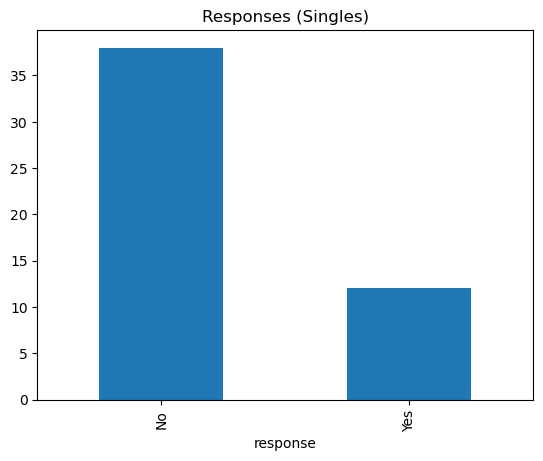

In [11]:
df_singles = extract_and_analyze_results(usa_singles, "Singles")
#control.checkpoint()


In [12]:
# wait 5 minutes
import time
time.sleep(300)

################# Analyzing results for Families... #################
2025-10-03 11:03:05,567 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 11:03:11,829 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "No", "justification": "He explicitly answered \'No\' because he is a working contractor with two young children and a tight budget; he prefers short, family-friendly trips (cabins, lakes) and finds an adults-only, pricey beachfront spa impractical due to childcare, travel time, and cost. He might consider if affordable family options close by or that fit the kids\' schedules were offered."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-03 11:03:11,843 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 11:03:16,920 - httpx - INF

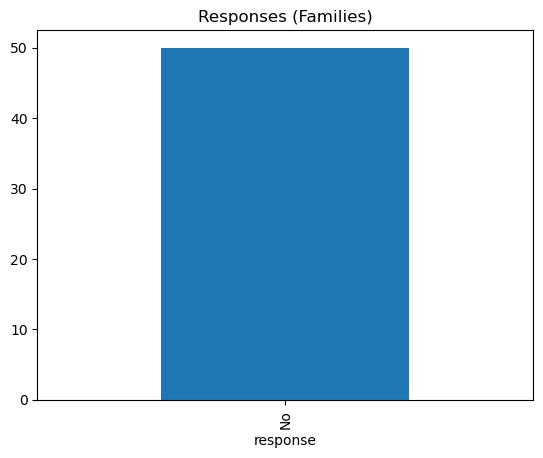

In [13]:
df_families = extract_and_analyze_results(usa_families, "Families")
#control.checkpoint()

In [14]:
# wait 5 minutes
import time
time.sleep(300)

################# Analyzing results for Couples... #################
2025-10-03 11:12:27,266 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 11:12:33,609 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api-version=2024-12-01-preview "HTTP/1.1 200 OK"
Extraction raw result message: {'content': '{"response": "No", "justification": "Lucas explicitly says \'No\' because he is 13, the service is adult/romantic and often does not accept children, his parents would decide/pay, and the offering is expensive and not a good fit for his vacation preferences (family/educational trips)."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
2025-10-03 11:12:33,629 - tinytroupe - INFO - Using Azure OpenAI Service API with key...
2025-10-03 11:12:39,003 - httpx - INFO - HTTP Request: POST https://azureai-prototyping-ai.openai.azure.com/openai/deployments/gpt-5-mini/chat/completions?api

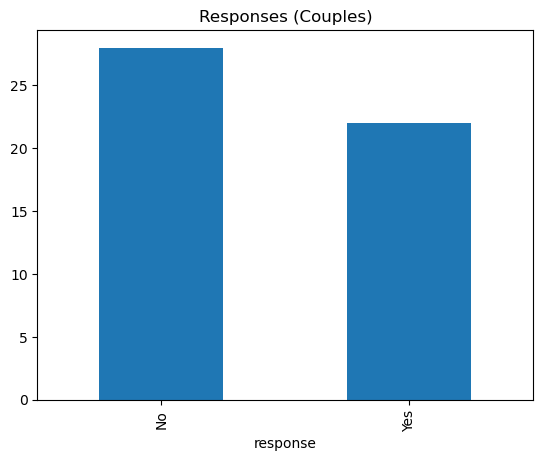

In [15]:
df_couples = extract_and_analyze_results(usa_couples, "Couples")
#control.checkpoint()

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import numpy as np

def plot_combined_responses(title, name_to_df, individual_responses=None):
    """
    Combine the given dataframes in a single chart with grouped bars.
    Each dataframe is a different color and is properly labeled.
    
    Parameters:
    -----------
    title : str
        Title for the plot
    name_to_df : dict
        Dictionary mapping names to dataframes
    individual_responses : list, optional
        List of responses to count individually. If None, only 'Yes' and 'No' are counted individually.
        All other responses will be grouped as "Others".
    """
    print(f"################# Plotting combined responses for {title}... #################")
    
    # If individual_responses is not provided, default to Yes and No
    if individual_responses is None:
        individual_responses = ["Yes", "No"]
    
    # Get unique categories (individual responses + "Others")
    categories = individual_responses.copy()
    
    # Prepare data for grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Define a colormap
    cmap = matplotlib.colormaps['tab10']
    
    # Calculate bar width based on number of groups
    num_groups = len(name_to_df)
    bar_width = 0.8 / num_groups  # Adjust the 0.8 to control spacing
    
    # Check if we need to add "Others" category
    has_others = False
    for df in name_to_df.values():
        if any(resp not in [r.lower() for r in individual_responses] for resp in [r.lower() for r in df["response"].unique()]):
            has_others = True
            break
    
    if has_others and "Others" not in categories:
        categories.append("Others")
    
    # For each category, plot grouped bars for each dataframe
    for i, category in enumerate(categories):
        for j, (name, df) in enumerate(name_to_df.items()):
            # Calculate the position for this bar
            position = i + (j - num_groups/2 + 0.5) * bar_width
            
            # Count occurrences for this category
            if category == "Others":
                # Count all responses that are not in individual_responses (case-insensitive)
                count = sum(df["response"].value_counts().get(resp, 0) 
                           for resp in df["response"].unique() 
                           if not any(resp.lower() == ind.lower() for ind in individual_responses))
            else:
                # Count occurrences of this category (case-insensitive)
                count = sum(df["response"].value_counts().get(resp, 0) 
                           for resp in df["response"].unique() 
                           if resp.lower() == category.lower())
            
            # Plot the bar
            ax.bar(position, count, width=bar_width, alpha=1.0, 
                   label=name if i == 0 else "", color=cmap(j % 10))
    
    # Set the x-ticks in the middle of each group
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(categories, fontsize=12)
    
    # Increase font sizes for better readability
    plt.title(f"Combined Responses ({title})", fontsize=16)
    plt.xlabel("Response", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(fontsize=12)
    
    # Also increase tick label sizes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.show()

################# Plotting combined responses for travel preferences by group... #################


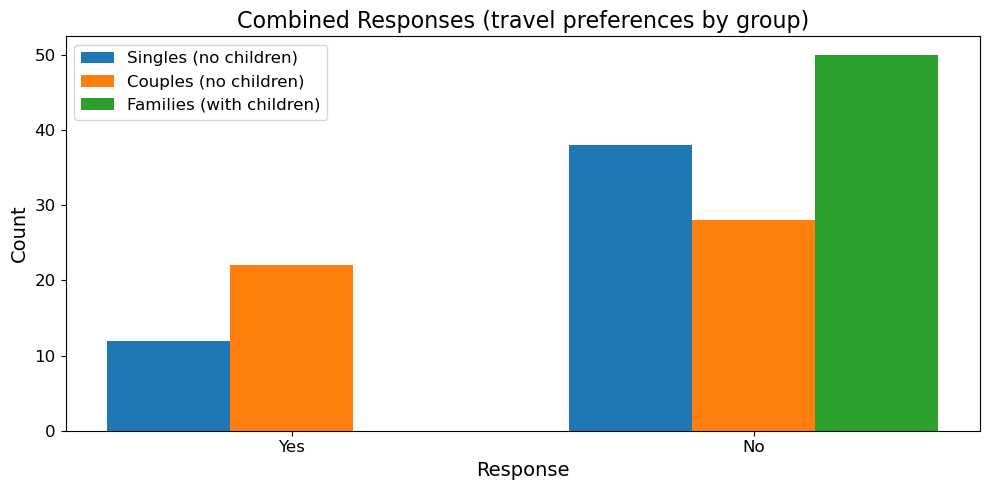

In [17]:
plot_combined_responses("travel preferences by group", 
                        {"Singles (no children)": df_singles, 
                         "Couples (no children)": df_couples,
                         "Families (with children)": df_families})

In [18]:
# statistics about the DF
df_singles.value_counts("response")

response
No     38
Yes    12
Name: count, dtype: int64

In [19]:
df_couples.value_counts("response")

response
No     28
Yes    22
Name: count, dtype: int64

In [20]:
df_families.value_counts("response")

response
No    50
Name: count, dtype: int64

In [21]:
#control.end()

## Compare with Empirical Data (if any)